
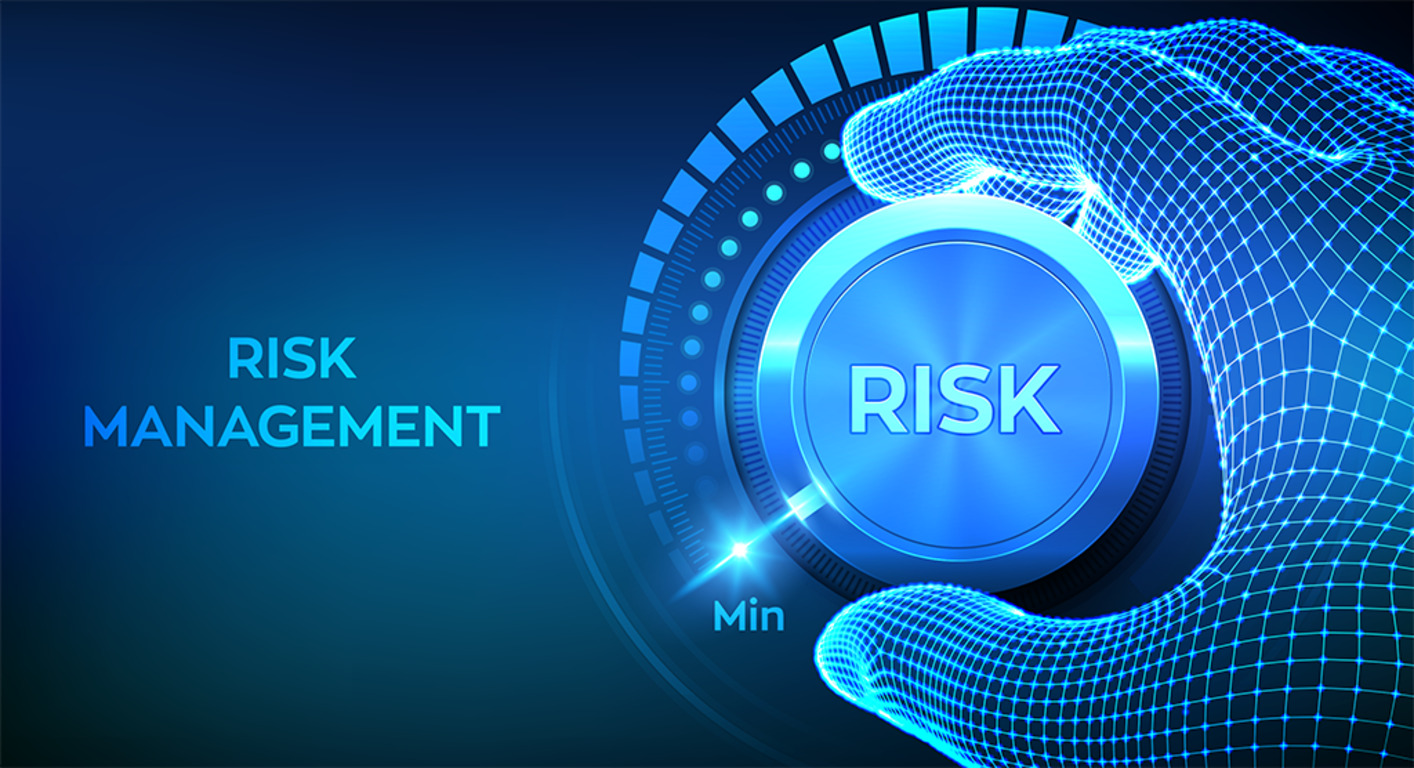

> Машинное обучение играет ключевую роль в современном кредитном риск-менеджменте. Оно помогает финансовым учреждениям оценить кредитоспособность заемщиков, прогнозировать вероятность невозврата кредитов, выявлять мошенническую деятельность и оптимизировать процессы кредитного управления. Алгоритмы машинного обучения позволяют анализировать большие объемы данных, выявлять скрытые закономерности и принимать более точные решения на основе статистических и модельных подходов. Таким образом, машинное обучение способствует повышению эффективности и надежности кредитного риск-менеджмента, что является важным фактором для финансовой устойчивости и успешной деятельности финансовых организаций.


# Модель кредитного риск-менеджмента
### *Итоговый проект по курсу Machine Learning Junior от Skillbox*


<br> <!-- -->
<br> <!-- -->
<br> <!-- -->
## Оглавление
1. [Фреймворк для науки о данных](#ch001)
1. [Вводные по задаче](#ch002)
1. [Получение и подготовка данных](#ch003)
1. [Решение проблемы нехватки ОЗУ при работе с большими файлами](#ch004)
1. [Проверка загруженности ОЗУ и освобождение ресурсов](#ch005)
1. [Разведочное обучение моделей с целью определения их перспективности](#ch006)
1. [Описание данных](#ch007)
1. [The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#ch008)
1. [Группировка датафрейма по id и моделирование](#ch009)
1. [Feature-инжениринг](#ch0010)
1. [Сборка окончательного датасета и обучение модели - XGBClassifier](#ch0011)
1. [Комбинирование признаков для улучшения метрик](#ch0012)
1. [Проверка модели на переобучение](#ch0013)
1. [Выводы по результатам кросс-валидации и результатам логлосса на обучающей и валидационной выборках](#ch0014)
   

<a id="ch001"></a>
## 1. Фреймворк для науки о данных

1. Определение проблемы: Если наука о данных, большие данные, машинное обучение, прогностическая аналитика, бизнес-интеллект или любая другая модная терминология является решением, то в чем же проблема? Как гласит поговорка, не ставьте телегу перед лошадью. Проблемы перед требованиями, требования перед решениями, решения перед дизайном, а дизайн перед технологией. Слишком часто мы быстро затеваем новые блестящие технологии, инструменты или алгоритмы, прежде чем определить фактическую проблему, которую мы пытаемся решить.

2. Сбор данных: Джон Найсбитт написал в своей книге "Мегатренды" 1984 года (да, 1984), что мы "утопаем в данных, но страдаем от недостатка знаний". Так что, скорее всего, набор(ы) данных уже существуют где-то, в каком-то формате. Он может быть внешним или внутренним, структурированным или неструктурированным, статическим или потоковым, объективным или субъективным и т. д. Как гласит поговорка, не надо изобретать велосипед, нужно просто знать, где его найти. На следующем этапе мы займемся преобразованием "грязных данных" в "чистые данные".

3. Подготовка данных к использованию: Этот шаг часто называют обработкой данных, необходимый процесс превращения "диких" данных в "управляемые" данные. Обработка данных включает разработку архитектуры данных для хранения и обработки, разработку стандартов управления данными для качества и контроля, извлечение данных (т. е. ETL и парсинг веб-страниц), а также очистку данных для выявления аномальных, отсутствующих или выбросов данных.

4. Проведение исследовательского анализа: Любой, кто когда-либо работал с данными, знает, что мусор на входе - мусор на выходе. Поэтому важно использовать описательную и графическую статистику для поиска потенциальных проблем, закономерностей, классификаций, корреляций и сравнений в наборе данных. Кроме того, категоризация данных (т. е. качественные против количественных) также важна для понимания и выбора правильного теста гипотезы или модели данных.

5. Моделирование данных: Как описательная, так и инферентная статистика, моделирование данных может либо суммировать данные, либо предсказывать будущие результаты. Наш набор данных и ожидаемые результаты определят доступные алгоритмы для использования. Важно помнить, что алгоритмы - это инструменты, а не волшебные палочки или серебряные пули. Нам все равно нужно быть мастером, который знает, как выбрать правильный инструмент для работы. Аналогией может быть просьба кому-то передать вам отвертку "крестообразную", а они передают вам отвертку "плоскогубцы" или, что хуже всего, молоток. В лучшем случае это показывает полное непонимание. В худшем случае это делает завершение проекта невозможным. То же самое относится к моделированию данных. Неправильная модель может привести к плохим результатам в лучшем случае и к неверным выводам (которые используются как действенный интеллект) в худшем случае.

6. Проверка и внедрение модели данных: После того как мы обучим свою модель на основе подмножества ваших данных, наступит время протестировать нашу модель. Это поможет убедиться, что мы не переобучили модель или не сделали ее слишком специфичной для выбранного подмножества, так что она не точно подходит для другого подмножества из того же набора данных. На этом этапе мы определяем, переобучилась ли наша модель, обобщается ли она или недообучается к нашему набору данных.

7. Оптимизация и стратегия: Это шаг "бионического человека", где мы прйдем через процесс снова, чтобы сделать его лучше...сильнее...быстрее, чем был раньше. Как специалист по данным, наша стратегия должна заключаться в том, чтобы передать операции разработчикам и "водопроводчикам" приложений, чтобы у нас было больше времени для концентрации на рекомендациях и дизайне. Как только мы сможем упаковать свои идеи, это становится нашим "курсом обмена валюты".

<a id="ch002"></a>
## 2. Вводные по задаче

Банки используют модели кредитного риск-менеджмента, чтобы понимать,
насколько можно доверять клиенту в выполнении обязательств по договорам
кредитования. Когда вы как клиент заполняете заявку на кредит или ипотеку,
вас оценивают по модели кредитного риск-менеджмента. Банк может
использовать разные сведения: например, о месте работы, возрасте, истории
предыдущих погашений по другим кредитам в банках и кредитных
организациях. На основе этой информации модель машинного обучения
подсказывает кредитному менеджеру, стоит ли вам доверять запрашиваемую
сумму денег.
С помощью такой автоматизации банк экономит время своих специалистов,
чтобы они не искали и не агрегировали информацию по каждому клиенту для
принятия решения о выдаче кредита. Это ускоряет время подтверждения
заявки на кредит. Однако в отдельных случаях специалисты могут экспертно
проверить решение модели, чтобы проаудировать её и выявить возможные
слабые места.
Данный пример рассматривает только одну модель, которая учитывается
в кредитном риск-менеджменте. Помимо неё используют и модели
предсказания суммы кредита/займа, которую сможет оплатить клиент,
и определения текущего рейтинга платёжеспособности клиента, у которого
уже есть кредит. Модели нужны, чтобы спрогнозировать, какие клиенты могут
выйти в просрочку, и предпринять какие-либо препятствующие выдаче
кредита действия.

### Проблема, которую предстоит решить
В рамках итогового проекта необходимо оценить 
риск неуплаты клиента по кредиту (дефолт).
Дефолт — неуплата процентов по кредиту или облигациям, непогашение
займа в течение определённого времени t. Обычно дефолт считают
свершившимся, если клиент не совершил выплату по кредиту в течение
90 дней.

Нужная модель позволяет банку или другой кредитной организации оценить
текущий риск по любым выданным займам и кредитным продуктам
и с большей долей вероятности предотвратить неисполнение кредитных
обязательств клиентом. Таким образом, банк меньше рискует понести
убытки.

### Краткое описание задачи
Необходимо создать одну из моделей для оценки кредитного риска —
предсказание выхода клиента в дефолт по кредиту.

<a id="ch003"></a>
## 3. Получение и подготовка данных

Данные для исследования и подготовки модели кредитного можно скачать по этой [ссылке](https://drive.google.com/drive/folders/1uD_vu6TyHriEJsVbHgzjlGUl3JTxznxO?usp=sharing). В настоящем проекте будет много информации для анализа так как в настоящих задачах больших компаний приходится иметь дело с большими объёмами данных. Поскольку данных в датасете много (должно получиться порядка 4,5 Гб данных в файлах Parquet, объём которых после распаковки станет в разы больше), предлагается читать его итеративно (то есть по несколько файлов за раз — извлекать нужные фичи и записывать только эти фичи в результирующий датафрейм). 
   
   Необработанные данные представляют себе более 26 млн строк и 62 признака. Для упрощения работы предлагалось использовать скрипт для обработки данных порциями. Данные с целевой переменной можно скачать [отсюда](https://drive.google.com/file/d/1D1_h_NT5-vJToZQ0xBRigiw7FJhAWhAT/view?usp=sharing). Для формирования рабочего датасета необходимо соединить данные из файла с целевой с данными с признаками. 

   Загрузим для анализа один файл из parquet в датафрейм и проанализируем его. 

   Для удобства и структуризации проекта в начале разместим ячейки с импортированными для работы библиотеками и фреймворками. 

   Затем ячейку со всеми функциями, которые будут использованы в дальнейшем.

   




In [1]:
# Импорт необходимых библиотек

#load packages
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time



print('-'*25)



Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.2.2
matplotlib version: 3.8.0
NumPy version: 1.26.4
SciPy version: 1.10.1
IPython version: 8.20.0
scikit-learn version: 1.2.2
-------------------------


In [2]:
import psutil
import time
import inspect
import pyarrow.parquet as pq
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from imblearn.under_sampling import RandomUnderSampler
plt.style.use('fivethirtyeight')

In [3]:
# Загрузка библиотек моделирования данных

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
# Функция вывод использования памяти 
def get_memory_usage(dataframe):
    # Получаем имя переменной, содержащей dataframe
    dataframe_name = [name for name, obj in inspect.currentframe().f_back.f_locals.items() if obj is dataframe][0]
    
    # Рассчитываем использование памяти
    memory_usage = dataframe.memory_usage(deep=True).sum() / (1024 * 1024)
    memory_usage_rounded = round(memory_usage, 2)
    
    # Возвращаем информацию о памяти
    return f"File '{dataframe_name}': memory_usage: {memory_usage_rounded} Mb"

# Функция вывод затраченного времени
def measure_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Время выполнения '{func.__name__}': {elapsed_time:.2f} секунд")
    return result

# Функция чтения файла из паркета
def read_file(file_path):
    df = pd.read_parquet(file_path)
    return df

# Функция добавления целевого значения 'flag'
def add_target_column(df, target_file_path):
    target_df = pd.read_csv(target_file_path)
    df = pd.merge(df, target_df[['id', 'flag']], on='id', how='left')
    return df

# Функция для вывода информации о памяти и процессоре
def print_system_info():
    memory = psutil.virtual_memory()
    cpu_load = psutil.cpu_percent(interval=1)
    print(f"Занято ОЗУ: {memory.used / (1024 ** 3):.2f} GB")
    print(f"Свободно ОЗУ: {memory.available / (1024 ** 3):.2f} GB")
    print(f"Нагрузка на процессор: {cpu_load:.2f}%")

# Функция графиков сравнения распределений признаков по flag
def plot_distribution(data, feature, flag_column='flag', bins=20, figsize=(10, 6)):
    # Создаем новый график с заданным размером
    plt.figure(figsize=figsize)
    
    # Фильтруем строки, где flag равен 1
    flag_1_data = data[data[flag_column] == 1]
    
    # Фильтруем строки, где flag равен 0
    flag_0_data = data[data[flag_column] == 0]
    
    # Построение гистограммы для столбца feature для flag=1 (синий цвет)
    plt.hist(flag_1_data[feature], bins=bins, color='blue', alpha=0.5, label='flag=1')
    
    # Построение гистограммы для столбца feature для flag=0 (красный цвет)
    plt.hist(flag_0_data[feature], bins=bins, color='red', alpha=0.5, label='flag=0')
    
    # Добавление легенды, заголовка и подписей осей
    plt.legend()
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    
    # Показать график
    plt.show()


# Функция агрегации по id и вычисления МЕДИАНЫ
def process_data(merged_data):
    # Разделение DataFrame на две части
    data_flag1 = merged_data[merged_data['flag'] == 1]
    data_flag0 = merged_data[merged_data['flag'] == 0]

    # Агрегация данных с flag=0
    # Предполагаем, что все остальные колонки кроме 'id' и 'flag' - числовые
    aggregated_data = data_flag0.groupby('id').median().reset_index()

    # Добавляем колонку flag, так как медиана удалит её
    aggregated_data['flag'] = 0

    # Объединение данных с flag=1 и агрегированных данных с flag=0
    final_data = pd.concat([data_flag1, aggregated_data], ignore_index=True)

    return final_data


# Функция оздание графиков распределения
def plot_categorical_distributions(data, categorical_features, flag_column='flag', cols=2):
    # Определяем количество графиков в строке
    num_rows = (len(categorical_features) + cols - 1) // cols
    
    # Создаем фигуру и оси
    fig, axes = plt.subplots(num_rows, cols, figsize=(cols * 8, num_rows * 6), constrained_layout=True)
    
    # Преобразуем оси в массив, если это необходимо
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    
    # Обходим все признаки и создаем графики
    for i, feature in enumerate(categorical_features):
        ax = axes[i // cols, i % cols]

        # Фильтруем данные по флагу
        flag_0_data = data[data[flag_column] == 0][feature]
        flag_1_data = data[data[flag_column] == 1][feature]

        # Настройки гистограммы
        bins = np.linspace(min(data[feature]), max(data[feature]), 15)

        # Подготовка данных для гистограмм
        hist0, bins0 = np.histogram(flag_0_data, bins=bins)
        hist1, bins1 = np.histogram(flag_1_data, bins=bins)

        # Нормализация ширины бинов для отображения в bar plot
        width = np.diff(bins0).min()

        # Рисуем гистограммы
        rects1 = ax.bar(bins0[:-1], hist0, width=width, align='center', alpha=0.5, label='Flag 0', color='blue')
        rects2 = ax.bar(bins1[:-1] + width, hist1, width=width, align='center', alpha=0.5, label='Flag 1', color='red')

        # Добавляем названия и метки
        ax.set_title(f'Distribution of {feature} by Flag')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.legend()

        # Функция для добавления процентов на столбцы
        def autolabel(rects, total):
            for rect in rects:
                height = rect.get_height()
                if height > 0:  # Добавляем аннотацию только если высота столбца больше 0
                    ax.annotate(f'{height/total:.2%}',
                                xy=(rect.get_x() + rect.get_width() / 2, height),
                                xytext=(0, 3),  # смещение метки на 3 пункта вверх
                                textcoords="offset points",
                                ha='center', va='bottom')

        # Применяем функцию autolabel для добавления процентов
        autolabel(rects1, len(flag_0_data))
        autolabel(rects2, len(flag_1_data))

    # Убираем ненужные оси
    for i in range(len(categorical_features), len(axes.flat)):
        fig.delaxes(axes.flatten()[i])

    # Показываем графики
    plt.show()
# # Применение функции к вашему DataFrame merged_data_1
# final_data = process_data(merged_data_1)

# # Проверяем результат
# print(final_data.shape)


Скачаем один файл для изучения из паркета `train_data/train_data_1.pq` и соединим с целевой из файла `train_target.csv`

In [68]:
# Скачаем один файл
target_file_path = "train_target.csv"
file_path = 'train_data/train_data_1.pq'

# Используем measure_time для измерения времени чтения файла
merged_data_1 = measure_time(read_file, file_path)

# Используем measure_time для измерения времени добавления столбца с таргетом
merged_data_1 = measure_time(add_target_column, merged_data_1, target_file_path)

print("Обработка файла завершена.")

Время выполнения read_file: 0.65 секунд
Время выполнения add_target_column: 0.80 секунд
Обработка файла завершена.


<a id="ch004"></a>
## 4. Решение проблемы нехватки ОЗУ при работе с большими файлами

В процессе работы с большими файлами очень часто можно столкнуться с зависанием ядра Kernel, вызванного нехваткой ОЗУ. Для решения этой проблемы необходимо изменить тип данных в загруженных датафреймах.

In [69]:
get_memory_usage(merged_data_1)

"File 'merged_data_1': memory_usage: 996.8 Mb"

In [70]:
merged_data_1.shape

(2107305, 62)

In [71]:
merged_data_1.dtypes

id                       int64
rn                       int64
pre_since_opened         int64
pre_since_confirmed      int64
pre_pterm                int64
                         ...  
enc_loans_credit_type    int64
enc_loans_account_cur    int64
pclose_flag              int64
fclose_flag              int64
flag                     int64
Length: 62, dtype: object

Как видим, один загруженный и смерженный файл занимает 1Gb памяти. Это логично, так как имеем более 2 млн строк. Да и к тому же, тип данных `int64` достаточно емкий.  Если загрузить все файлы, то будет занято много оперативной памяти, что скажется на времени вычислении (более того, ранние исследования показали, что при таких размерах файла происходит перегрузка ОЗУ). Исследования показали, что для данных, содержащихся в столбцах датафрейма вполне подойдет тип данных `int8` так как их значения варьируют в пределах [0, 58] (кроме значений столбца `id`). Поэтому я решил изменить тип данных на `int8`. Столбец `id` оставим в `int64`.

In [72]:
merged_data_int8 = merged_data_1.copy()

In [73]:
# Создаем список столбцов для преобразования, исключая 'id'
columns_to_convert = merged_data_int8.columns.drop('id')

# Преобразуем выбранные столбцы в тип данных int8
merged_data_int8[columns_to_convert] = merged_data_int8[columns_to_convert].astype('int8')


In [74]:
merged_data_int8.dtypes

id                       int64
rn                        int8
pre_since_opened          int8
pre_since_confirmed       int8
pre_pterm                 int8
                         ...  
enc_loans_credit_type     int8
enc_loans_account_cur     int8
pclose_flag               int8
fclose_flag               int8
flag                      int8
Length: 62, dtype: object

In [12]:
get_memory_usage(merged_data_int8)

"File 'merged_data_int8': memory_usage: 138.67 Mb"

In [13]:
round(1012.88/154.75, 2)

6.55

Видим заметную экономию ОЗУ. Теперь датафрейм с теми же данными занимает почти в 7 раз меньше памяти.

<a id="ch005"></a>
## 5. Проверка загруженности ОЗУ и освобождение ресурсов


In [14]:
import psutil

# Получить информацию о всех процессах
processes = []
for proc in psutil.process_iter(['pid', 'name', 'memory_info']):
    try:
        # Получить информацию о памяти для каждого процесса
        mem_info = proc.info['memory_info']
        processes.append((proc.info['name'], proc.info['pid'], mem_info.rss))
    except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
        pass

# Сортировать процессы по убыванию использования памяти
processes.sort(key=lambda x: x[2], reverse=True)

# Выводить информацию о процессах
for name, pid, rss in processes:
    print(f"Процесс: {name}, PID: {pid}, RSS: {rss / (1024 ** 2):.2f} MB")


Процесс: python.exe, PID: 3396, RSS: 2579.14 MB
Процесс: msedge.exe, PID: 12372, RSS: 948.89 MB
Процесс: MemCompression, PID: 2140, RSS: 467.43 MB
Процесс: chrome.exe, PID: 11360, RSS: 341.68 MB
Процесс: chrome.exe, PID: 8288, RSS: 310.41 MB
Процесс: chrome.exe, PID: 10312, RSS: 309.49 MB
Процесс: chrome.exe, PID: 12892, RSS: 224.40 MB
Процесс: chrome.exe, PID: 14028, RSS: 206.36 MB
Процесс: chrome.exe, PID: 1428, RSS: 196.93 MB
Процесс: chrome.exe, PID: 10508, RSS: 172.79 MB
Процесс: chrome.exe, PID: 9044, RSS: 170.24 MB
Процесс: MsMpEng.exe, PID: 3728, RSS: 166.11 MB
Процесс: python.exe, PID: 6624, RSS: 154.97 MB
Процесс: msedge.exe, PID: 12136, RSS: 153.65 MB
Процесс: chrome.exe, PID: 16032, RSS: 152.28 MB
Процесс: msedge.exe, PID: 4856, RSS: 145.28 MB
Процесс: explorer.exe, PID: 7952, RSS: 136.11 MB
Процесс: python.exe, PID: 14916, RSS: 132.28 MB
Процесс: chrome.exe, PID: 10928, RSS: 128.33 MB
Процесс: EXCEL.EXE, PID: 7936, RSS: 126.12 MB
Процесс: chrome.exe, PID: 14744, RSS: 123.2

In [13]:
import pandas as pd
import sys

# Получение всех датафреймов в текущем пространстве имен
dataframes = [obj for obj in globals().values() if isinstance(obj, pd.DataFrame)]

total_memory_usage = 0
for df in dataframes:
    memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Преобразование в мегабайты
    total_memory_usage += memory_usage

print("Общее использование памяти всех датафреймов: {:.2f} MB".format(total_memory_usage))


Общее использование памяти всех датафреймов: 19773.48 MB


In [14]:
# Получение всех датафреймов в текущем пространстве имен
dataframes = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame)}

for name, df in dataframes.items():
    memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Преобразование в мегабайты
    print("Датафрейм '{}' использует {:.2f} MB памяти".format(name, memory_usage))

Датафрейм 'df_mean' использует 524.52 MB памяти
Датафрейм 'merged_data_all' использует 6454.47 MB памяти
Датафрейм 'df' использует 6385.80 MB памяти
Датафрейм 'X' использует 6385.80 MB памяти


In [17]:
# Освобождение памяти, занятой переменными, кроме 'merged_data_int8'
del merged_data_1, df, 


In [18]:
# Получение всех датафреймов в текущем пространстве имен
dataframes = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame)}

for name, df in dataframes.items():
    memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Преобразование в мегабайты
    print("Датафрейм '{}' использует {:.2f} MB памяти".format(name, memory_usage))

Датафрейм 'merged_data_int8' использует 138.67 MB памяти


In [19]:
import pandas as pd
import sys

# Получение всех датафреймов в текущем пространстве имен
dataframes = [obj for obj in globals().values() if isinstance(obj, pd.DataFrame)]

total_memory_usage = 0
for df in dataframes:
    memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Преобразование в мегабайты
    total_memory_usage += memory_usage

print("Общее использование памяти всех датафреймов: {:.2f} MB".format(total_memory_usage))


Общее использование памяти всех датафреймов: 277.34 MB


<a id="ch006"></a>
## 6. Разведочное обучение моделей с целью определения их перспективности.

Обучим модель LogisticRegression и xgb_model. LogisticRegression быстрая в обучении,  xgb_model - не требует приведения в единый масштаб. Сгрупппируем данные по каждому id, вычислив среднее значение по каждому признаку.

In [20]:
# Среднее
df_mean = merged_data_int8.groupby('id').mean().reset_index()

In [21]:
df_mean.shape

(250000, 62)

In [22]:
df_mean.flag.value_counts()

flag
0.0    241788
1.0      8212
Name: count, dtype: int64

In [23]:
# 1. Удаление столбцов 'id' и 'rn'
df = merged_data_int8.drop(['id', 'rn'], axis=1)

# 2. Разделение данных на признаки и целевую переменную
X = df.drop('flag', axis=1)
y = df['flag']

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.98      0.62      0.76    408915
           1       0.04      0.57      0.08     12546

    accuracy                           0.62    421461
   macro avg       0.51      0.59      0.42    421461
weighted avg       0.95      0.62      0.74    421461

Confusion Matrix:
 [[253275 155640]
 [  5455   7091]]
ROC AUC: 0.6276865525509656


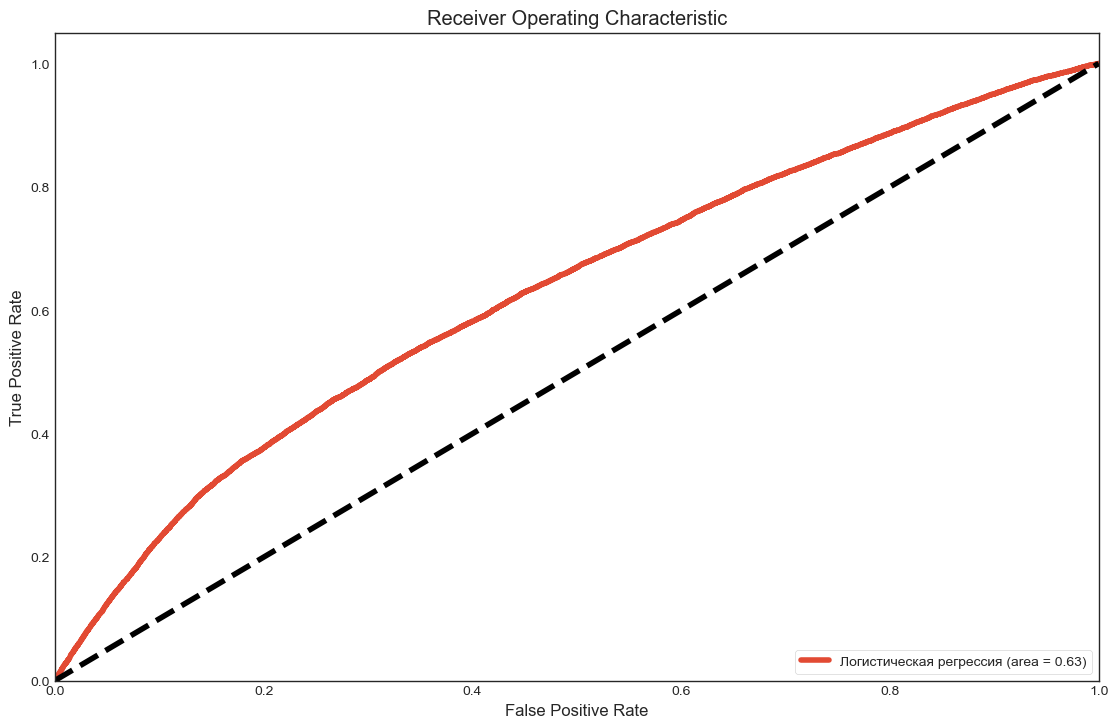

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели логистической регрессии
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# 5. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 6. Расчёт метрик качества
print("Классификационный отчет:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Логистическая регрессия (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Классификационный отчет для XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97    408915
           1       0.11      0.15      0.13     12546

    accuracy                           0.94    421461
   macro avg       0.54      0.56      0.55    421461
weighted avg       0.95      0.94      0.94    421461

Confusion Matrix для XGBoost:
 [[393356  15559]
 [ 10642   1904]]
ROC AUC для XGBoost: 0.6641219570262495


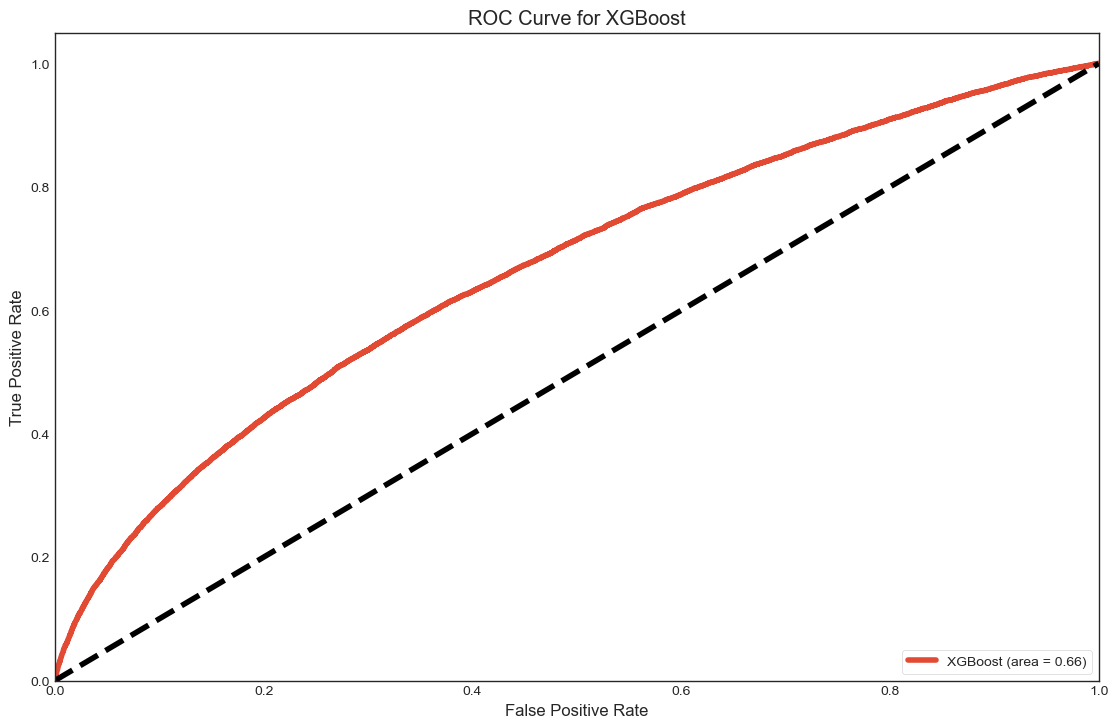

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


positive_class_weight = 12

# Создание экземпляра модели XGBClassifier с установленным весом положительного класса
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=positive_class_weight)

# Обучение модели
xgb_model.fit(X_train, y_train)


# Предсказания на тестовом наборе
y_pred_xgb = xgb_model.predict(X_test)

# Вероятности для расчета ROC AUC
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Классификационный отчет
print("Классификационный отчет для XGBoost:\n", classification_report(y_test, y_pred_xgb))

# Матрица ошибок
print("Confusion Matrix для XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print("ROC AUC для XGBoost:", roc_auc_xgb)

# Построение ROC-кривой
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # диагональная линия для сравнения
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

Как видим, уже без дополнительного feature-инжениринга модели выдают ROC более 60%, что говорит о переспективности дальнейшей работы с ними.

<a id="ch007"></a>
## 7. Описание данных

Данные содержат информацию о различных атрибутах заёмщиков 
и кредитных продуктов: о клиентах, которые уже имеют кредиты, их
кредитной истории и финансовых показателях. Каждая запись в датасете
представляет один конкретный кредитный продукт, выданный конкретному
заёмщику.

### Атрибуты данных
* id — идентификатор заявки. Заявки пронумерованы так, что большему
номеру соответствует более поздняя дата заявки.
* rn — порядковый номер кредитного продукта в кредитной истории.
Большему номеру соответствует продукт с более поздней датой открытия.
* pre_since_opened — количество дней с даты открытия кредита до даты
сбора данных (бинаризовано*).
* pre_since_confirmed — количество дней с даты подтверждения
информации по кредиту до даты сбора данных (бинаризовано*).
* pre_pterm — плановое количество дней с даты открытия кредита до даты
закрытия (бинаризовано*).
* pre_fterm — фактическое количество дней с даты открытия кредита до
даты закрытия (бинаризовано*).
* pre_till_pclose	— плановое количество дней с даты сбора данных до даты
"акрытия кредита (бинаризовано*).
* pre_till_fclose	— фактическое количество дней с даты сбора данных до
даты "акрытия кредита (бинаризовано*).
* pre_loans_credit_limit	 — кредитный лимит (бинаризовано*).
* pre_loans_next_pay_summ — сумма следующего платежа по кредиту
(бинаризовано*).
* pre_loans_outstanding — оставшаяся невыплаченная сумма кредита
(бинаризовано*).
* pre_loans_total_oÜerdue — текущая просроченная "адолженность
(бинаризовано*).
* pre_loans_max_oÜerdue_sum — максимальная просроченная
"адолженность (бинаризовано*).
* pre_loans_credit_cost_rate — полная стоимость кредита (бинаризовано*).
* pre_loans5 — число просрочек до 5 дней (бинаризовано*).
* pre_loans530 — число просрочек от 5 до 30 дней (бинаризовано*).
* pre_loans3060 — число просрочек от 30 до 60 дней (бинаризовано*).
* pre_loans6090 — число просрочек от 60 до 90 дней (бинаризовано*).
* pre_loans90 — число просрочек более чем на 90 дней (бинаризовано*).
* is_zero_loans_5 — флаг: нет просрочек до 5 дней.
* is_zero_loans_530 — флаг: нет просрочек от 5 до 30 дней.
* is_zero_loans_3060 — флаг: нет просрочек от 30 до 60 дней.
* is_zero_loans_6090 — флаг: нет просрочек от 60 до 90 дней.
* is_zero_loans90 — флаг: нет просрочек более чем на 90 дней.
* pre_util — отношение оставшейся невыплаченной суммы кредита
к кредитному лимиту (бинаризовано*).
* pre_over2limit	— отношение текущей просроченной "адолженности
к кредитному лимиту (бинаризовано*).
* pre_till_pclose	— плановое количество дней с даты сбора данных до даты
"акрытия кредита (бинаризовано*).
* pre_till_fclose	— фактическое количество дней с даты сбора данных до
даты "акрытия кредита (бинаризовано*).
* pre_loans_credit_limit	 — кредитный лимит (бинаризовано*).
* pre_loans_next_pay_summ — сумма следующего платежа по кредиту
(бинаризовано*).
* pre_loans_outstanding — оставшаяся невыплаченная сумма кредита
(бинаризовано*).
* pre_loans_total_oÜerdue — текущая просроченная "задолженность
(бинаризовано*).
* pre_loans_max_oÜerdue_sum — максимальная просроченная
"адолженность (бинаризовано*).
* pre_loans_credit_cost_rate — полная стоимость кредита (бинаризовано*).
* pre_loans5 — число просрочек до 5 дней (бинаризовано*).
* pre_loans530 — число просрочек от 5 до 30 дней (бинаризовано*).
* pre_loans3060 — число просрочек от 30 до 60 дней (бинаризовано*).
* pre_loans6090 — число просрочек от 60 до 90 дней (бинаризовано*).
* pre_loans90 — число просрочек более чем на 90 дней (бинаризовано*).
* is_zero_loans_5 — флаг: нет просрочек до 5 дней.
* is_zero_loans_530 — флаг: нет просрочек от 5 до 30 дней.
* is_zero_loans_3060 — флаг: нет просрочек от 30 до 60 дней.
* is_zero_loans_6090 — флаг: нет просрочек от 60 до 90 дней.
* is_zero_loans90 — флаг: нет просрочек более чем на 90 дней.
* pre_util — отношение оставшейся невыплаченной суммы кредита
к кредитному лимиту (бинаризовано*).
* pre_over2limit	— отношение текущей просроченной "адолженности
к кредитному лимиту (бинаризовано*).
* pre_maxover2limit — отношение максимальной просроченной
задолженности к кредитному лимиту (бинаризовано*).
* is_zero_util — флаг: отношение оставшейся невыплаченной суммы
кредита к кредитному лимиту равно 0.
* is_zero_over2limit — флаг: отношение текущей просроченной
задолженности к кредитному лимиту равно 0.
* is_zero_maxover2limit — флаг: отношение максимальной просроченной
задолженности к кредитному лимиту равно 0.
* enc_paym_{0..N} — статусы ежемесячных платежей за последние N
месяцев (закодировано**).
* enc_loans_account_holder_type — тип отношения к кредиту
(закодировано**).
* enc_loans_credit_status — статус кредита (закодировано**).
* enc_loans_account_cur — валюта кредита (закодировано**).
* enc_loans_credit_type — тип кредита (закодировано**).
* pclose_flag — флаг: плановое количество дней с даты открытия кредита
до даты закрытия не определено.
* fclose_flag — флаг: фактическое количество дней с даты открытия
кредита до даты закрытия не определено.

*- *Область значений поля разбивается на N непересекающихся промежутков.
Каждому промежутку случайным образом назначается уникальный номер 
от 0 до N-1E а значение поля заменяется номером промежуткаE которому оно
принадлежит*

<a id="ch008"></a>
## 8. The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
 Четыре "С" в Data Cleaning: исправление, завершение, создание и преобразование
 
 На этом этапе мы очистим наши данные, выполнив следующие действия: 
 
 1) коррекция аномальных значений и выбросов, 
 2) заполнение пропущенной информации, 
 3) создание новых признаков для анализа и 
 4) преобразование полей в правильный формат для расчетов и представления.

Коррекция: Просмотр данных не выявил ошибочных или неприемлемых вводов. Однако мы подождем завершения нашего исследовательского анализа, чтобы определить, следует ли включать или исключать эти выбросы из набора данных. 

Заполнение: В тех полях, где есть отсутствующие значения или нет данных. Пропущенные значения могут быть плохими, потому что некоторые алгоритмы не знают, как обрабатывать пустые значения и могут не работать. В то время как другие, такие как деревья решений, могут обрабатывать пустые значения. Поэтому важно исправить их до начала моделирования, потому что мы будем сравнивать несколько моделей. Существуют два общих метода: либо удалить запись, либо заполнить отсутствующее значение разумным вводом. Не рекомендуется удалять запись, особенно большой процент записей, если это не является действительно неполной записью. Вместо этого лучше заполнить пропущенные значения. Основная методология для качественных данных - это заполнение наиболее часто встречающимся значением (модой). Основная методология для количественных данных - это заполнение средним, медианой или средним + случайным стандартным отклонением. Промежуточная методология заключается в использовании базовой методологии на основе конкретных критериев; например, средний возраст по классу или место посадки по тарифам и социально-экономическому статусу. Существуют более сложные методологии, но их следует сравнивать с базовой моделью перед развертыванием, чтобы определить, добавляет ли сложность действительно ценность. Для этого набора данных возраст будет заполнен с использованием медианы, а атрибут "cockpit" будет удален, а посадка будет заполнена с использованием моды. Последующие итерации модели могут изменить это решение, чтобы определить, улучшает ли оно точность модели.

Создание. Разработка новых признаков - это когда мы используем существующие признаки для создания новых признаков, чтобы определить, предоставляют ли они новые сигналы для прогнозирования нашего результата. Для этого набора данных мы создадим функцию заголовка для определения, играл ли он роль в выживании.

Преобразование: Наконец, мы приступим к форматированию. Здесь нет дат или валютных форматов, но есть форматы типов данных. Наши категориальные данные импортированы как объекты, что затрудняет математические операции. Для этого набора данных мы преобразуем типы данных признаков в категориальные фиктивные переменные.

In [26]:
from IPython.display import display, HTML
import pandas as pd

# Создание HTML-таблицы для статистических характеристик
html_table = "<table>"
for column in merged_data_int8.columns:
    null_count = merged_data_int8[column].isnull().sum()
    if null_count > 0:
        html_table += f"<tr><td><b>{column}</b></td><td>{null_count}</td><td>пропущено</td></tr>"
    else:
        html_table += f"<tr><td><b>{column}</b></td><td>0</td><td>не имеет пропусков</td></tr>"
html_table += "</table>"

# Добавление статистических характеристик
html_table += merged_data_int8.describe(include='all').to_html()

# Отображение таблицы
display(HTML(html_table))


In [27]:
from IPython.display import display, HTML
import pandas as pd

# Создание DataFrame с типами данных
data_types_df = pd.DataFrame({'Столбец': merged_data_int8.columns, 'Тип данных': merged_data_int8.dtypes})

# Преобразование DataFrame в HTML
html_table = data_types_df.to_html(index=False)

# Отображение таблицы
display(HTML(html_table))


In [28]:
from IPython.display import display, HTML
import pandas as pd

# Создание HTML-таблицы для статистических характеристик
html_table = "<table style='width:100%'>"

# Разбивка столбцов по 4 в ряд
columns_per_row = 5
columns_count = len(merged_data_int8.columns)
for i in range(0, columns_count, columns_per_row):
    html_table += "<tr>"
    for column in merged_data_int8.columns[i:i+columns_per_row]:
        column_description = merged_data_int8[column].describe(include='all').to_frame().to_html()
        html_table += f"<td style='vertical-align: top; width: {100/columns_per_row}%;'>"
        html_table += f"{column_description}"
        html_table += "</td>"
    html_table += "</tr>"

html_table += "</table>"

# Отображение таблицы
display(HTML(html_table))



Выводы: Датафрейм не содержит пропусков, выбросов, аномалий. Имеются 2 вида признаков: бинаризованные (которые могут принимать 2 значения) и закодированные (которые можно считать как категориальные). Считаю, что бинаризованные признаки можно оcтавить в таком виде как они есть, а к закодированным - применить OneHotEncoding. Но для начала выведем графики распределения данных признаков. Вообще, более детальный анализ признаков был с целью определения зависимостей и аномалий был проведен в других блокнотах (colab). По итогам исследований принято решение оставить все признаки за исключением тех, которые сильно коррелируют.

Для удобства в дальнейшей работе создадим списки признаков (бинаризованные и закодированные).

In [29]:
# Бинаризированные признаки:
binary_columns = [col for col in merged_data_int8.columns if merged_data_int8[col].nunique() == 2]
# Удаляем столбец 'flag' из списка binary_columns
binary_columns.remove('flag')
binary_columns

['is_zero_loans5',
 'is_zero_loans530',
 'is_zero_loans3060',
 'is_zero_loans6090',
 'is_zero_loans90',
 'is_zero_util',
 'is_zero_over2limit',
 'is_zero_maxover2limit',
 'pclose_flag',
 'fclose_flag']

In [30]:
# Создаем список столбцов, которые нужно исключить
columns_to_exclude = ['flag', 'id', 'rn'] + binary_columns

# Получаем список столбцов, которые остаются после исключения
categorical_features = merged_data_int8.columns.difference(columns_to_exclude).tolist()
len(categorical_features)

49

In [31]:
categorical_features[5]

'enc_paym_1'

In [32]:
merged_data_int8.dtypes

id                       int64
rn                        int8
pre_since_opened          int8
pre_since_confirmed       int8
pre_pterm                 int8
                         ...  
enc_loans_credit_type     int8
enc_loans_account_cur     int8
pclose_flag               int8
fclose_flag               int8
flag                      int8
Length: 62, dtype: object

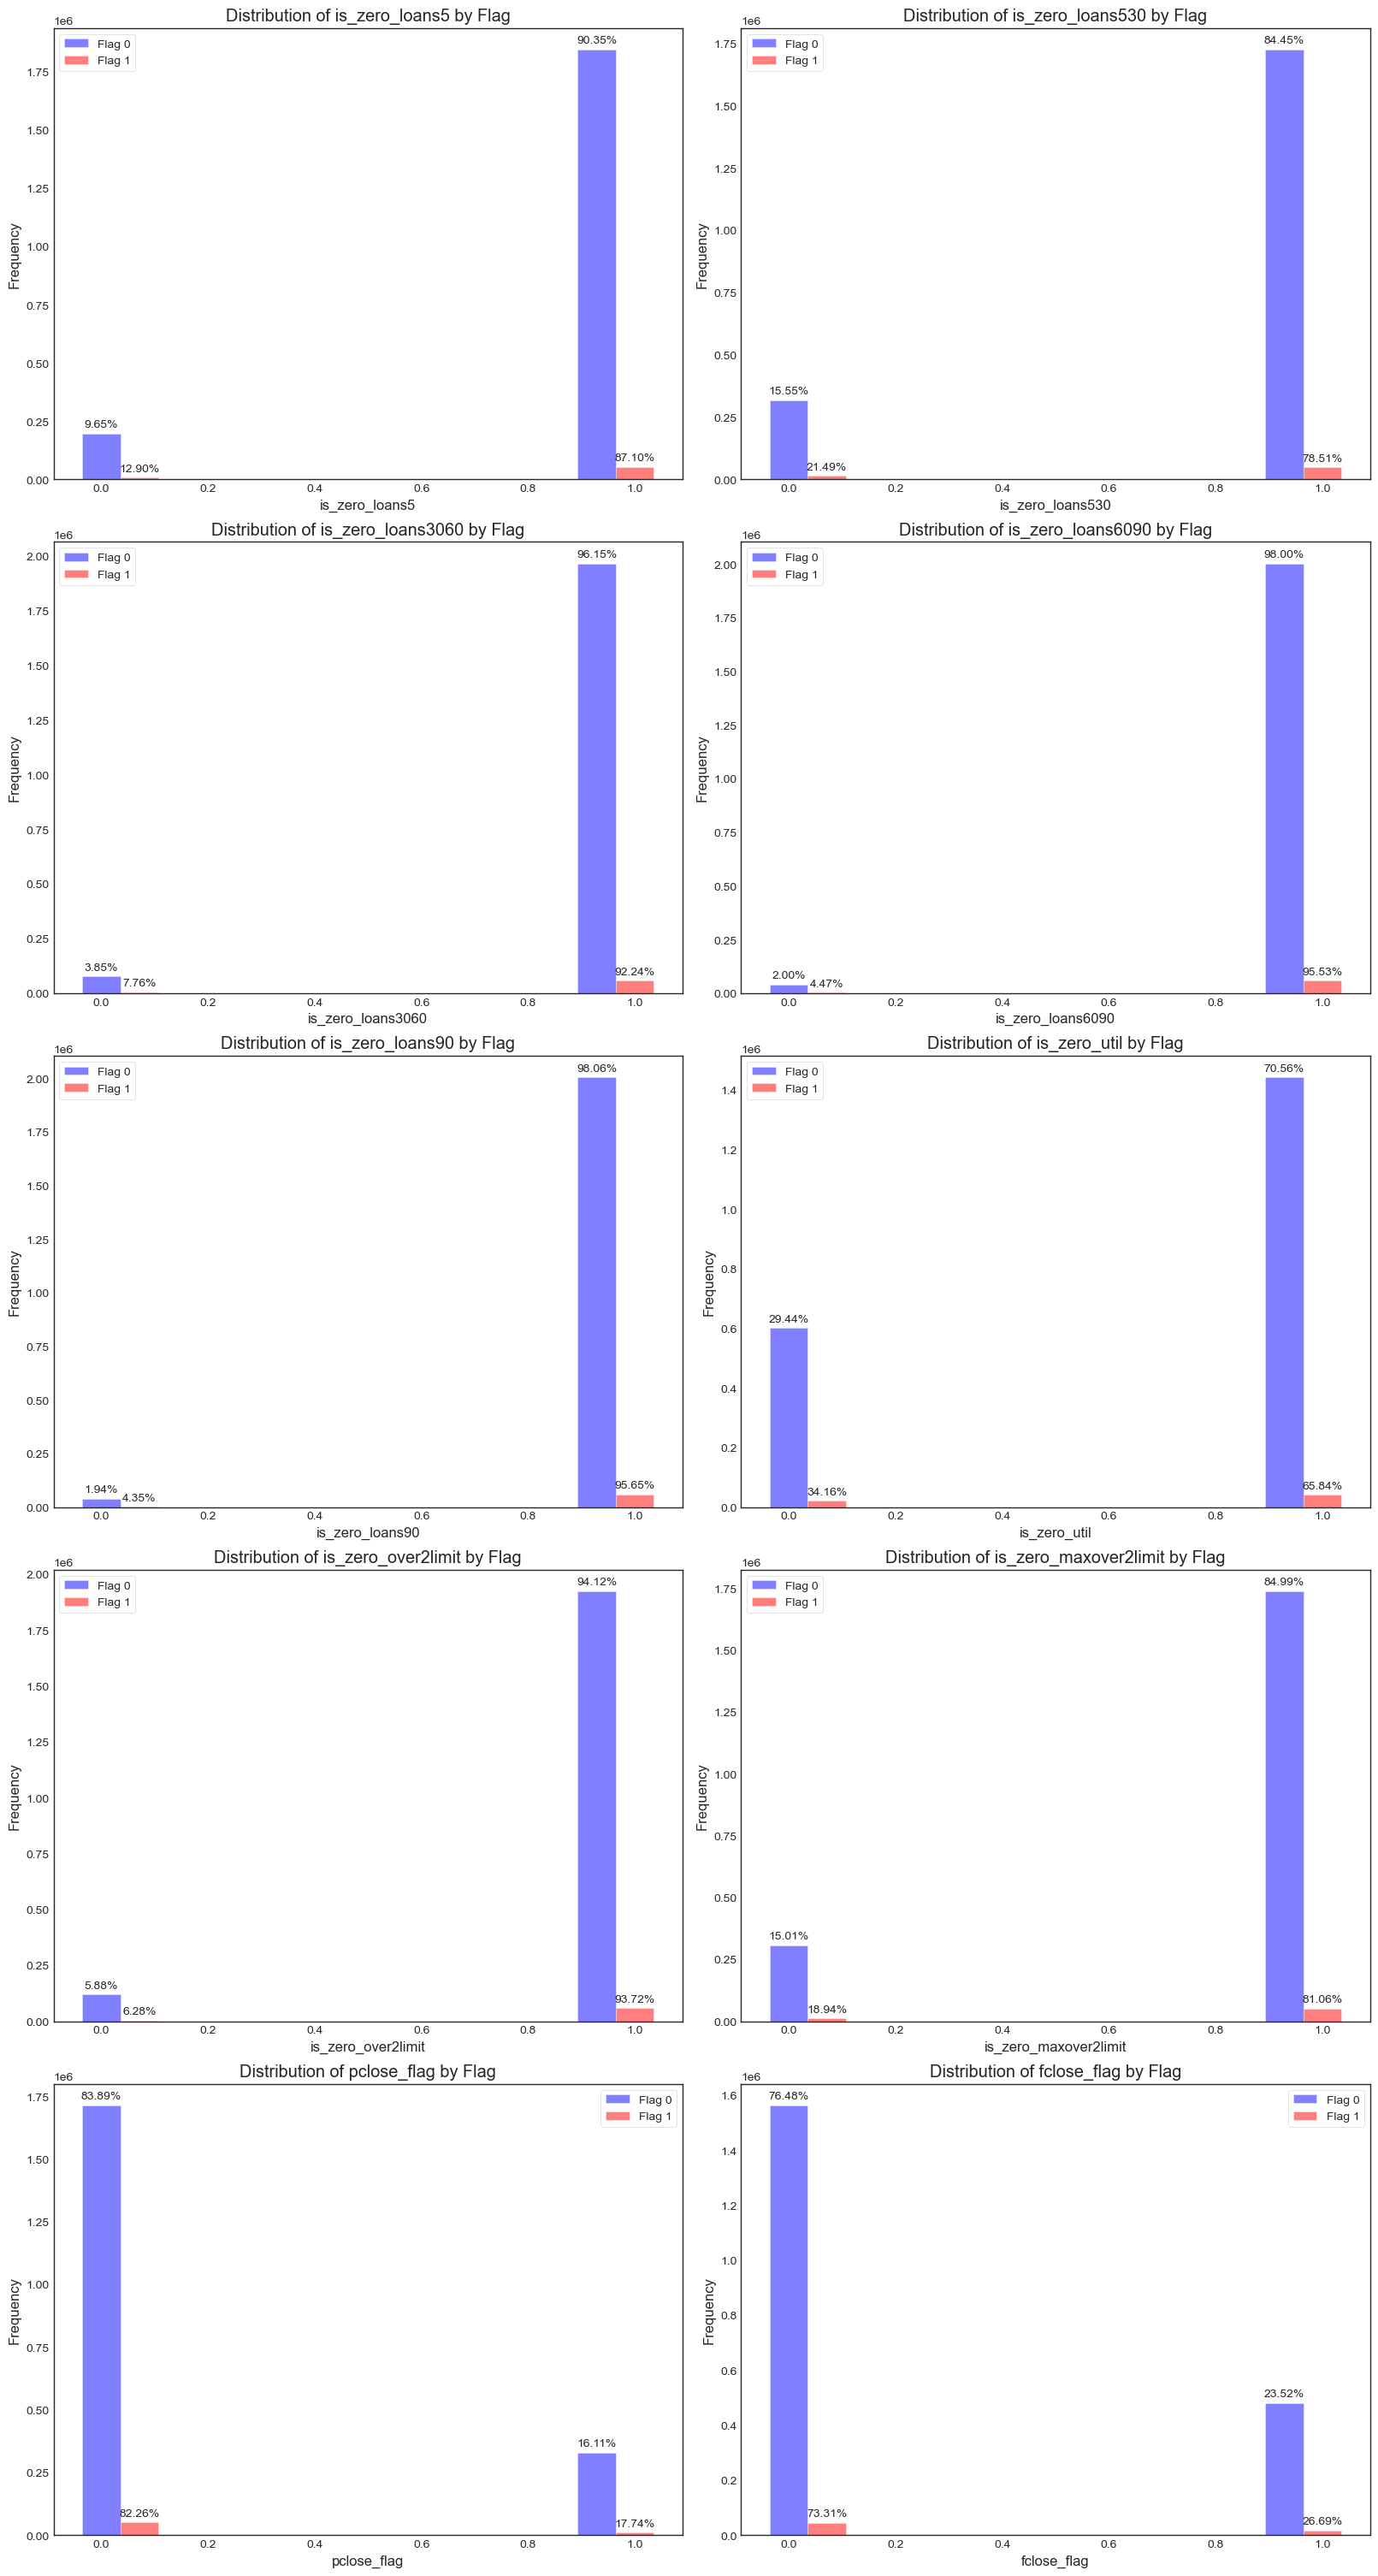

In [33]:
# Вызов функции для построения графиков
plot_categorical_distributions(merged_data_int8, binary_columns, flag_column='flag', cols=2)


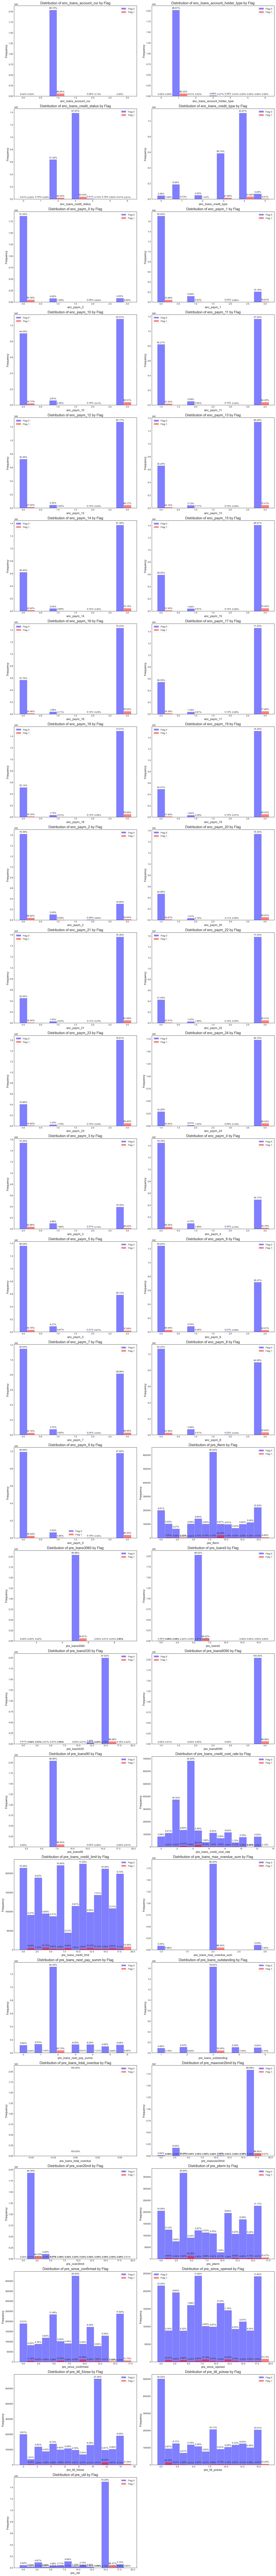

In [34]:
# Вызов функции для построения графиков
plot_categorical_distributions(merged_data_int8, categorical_features, flag_column='flag', cols=2)


Множество экспериментов было мною проведено в блокнотах colab с использованием Spark на всех данных, благодаря его высокой призводительности. Было проверенно огромное количество гипотез о взаимосвязях признаков с целевой. Но в итоге, пришлось согласиться, что явных взаимосвязей не обнаружено. Исследования показали, что пропущенных данных в датафрейме нет, выбросы, аномалии - отсутствуют. 

Проведем анализ корреляции.

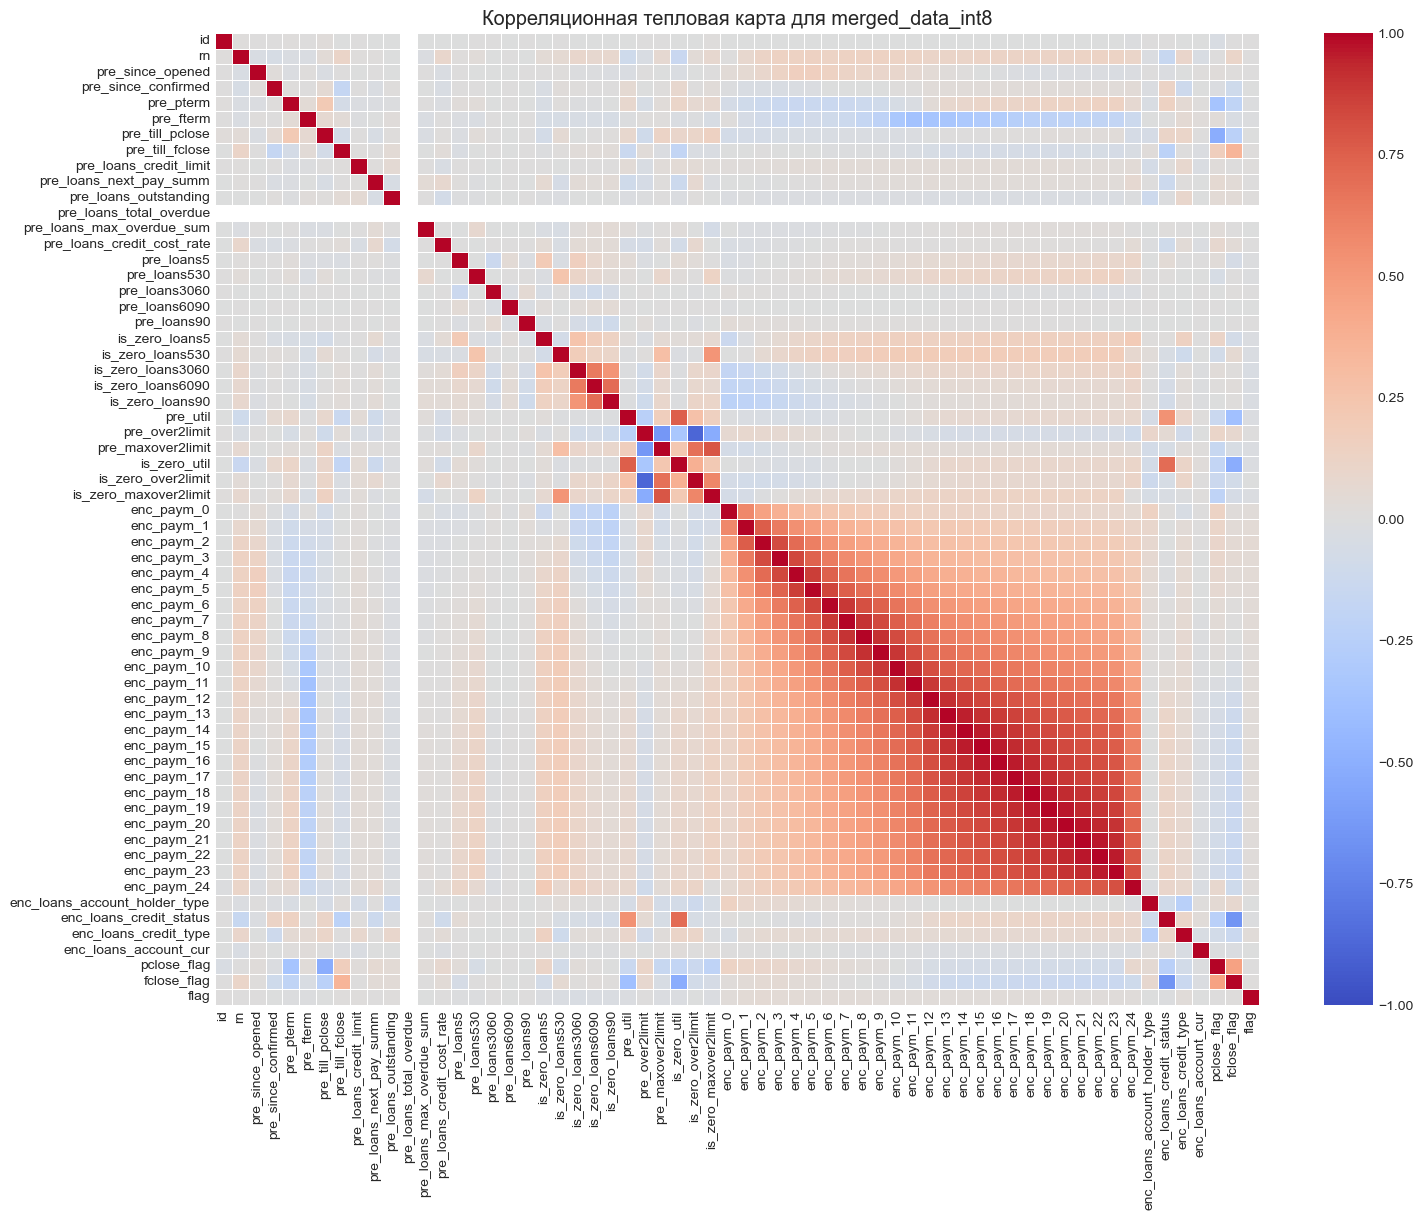

In [35]:
# Вычисление корреляционной матрицы
correlation_matrix = merged_data_int8.corr()

# Построение тепловой карты
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Корреляционная тепловая карта для merged_data_int8')
plt.show()

Обнаружили признак с пропусками `pre_loans_total_overdue`. Удалим его. Выведем признаки в порядке уменьшения их коррелляции.

In [36]:
# Преобразование корреляционной матрицы в длинный формат
corr_long = correlation_matrix.unstack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

# Исключение самокорреляций
corr_long = corr_long[corr_long['Feature1'] != corr_long['Feature2']]

# Удаление дубликатов
corr_long = corr_long.drop_duplicates(subset=['Correlation'])

# Округление корреляций до двух десятичных знаков
corr_long['Correlation'] = corr_long['Correlation'].round(2)

# Сортировка по абсолютному значению корреляции
sorted_corr = corr_long.reindex(corr_long['Correlation'].abs().sort_values(ascending=False).index)

# Печать корреляций в порядке убывания по модулю
print("Корреляции в порядке убывания по модулю:")
print(sorted_corr)

Корреляции в порядке убывания по модулю:
                    Feature1                 Feature2  Correlation
2899             enc_paym_16              enc_paym_17         0.96
2836             enc_paym_15              enc_paym_16         0.96
2773             enc_paym_14              enc_paym_15         0.96
3277             enc_paym_22              enc_paym_23         0.96
3088             enc_paym_19              enc_paym_20         0.96
...                      ...                      ...          ...
515   pre_loans_credit_limit           is_zero_loans5         0.00
514   pre_loans_credit_limit              pre_loans90         0.00
513   pre_loans_credit_limit            pre_loans6090         0.00
1166             pre_loans90              enc_paym_20         0.00
11                        id  pre_loans_total_overdue          NaN

[1831 rows x 3 columns]


Рассмотрим таблицу корелляции со значениями > 0.85

Корреляции больше 0.85 по модулю:
            Feature1            Feature2  Correlation
1578  pre_over2limit  is_zero_over2limit        -0.88
2143      enc_paym_4          enc_paym_5         0.87
2269      enc_paym_6          enc_paym_7         0.89
2332      enc_paym_7          enc_paym_8         0.90
2395      enc_paym_8          enc_paym_9         0.91
2458      enc_paym_9         enc_paym_10         0.89
2521     enc_paym_10         enc_paym_11         0.91
2584     enc_paym_11         enc_paym_12         0.89
2647     enc_paym_12         enc_paym_13         0.92
2648     enc_paym_12         enc_paym_14         0.88
2710     enc_paym_13         enc_paym_14         0.95
2711     enc_paym_13         enc_paym_15         0.91
2712     enc_paym_13         enc_paym_16         0.88
2773     enc_paym_14         enc_paym_15         0.96
2774     enc_paym_14         enc_paym_16         0.92
2775     enc_paym_14         enc_paym_17         0.89
2776     enc_paym_14         enc_paym_18        

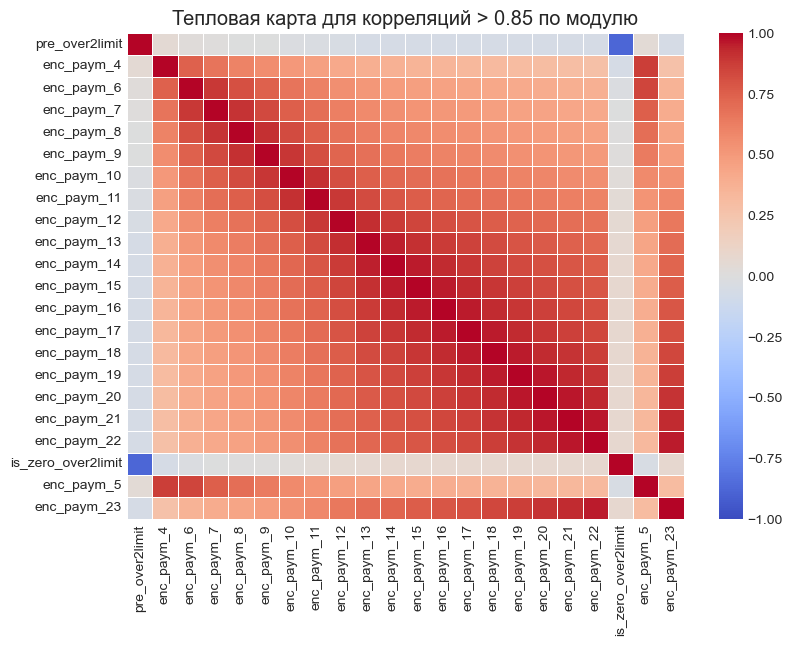

In [37]:
# Преобразование корреляционной матрицы в длинный формат
corr_long = correlation_matrix.unstack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

# Исключение самокорреляций
corr_long = corr_long[corr_long['Feature1'] != corr_long['Feature2']]

# Удаление дубликатов
corr_long = corr_long.drop_duplicates(subset=['Correlation'])

# Округление корреляций до двух десятичных знаков
corr_long['Correlation'] = corr_long['Correlation'].round(2)

# Фильтрация корреляций по условию |Correlation| > 0.85
high_corr = corr_long[corr_long['Correlation'].abs() > 0.85]

# Печать корреляций больше 0.85 по модулю
print("Корреляции больше 0.85 по модулю:")
print(high_corr)

# Извлечение уникальных признаков
high_corr_features = pd.unique(high_corr[['Feature1', 'Feature2']].values.ravel('K'))

# Создание новой корреляционной матрицы для этих признаков
high_corr_matrix = merged_data_int8[high_corr_features].corr()

# Построение тепловой карты для высоких корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Тепловая карта для корреляций > 0.85 по модулю')
plt.show()

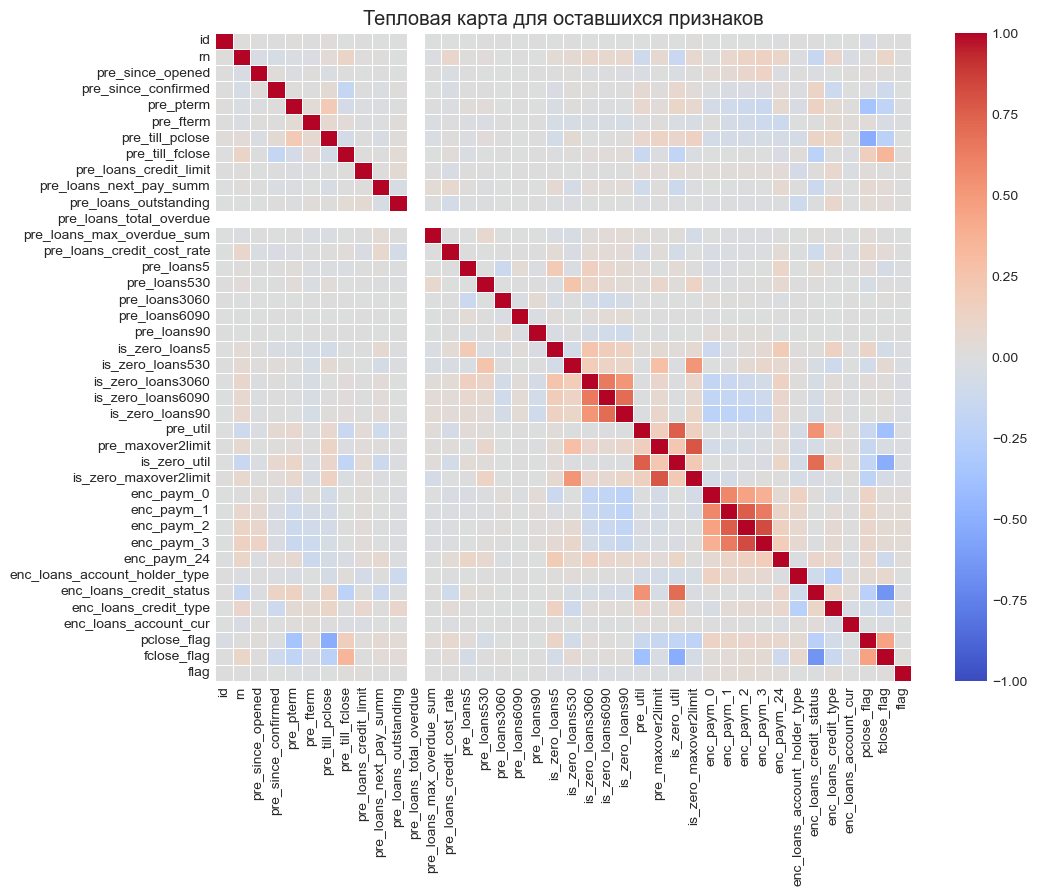

In [38]:
# Извлечение уникальных признаков
high_corr_features = pd.unique(high_corr[['Feature1', 'Feature2']].values.ravel('K'))

# Удаление признаков с высокой корреляцией
reduced_data = merged_data_int8.drop(columns=high_corr_features)
# Построение тепловой карты для оставшихся признаков
correlation_matrix_reduced = reduced_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reduced, annot= False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Тепловая карта для оставшихся признаков')
plt.show()

Удалим признаки

In [39]:
reduced_data = reduced_data.drop('pre_loans_total_overdue', axis=1)

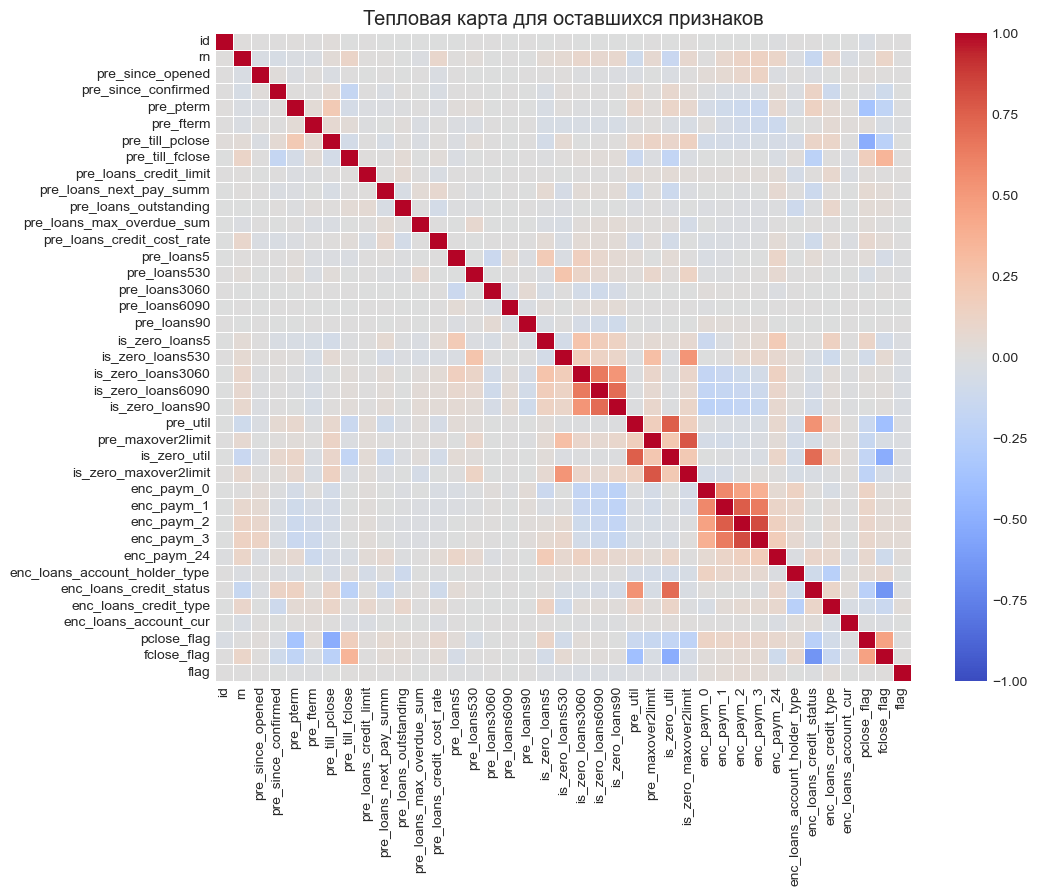

In [40]:
# Построение тепловой карты для оставшихся признаков
correlation_matrix_reduced = reduced_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reduced, annot= False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Тепловая карта для оставшихся признаков')
plt.show()

In [41]:
len(reduced_data.columns)

39

Сформируем списки признаков для удобства в `reduced_data`

In [42]:
# Бинаризированные признаки:

binary_columns = [col for col in reduced_data.columns if reduced_data[col].nunique() == 2]
# Удаляем столбец 'flag' из списка binary_columns
binary_columns.remove('flag')
binary_columns

['is_zero_loans5',
 'is_zero_loans530',
 'is_zero_loans3060',
 'is_zero_loans6090',
 'is_zero_loans90',
 'is_zero_util',
 'is_zero_maxover2limit',
 'pclose_flag',
 'fclose_flag']

In [43]:
# Создаем список столбцов, которые нужно исключить
columns_to_exclude = ['flag', 'id', 'rn'] + binary_columns

# Получаем список столбцов, которые остаются после исключения
categorical_features = reduced_data.columns.difference(columns_to_exclude).tolist()
len(categorical_features)

27

In [44]:
# Применение one-hot encoding к категориальным признакам и удаление исходных столбцов
merged_data_int8_encoded = pd.get_dummies(merged_data_int8, columns=categorical_features, drop_first=True)

# Печать результирующего DataFrame
print("Результирующий DataFrame после one-hot encoding и удаления исходных категориальных столбцов:")
merged_data_int8_encoded

Результирующий DataFrame после one-hot encoding и удаления исходных категориальных столбцов:


id  rn  pre_loans_total_overdue  is_zero_loans5  \
0        250000   1                        0               1   
1        250000   2                        0               1   
2        250000   3                        0               1   
3        250000   4                        0               1   
4        250000   5                        0               1   
...         ...  ..                      ...             ...   
2107300  499999   8                        0               1   
2107301  499999   9                        0               1   
2107302  499999  10                        0               1   
2107303  499999  11                        0               1   
2107304  499999  12                        0               1   

         is_zero_loans530  is_zero_loans3060  is_zero_loans6090  \
0                       0                  1                  0   
1                       1                  0                  0   
2                       0                  0                  1   
3                       0                  0                  0   
4                       1                  1                  1   
...                   ...                ...                ...   
2107300                 1                  1                  1   
2107301                 1                  1                  1   
2107302                 1                  1                  1   
2107303                 1                  1                  1   
2107304                 1                  1                  1   

         is_zero_loans90  pre_over2limit  is_zero_util  ...  pre_util_10  \
0                      0               2             1  ...        False   
1                      1               2             1  ...        False   
2                      1               2             1  ...        False   
3                      0               2             1  ...        False   
4                      0               5             0  ...        False   
...                  ...             ...           ...  ...          ...   
2107300                1               2             1  ...        False   
2107301                1               2             1  ...        False   
2107302                1               2             0  ...        False   
2107303                1               2             0  ...        False   
2107304                1               2             0  ...        False   

         pre_util_11  pre_util_12  pre_util_13  pre_util_14  pre_util_15  \
0              False        False        False        False        False   
1              False        False        False        False        False   
2              False        False        False        False        False   
3              False        False        False        False        False   
4              False        False        False        False        False   
...              ...          ...          ...          ...          ...   
2107300        False        False        False        False        False   
2107301        False        False        False        False        False   
2107302        False        False         True        False        False   
2107303        False        False        False        False        False   
2107304        False        False        False        False        False   

         pre_util_16  pre_util_17  pre_util_18  pre_util_19  
0               True        False        False        False  
1               True        False        False        False  
2               True        False        False        False  
3               True        False        False        False  
4              False        False        False        False  
...              ...          ...          ...          ...  
2107300         True        False        False        False  
2107301         True        False        False        False  
2107302        False        False        False        F

<a id="ch009"></a>
## 9. Группировка датафрейма по id и моделирование

Организуем загрузку всех файлов и смержим их с целевой. Сгруппируем по id и вычислим СРЕДНЕЕ для каждого признака.

In [45]:
df_mean = merged_data_int8_encoded.groupby('id').mean().reset_index()

In [46]:
# 1. Удаление столбцов 'id' и 'rn'
df = df_mean.drop(['id', 'rn'], axis=1)

# 2. Разделение данных на признаки и целевую переменную
X = df.drop('flag', axis=1)
y = df['flag']

Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     48371
         1.0       0.08      0.67      0.14      1629

    accuracy                           0.73     50000
   macro avg       0.53      0.70      0.49     50000
weighted avg       0.96      0.73      0.82     50000

Confusion Matrix:
 [[35305 13066]
 [  544  1085]]
ROC AUC: 0.7615137902501307


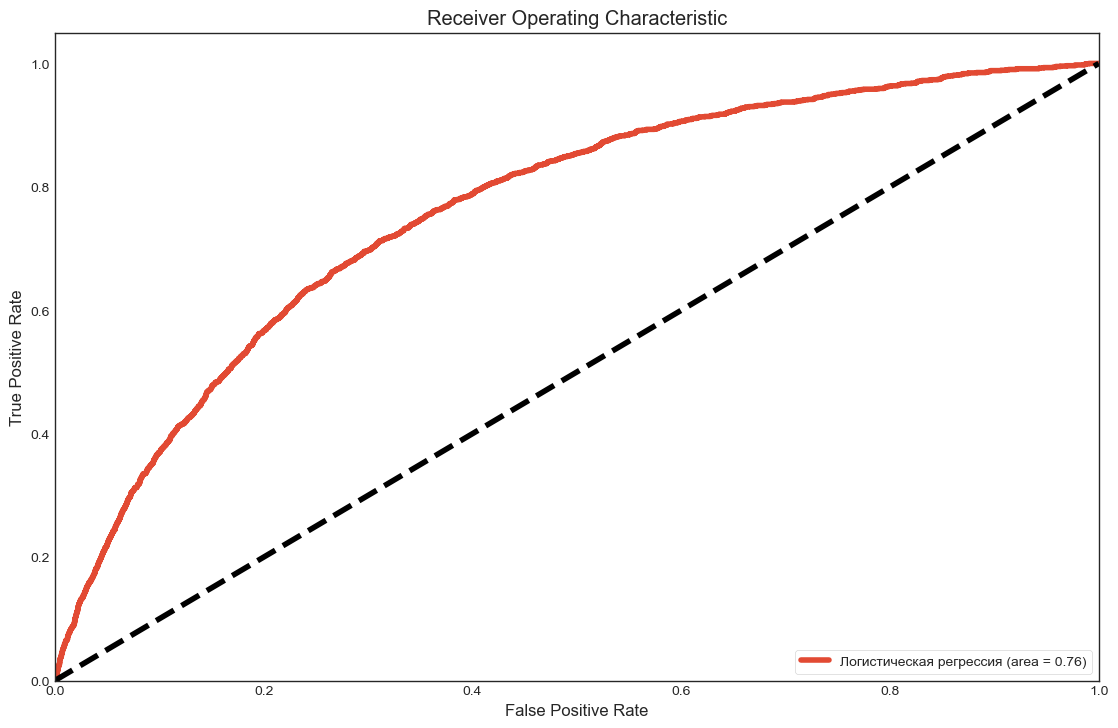

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели логистической регрессии
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# 5. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 6. Расчёт метрик качества
print("Классификационный отчет:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Логистическая регрессия (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Cross-validation ROC AUC scores: [0.73947342 0.72851519 0.73546822 0.72056833 0.72929684]
Mean ROC AUC score: 0.7306644015242971
Классификационный отчет для XGBoost на тестовом наборе:
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94     48371
         1.0       0.10      0.32      0.15      1629

    accuracy                           0.88     50000
   macro avg       0.54      0.61      0.55     50000
weighted avg       0.95      0.88      0.91     50000

Confusion Matrix для XGBoost на тестовом наборе:
 [[43711  4660]
 [ 1111   518]]
ROC AUC для XGBoost на тестовом наборе: 0.7328453590095451


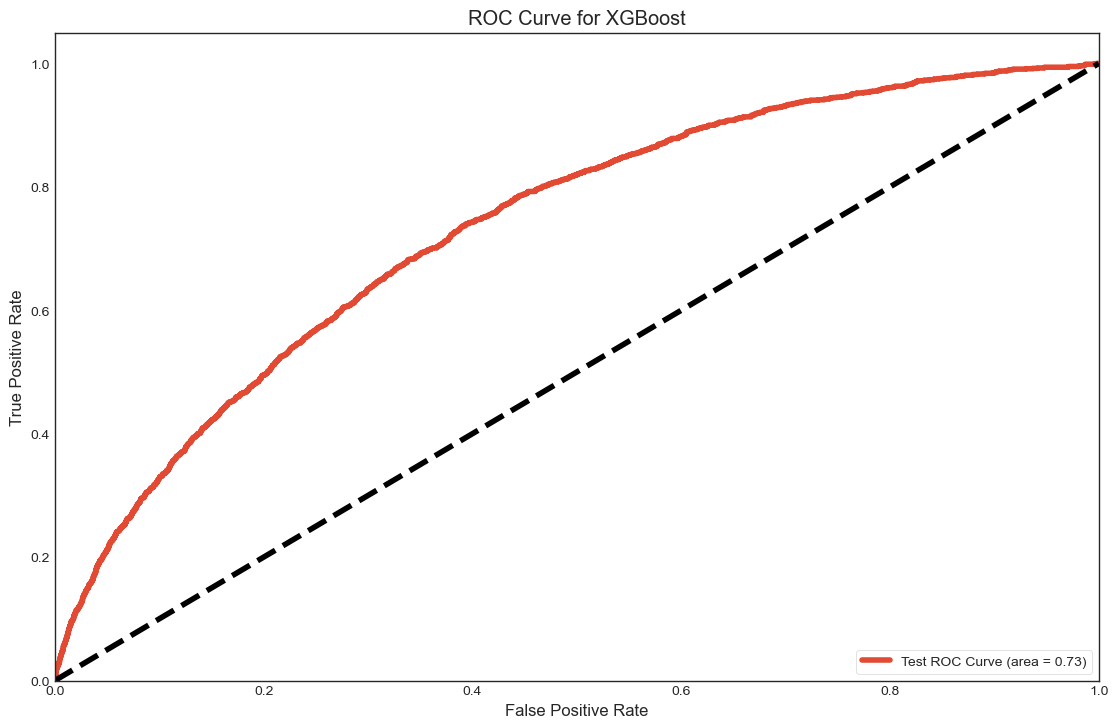

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Создание экземпляра модели XGBClassifier с установленным весом положительного класса
positive_class_weight = 18
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=positive_class_weight)

# Кросс-валидация
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(xgb_model, X, y, cv=kfold, scoring='roc_auc')

print("Cross-validation ROC AUC scores:", results)
print("Mean ROC AUC score:", results.mean())

# Обучение модели на всем наборе данных
xgb_model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Классификационный отчет и матрица ошибок
print("Классификационный отчет для XGBoost на тестовом наборе:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix для XGBoost на тестовом наборе:\n", confusion_matrix(y_test, y_pred_xgb))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print("ROC AUC для XGBoost на тестовом наборе:", roc_auc_xgb)

# Построение ROC-кривой
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'Test ROC Curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # диагональная линия для сравнения
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()


Логистическая регрессия уже показывает ROC > 76%, что удовлетворяет требованиям задачи. 

Проверим еще на нескольких датафреймах.

In [52]:
# Функции для выборочной проверки датафреймов
def measure_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    print(f"Время выполнения {func.__name__}: {end_time - start_time:.2f} секунд")
    return result

def read_file(file_path):
    return pd.read_parquet(file_path)

def add_target_column(data, target_file_path):
    target_data = pd.read_csv(target_file_path)
    merged_data = pd.merge(data, target_data, on='id', how='left')
    return merged_data

def process_data(file_path, target_file_path, categorical_features):
    # Скачиваем один файл и добавляем столбец с таргетом
    merged_data = measure_time(read_file, file_path)
    merged_data = measure_time(add_target_column, merged_data, target_file_path)
    
    # Преобразуем выбранные столбцы в тип данных int8
    columns_to_convert = merged_data.columns.drop('id')
    merged_data[columns_to_convert] = merged_data[columns_to_convert].astype('int8')
    
    # Применяем one-hot encoding к категориальным признакам и удаляем исходные столбцы
    merged_data_encoded = pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)
    
    # Группируем данные по столбцу 'id' и рассчитываем средние значения
    df_mean = merged_data_encoded.groupby('id').mean().reset_index()
    
    # Печать результирующего DataFrame
    print("Результирующий DataFrame после one-hot encoding и удаления исходных категориальных столбцов готов!")
    df_mean
    
    return df_mean

# 



In [53]:
file_path = 'train_data/train_data_1.pq'
target_file_path = "train_target.csv"
result_df = process_data(file_path, target_file_path, categorical_features)

# 1. Удаление столбцов 'id' и 'rn'
df = result_df.drop(['id', 'rn'], axis=1)

# 2. Разделение данных на признаки и целевую переменную
X = df.drop('flag', axis=1)
y = df['flag']


Время выполнения read_file: 0.59 секунд
Время выполнения add_target_column: 0.66 секунд
Результирующий DataFrame после one-hot encoding и удаления исходных категориальных столбцов готов!


Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     48371
         1.0       0.08      0.67      0.14      1629

    accuracy                           0.73     50000
   macro avg       0.53      0.70      0.49     50000
weighted avg       0.96      0.73      0.82     50000

Confusion Matrix:
 [[35305 13066]
 [  544  1085]]
ROC AUC: 0.7615137902501307


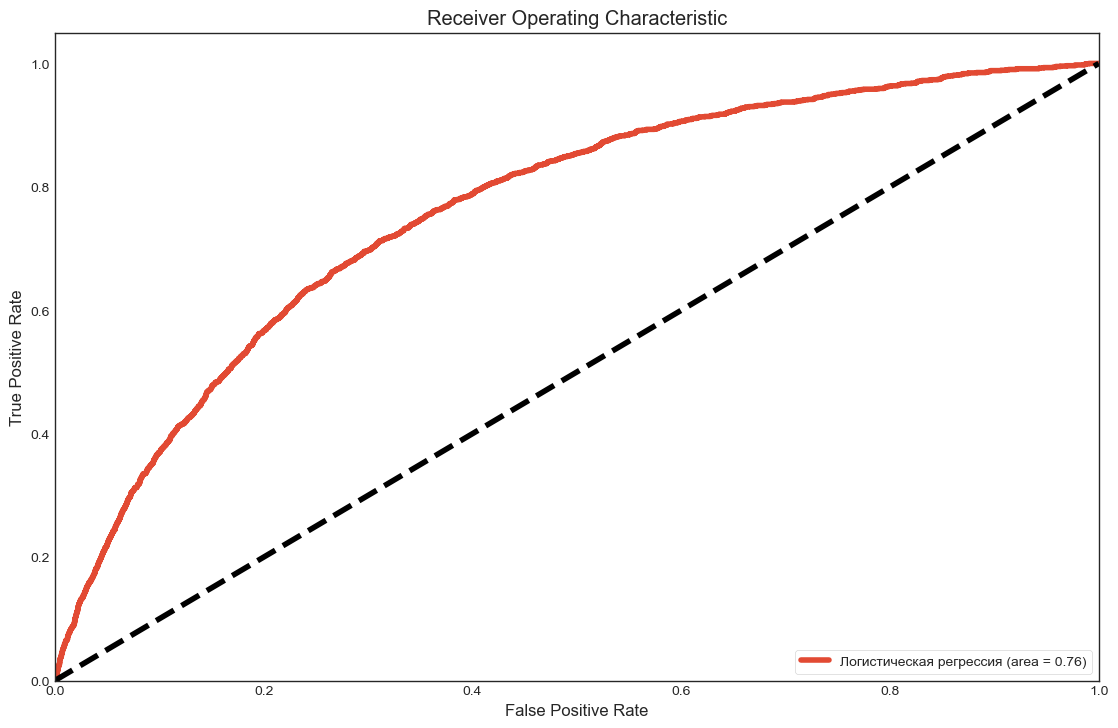

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели логистической регрессии
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# 5. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 6. Расчёт метрик качества
print("Классификационный отчет:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Логистическая регрессия (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9611 - loss: 0.1726 - val_accuracy: 0.9680 - val_loss: 0.1307
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 955us/step - accuracy: 0.9674 - loss: 0.1392 - val_accuracy: 0.9680 - val_loss: 0.1311
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 986us/step - accuracy: 0.9662 - loss: 0.1406 - val_accuracy: 0.9680 - val_loss: 0.1296
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 937us/step - accuracy: 0.9673 - loss: 0.1353 - val_accuracy: 0.9680 - val_loss: 0.1299
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 933us/step - accuracy: 0.9668 - loss: 0.1366 - val_accuracy: 0.9680 - val_loss: 0.1298
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.9673 - loss: 0.1321
Loss: 0.1317562758922577
Accuracy: 0.9674199819564819
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step
Нейронная сеть - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     48371
         1.0     

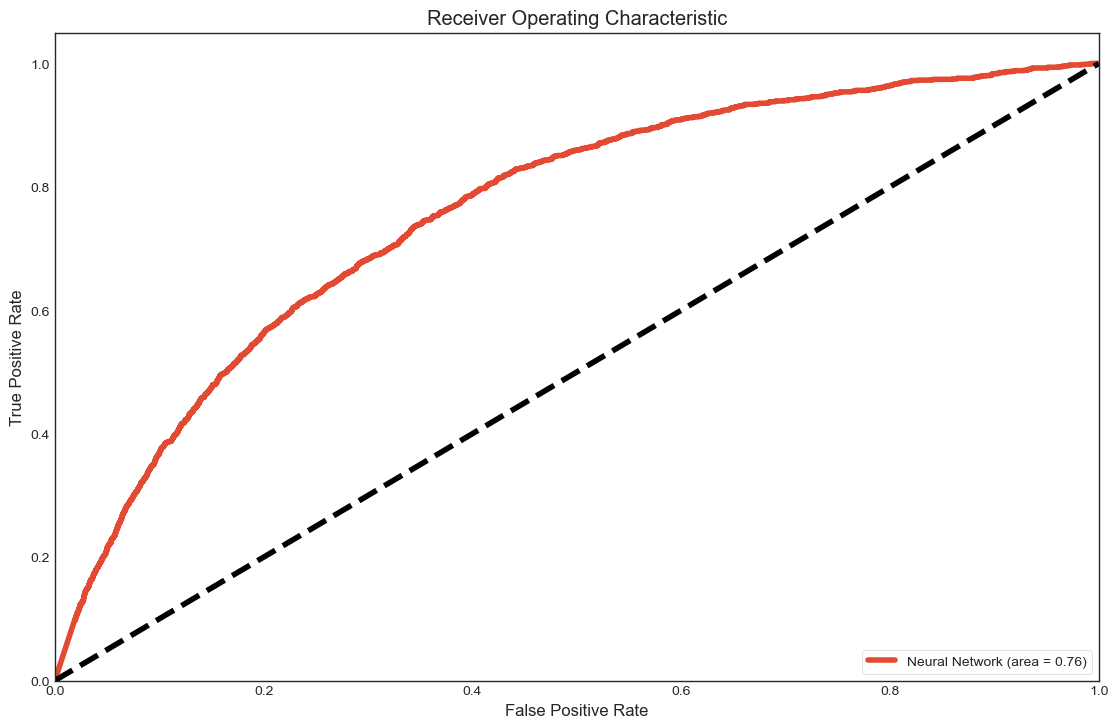

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Определение архитектуры нейронной сети
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Оценка качества модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Предсказание на тестовых данных
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Расчёт метрик качества
print("Нейронная сеть - Классификационный отчет:\n", classification_report(y_test, y_pred_nn))
print("Нейронная сеть - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# ROC AUC
roc_auc_nn = roc_auc_score(y_test, model.predict(X_test))
print("Нейронная сеть - ROC AUC:", roc_auc_nn)

# ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Epoch 1/5
12088/12088 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.6090 - loss: 0.6603 - val_accuracy: 0.6731 - val_loss: 0.6025
Epoch 2/5
12088/12088 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6866 - loss: 0.6003 - val_accuracy: 0.6540 - val_loss: 0.5982
Epoch 3/5
12088/12088 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6976 - loss: 0.5873 - val_accuracy: 0.6486 - val_loss: 0.5893
Epoch 4/5
12088/12088 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7040 - loss: 0.5777 - val_accuracy: 0.6533 - val_loss: 0.5773
Epoch 5/5
12088/12088 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7116 - loss: 0.5685 - val_accuracy: 0.6468 - val_loss: 0.5693
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.6465 - loss: 0.5700
Loss: 0.5693030953407288
Accuracy: 0.64683997631073
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step
Нейронная сеть - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.99      0.64      0.78     48371
         1.0

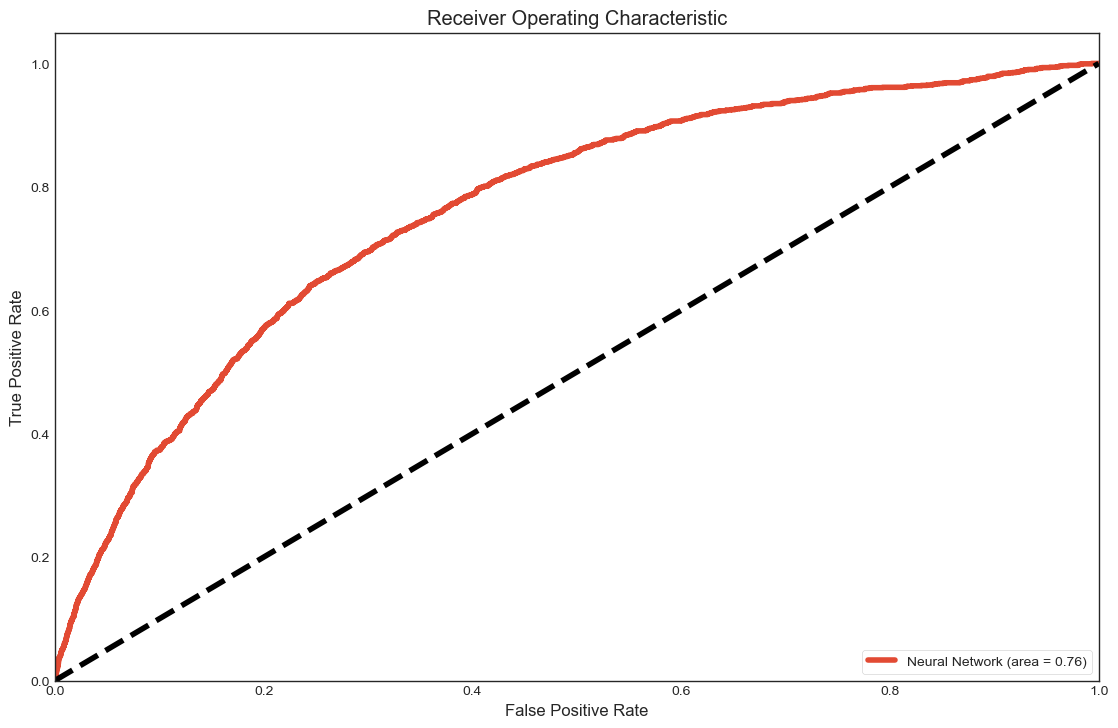

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.keras import balanced_batch_generator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Балансировка классов с помощью RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Определение архитектуры нейронной сети
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели с помощью балансированных батчей
train_generator, steps_per_epoch = balanced_batch_generator(X_train_resampled, y_train_resampled, batch_size=32, random_state=42)
history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=5, validation_data=(X_test, y_test), verbose=1)

# Оценка качества модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Предсказание на тестовых данных
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Расчёт метрик качества
print("Нейронная сеть - Классификационный отчет:\n", classification_report(y_test, y_pred_nn))
print("Нейронная сеть - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# ROC AUC
roc_auc_nn = roc_auc_score(y_test, model.predict(X_test))
print("Нейронная сеть - ROC AUC:", roc_auc_nn)

# ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Random Forest - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     48371
         1.0       0.16      0.00      0.00      1629

    accuracy                           0.97     50000
   macro avg       0.56      0.50      0.49     50000
weighted avg       0.94      0.97      0.95     50000

Random Forest - Confusion Matrix:
 [[48350    21]
 [ 1625     4]]
Random Forest - ROC AUC: 0.6821664374111499


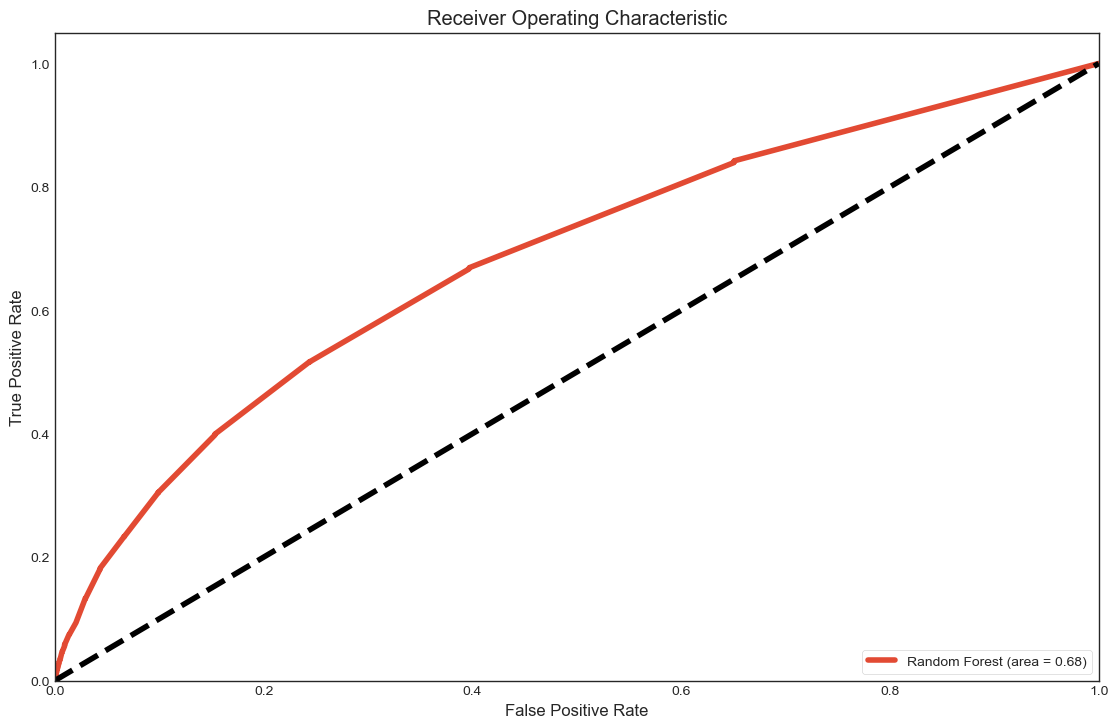

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели случайного леса
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_rf = rf.predict(X_test)

# Расчёт метрик качества
print("Random Forest - Классификационный отчет:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC AUC
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("Random Forest - ROC AUC:", roc_auc_rf)

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Наивный байесовский классификатор - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     48371
         1.0       0.06      0.60      0.12      1629

    accuracy                           0.70     50000
   macro avg       0.52      0.65      0.47     50000
weighted avg       0.95      0.70      0.80     50000

Наивный байесовский классификатор - Confusion Matrix:
 [[34137 14234]
 [  647   982]]
Наивный байесовский классификатор - ROC AUC: 0.7092690412256232


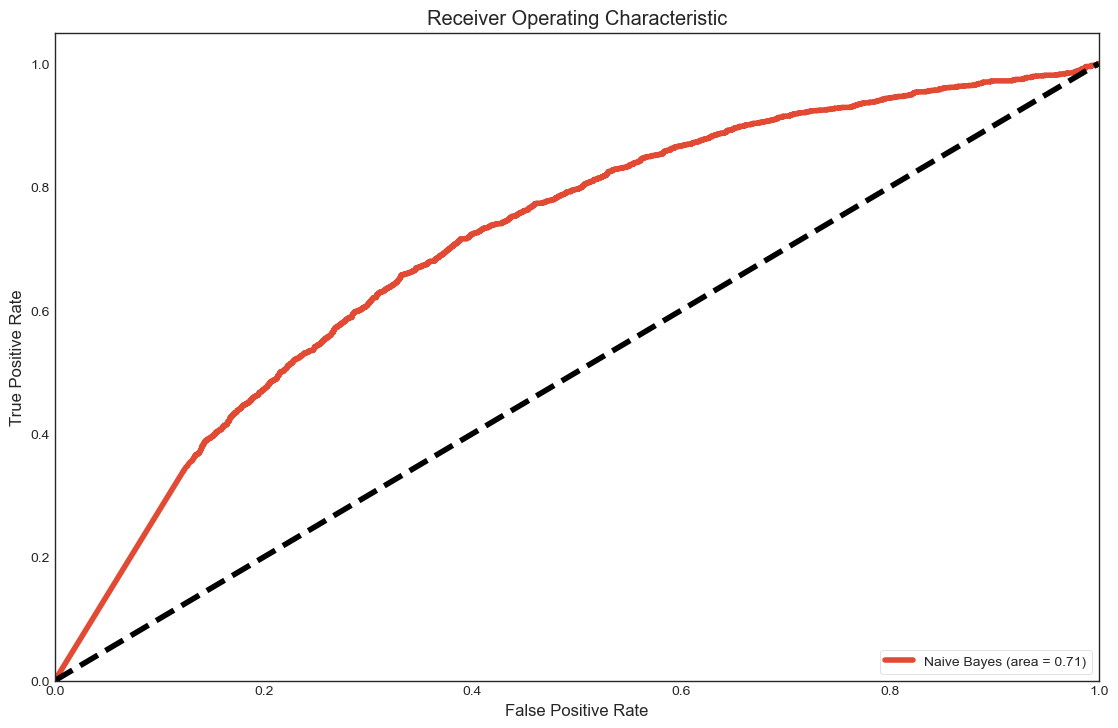

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели наивного байесовского классификатора
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_nb = gnb.predict(X_test)

# Расчёт метрик качества
print("Наивный байесовский классификатор - Классификационный отчет:\n", classification_report(y_test, y_pred_nb))
print("Наивный байесовский классификатор - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# ROC AUC
roc_auc_nb = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])
print("Наивный байесовский классификатор - ROC AUC:", roc_auc_nb)

# ROC Curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Random Forest - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     48371
         1.0       0.19      0.01      0.01      1629

    accuracy                           0.97     50000
   macro avg       0.58      0.50      0.50     50000
weighted avg       0.94      0.97      0.95     50000

Random Forest - Confusion Matrix:
 [[48329    42]
 [ 1619    10]]
Random Forest - ROC AUC: 0.7082732337924396


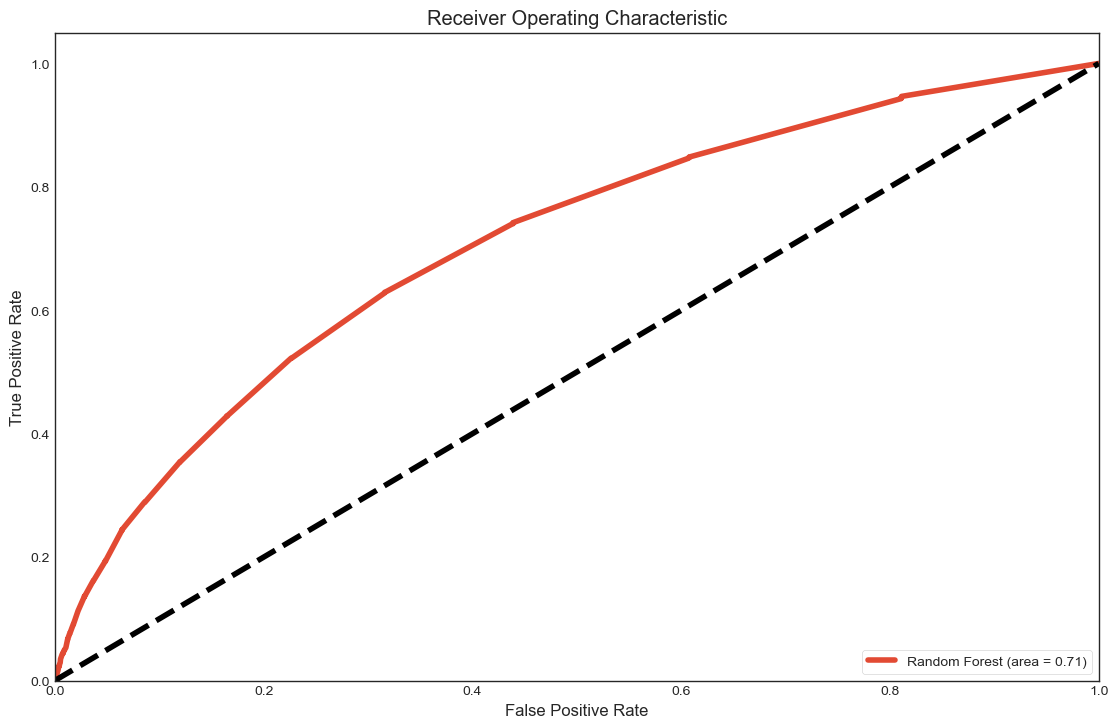

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели случайного леса с учетом веса классов
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_rf = rf.predict(X_test)

# Расчёт метрик качества
print("Random Forest - Классификационный отчет:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC AUC
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("Random Forest - ROC AUC:", roc_auc_rf)

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [149]:
weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
weight = 28

Weighted Gradient Boosting - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     48371
         1.0       0.08      0.63      0.14      1629

    accuracy                           0.75     50000
   macro avg       0.53      0.69      0.50     50000
weighted avg       0.95      0.75      0.83     50000

Weighted Gradient Boosting - Confusion Matrix:
 [[36485 11886]
 [  606  1023]]
Weighted Gradient Boosting - ROC AUC: 0.7622411144657079


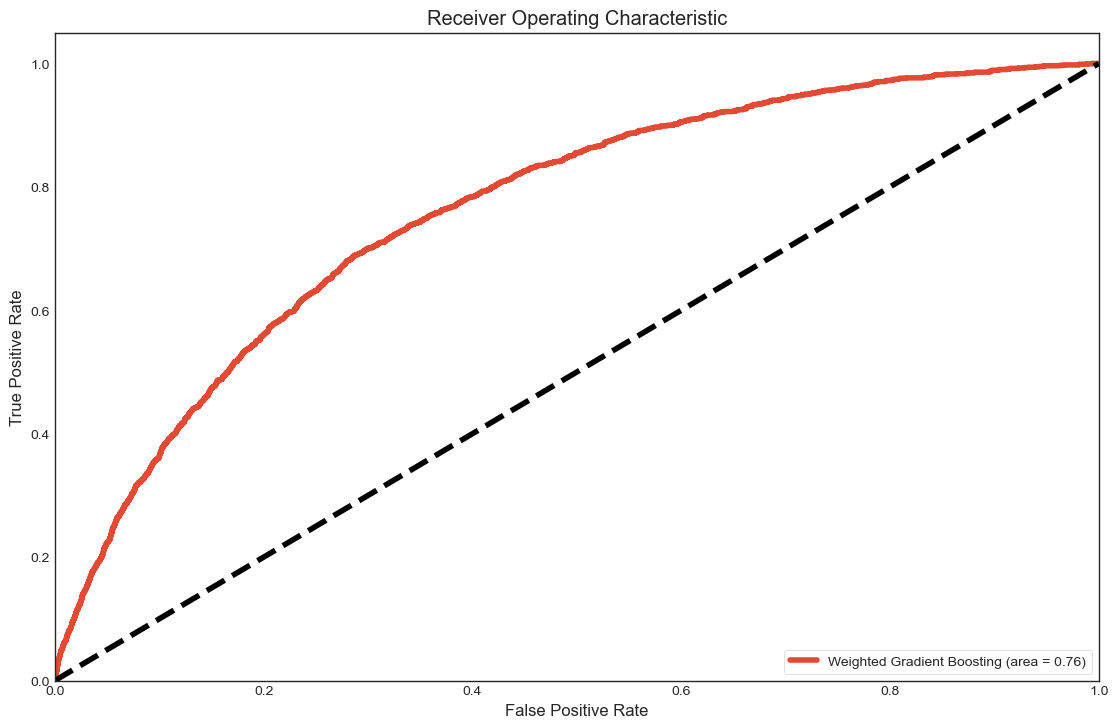

In [150]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация параметров модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'scale_pos_weight': weight # установка веса класса
}

# Преобразование данных в формат DMatrix для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Обучение модели
bst = xgb.train(params, dtrain, num_boost_round=100)

# Предсказание на тестовых данных
y_pred_xgb = bst.predict(dtest)

# Преобразование вероятностей в бинарные предсказания
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

# Расчёт метрик качества
print("Weighted Gradient Boosting - Классификационный отчет:\n", classification_report(y_test, y_pred_binary))
print("Weighted Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("Weighted Gradient Boosting - ROC AUC:", roc_auc_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='Weighted Gradient Boosting (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Выборочная обработка (OneHotEncoding) датафреймов дает результаты  ROC AUC [72, 76] 

<a id="ch0010"></a>
## 10. Feature-инжениринг

    Feature-инжениринг (инжениринг признаков) является одним из наиболее критичных этапов в процессе разработки моделей машинного обучения. Он включает в себя создание, преобразование и отбор признаков (фичей), которые затем используются алгоритмами для обучения. Важность и необходимость feature-инжениринга трудно переоценить, и вот почему. Процесс feature-инжениринга требует глубокого понимания предметной области и данных, с которыми вы работаете. Создание новых признаков часто требует анализа и интерпретации данных, что, в свою очередь, помогает лучше понять, какие факторы влияют на целевую переменную. Это понимание может привести к открытию новых закономерностей и инсайтов, которые могут быть использованы для улучшения модели.

Создание новых признаков из предоставленных данных может улучшить производительность модели, особенно если исходные признаки имеют сложные взаимосвязи. Рассмотрим несколько способов генерации новых признаков, которые могут быть полезны для модели.

Примеры новых признаков:
1. Сумма просрочек: Сумма всех видов просрочек.
2. Среднее значение дней с момента открытия до даты сбора данных: Среднее значение из pre_since_opened и pre_since_confirmed.
3. Флаги просрочек: Сумма флагов просрочек.
4. Максимальное и минимальное значение суммы следующего платежа: Из признаков pre_loans_next_pay_summ.
5. Разница между фактическими и плановыми сроками закрытия кредита: pre_till_fclose - pre_till_pclose.

In [75]:
len(merged_data_int8.columns)

62

In [77]:
import pandas as pd

# Инициализация DataFrame с идентификатором из merged_data_int8
new_features = merged_data_int8[['id']].copy()

# Добавление новых столбцов с вычислениями
new_features['total_overdue'] = (merged_data_int8['pre_loans5'] +
                                 merged_data_int8['pre_loans530'] +
                                 merged_data_int8['pre_loans3060'] +
                                 merged_data_int8['pre_loans6090'] +
                                 merged_data_int8['pre_loans90'])

new_features['avg_days_since_open'] = (merged_data_int8['pre_since_opened'] + merged_data_int8['pre_since_confirmed']) / 2

new_features['total_zero_loans'] = (merged_data_int8['is_zero_loans5'] +
                                    merged_data_int8['is_zero_loans530'] +
                                    merged_data_int8['is_zero_loans3060'] +
                                    merged_data_int8['is_zero_loans6090'] +
                                    merged_data_int8['is_zero_loans90'])

new_features['max_next_pay_summ'] = merged_data_int8['pre_loans_next_pay_summ'].max()
new_features['min_next_pay_summ'] = merged_data_int8['pre_loans_next_pay_summ'].min()

new_features['diff_till_close'] = merged_data_int8['pre_till_fclose'] - merged_data_int8['pre_till_pclose']

new_features['outstanding_to_credit_limit'] = merged_data_int8['pre_loans_outstanding'] / (merged_data_int8['pre_loans_credit_limit'] + 0.0000001)

new_features['overdue_to_credit_limit'] = merged_data_int8['pre_loans_total_overdue'] / (merged_data_int8['pre_loans_credit_limit'] + 0.0000001)

new_features['max_overdue_to_credit_limit'] = merged_data_int8['pre_loans_max_overdue_sum'] / (merged_data_int8['pre_loans_credit_limit'] + 0.0000001)

# Создание бинарных признаков
for i in range(N):
    if f'enc_paym_{i}' in merged_data_int8.columns:
        new_features[f'enc_paym_{i}_flag'] = merged_data_int8[f'enc_paym_{i}'].apply(lambda x: 1 if x > 0 else 0)

# Вывод первых нескольких строк для провер
new_features.head()


id  total_overdue  avg_days_since_open  total_zero_loans  \
0  250000             39                  7.5                 2   
1  250000             39                 11.0                 3   
2  250000             39                  7.0                 3   
3  250000             39                 12.5                 1   
4  250000             39                  9.0                 4   

   max_next_pay_summ  min_next_pay_summ  diff_till_close  \
0                  6                  0                5   
1                  6                  0               -3   
2                  6                  0                7   
3                  6                  0               -8   
4                  6                  0                6   

   outstanding_to_credit_limit  overdue_to_credit_limit  \
0                         0.60                      0.0   
1                         0.25                      0.0   
2                         0.60                      0.0   
3                         0.25                      0.0   
4                         0.75                      0.0   

   max_overdue_to_credit_limit  ...  enc_paym_15_flag  enc_paym_16_flag  \
0                     0.600000  ...                 1                 1   
1                     0.166667  ...                 0                 0   
2                     0.400000  ...                 1                 1   
3                     0.166667  ...                 1                 1   
4                     0.500000  ...                 1                 1   

   enc_paym_17_flag  enc_paym_18_flag  enc_paym_19_flag  enc_paym_20_flag  \
0                 1                 1                 1                 1   
1                 0                 0                 1                 1   
2                 1                 1                 1                 1   
3                 1                 1                 1                 1   
4                 1                 1                 1                 1   

   enc_paym_21_flag  enc_paym_22_flag  enc_paym_23_flag  enc_paym_24_flag  
0                 1                 1                 1                 1  
1                 1                 1                 1                 1  
2                 1                 1                 1                 1  
3                 1                 1                 1                 1  
4                 1                 1                 1                 1  

[5 rows x 35 columns]

In [78]:
new_features = new_features.drop(['overdue_to_credit_limit', 'enc_paym_11_flag', 'enc_paym_20_flag'], axis=1)


In [93]:
df_mean_new_features = new_features.groupby('id').mean().reset_index()
        

In [98]:
reduced_data_ = reduced_data.groupby('id').mean().reset_index()

In [99]:
merged_df = df_mean_new_features.merge(reduced_data_, on='id', how='inner')


In [100]:
merged_df.shape

(250000, 70)

In [101]:
# 1. Удаление столбцов 'id' и 'rn'
df = merged_df.drop(['id', 'rn'], axis=1)

# 2. Разделение данных на признаки и целевую переменную
X = df.drop('flag', axis=1)
y = df['flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Weighted Gradient Boosting - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     48371
         1.0       0.07      0.61      0.13      1629

    accuracy                           0.73     50000
   macro avg       0.53      0.67      0.48     50000
weighted avg       0.95      0.73      0.82     50000

Weighted Gradient Boosting - Confusion Matrix:
 [[35428 12943]
 [  643   986]]
Weighted Gradient Boosting - ROC AUC: 0.7307422415292056


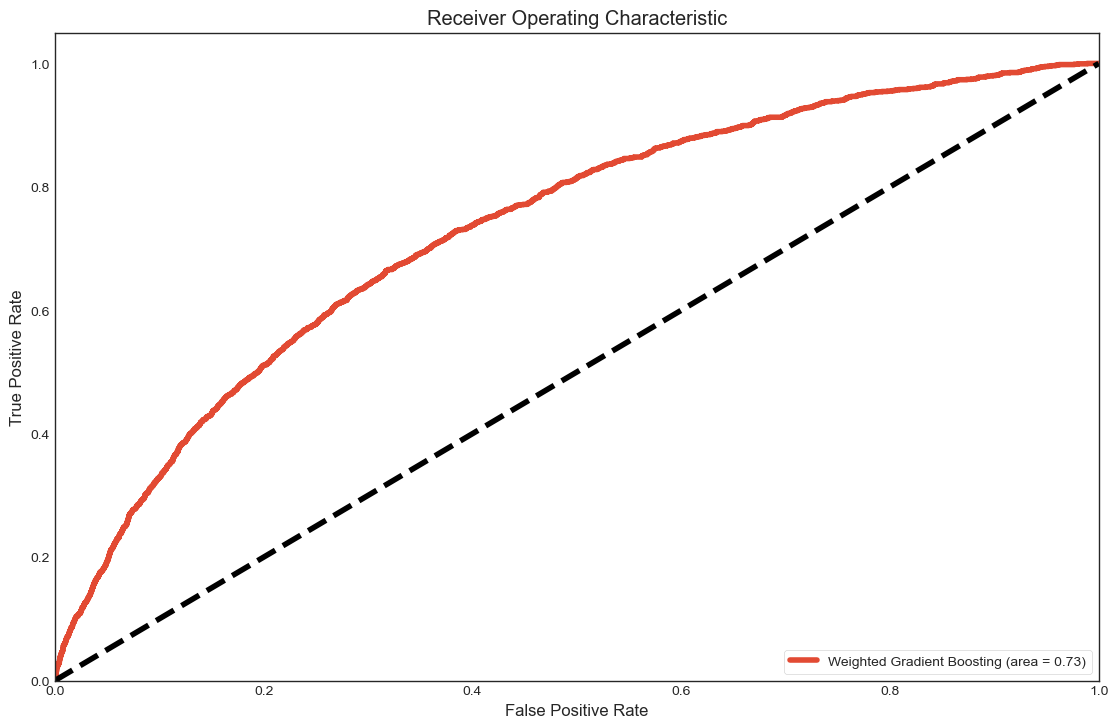

In [103]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
weight = 28
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация параметров модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'scale_pos_weight': weight # установка веса класса
}

# Преобразование данных в формат DMatrix для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Обучение модели
bst = xgb.train(params, dtrain, num_boost_round=100)

# Предсказание на тестовых данных
y_pred_xgb = bst.predict(dtest)

# Преобразование вероятностей в бинарные предсказания
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

# Расчёт метрик качества
print("Weighted Gradient Boosting - Классификационный отчет:\n", classification_report(y_test, y_pred_binary))
print("Weighted Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("Weighted Gradient Boosting - ROC AUC:", roc_auc_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='Weighted Gradient Boosting (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


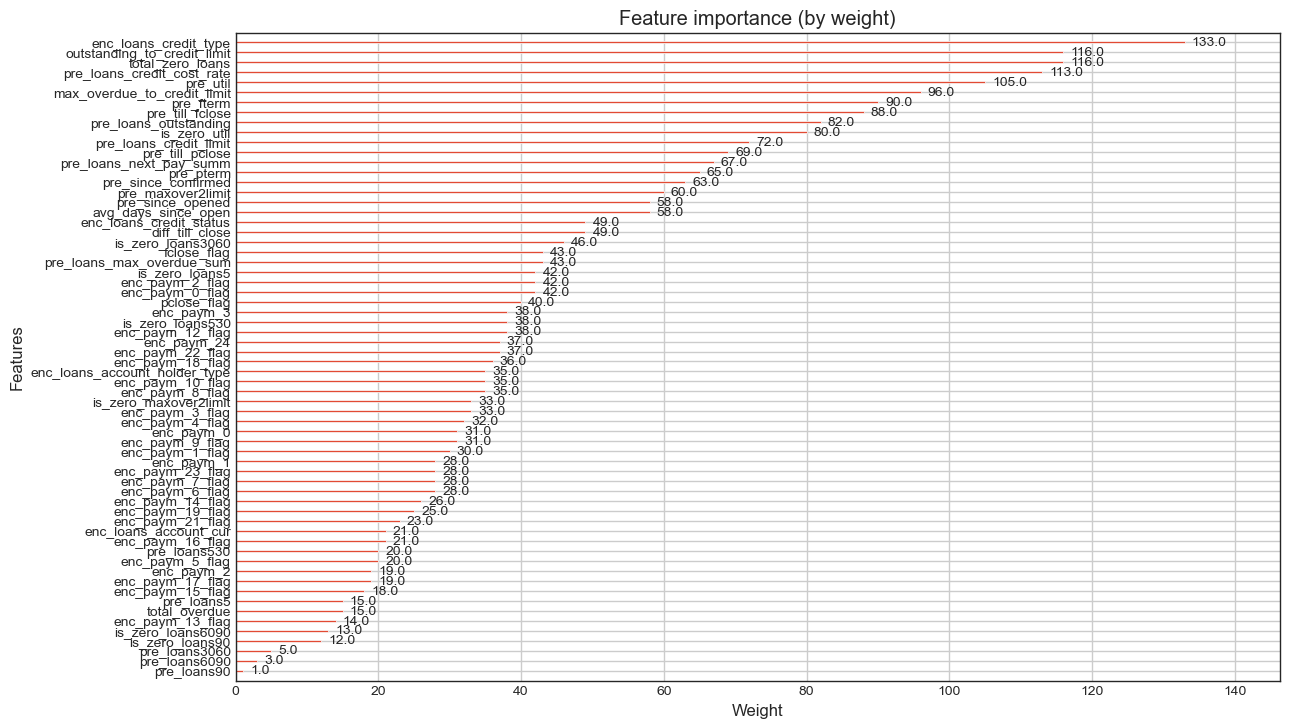

In [104]:
# Построение графика значимости признаков
xgb.plot_importance(bst, importance_type='weight', title='Feature importance (by weight)', xlabel='Weight', ylabel='Features')
plt.show()

In [115]:
importances = bst.get_score(importance_type='weight')
# Отфильтруем признаки с значимостью больше 30
filtered_features = [feature for feature, importance in importances.items() if importance > 5]

# Сократим X_train и X_test до отфильтрованных признаков
X_train_filtered = X_train[filtered_features]
X_test_filtered = X_test[filtered_features]


Filtered Weighted Gradient Boosting - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     48371
         1.0       0.07      0.61      0.13      1629

    accuracy                           0.73     50000
   macro avg       0.53      0.67      0.48     50000
weighted avg       0.95      0.73      0.82     50000

Filtered Weighted Gradient Boosting - Confusion Matrix:
 [[35460 12911]
 [  636   993]]
Filtered Weighted Gradient Boosting - ROC AUC: 0.7317789455220893


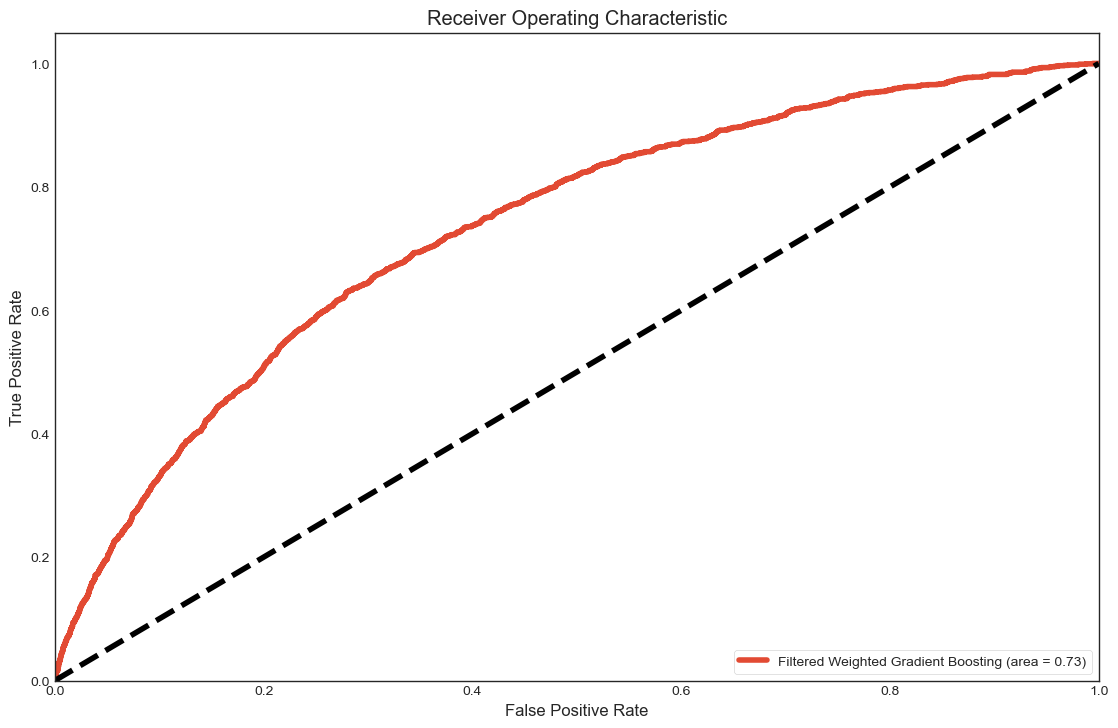

In [116]:
# Преобразование данных в формат DMatrix для XGBoost
dtrain_filtered = xgb.DMatrix(X_train_filtered, label=y_train)
dtest_filtered = xgb.DMatrix(X_test_filtered, label=y_test)

# Обучение модели
bst_filtered = xgb.train(params, dtrain_filtered, num_boost_round=100)

# Предсказание на тестовых данных
y_pred_filtered = bst_filtered.predict(dtest_filtered)

# Преобразование вероятностей в бинарные предсказания
y_pred_binary_filtered = [1 if p >= 0.5 else 0 for p in y_pred_filtered]

# Расчёт метрик качества
print("Filtered Weighted Gradient Boosting - Классификационный отчет:\n", classification_report(y_test, y_pred_binary_filtered))
print("Filtered Weighted Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary_filtered))

# ROC AUC
roc_auc_filtered = roc_auc_score(y_test, y_pred_filtered)
print("Filtered Weighted Gradient Boosting - ROC AUC:", roc_auc_filtered)

# ROC Curve
fpr_filtered, tpr_filtered, thresholds_filtered = roc_curve(y_test, y_pred_filtered)
plt.figure()
plt.plot(fpr_filtered, tpr_filtered, label='Filtered Weighted Gradient Boosting (area = %0.2f)' % roc_auc_filtered)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [118]:
# 1. Удаление столбцов 'id' и 'rn'
df = df_mean.drop(['id', 'rn'], axis=1)

# 2. Разделение данных на признаки и целевую переменную
X = df.drop('flag', axis=1)
y = df['flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Weighted Gradient Boosting - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     48371
         1.0       0.08      0.63      0.14      1629

    accuracy                           0.75     50000
   macro avg       0.53      0.69      0.50     50000
weighted avg       0.95      0.75      0.83     50000

Weighted Gradient Boosting - Confusion Matrix:
 [[36485 11886]
 [  606  1023]]
Weighted Gradient Boosting - ROC AUC: 0.7622411144657079


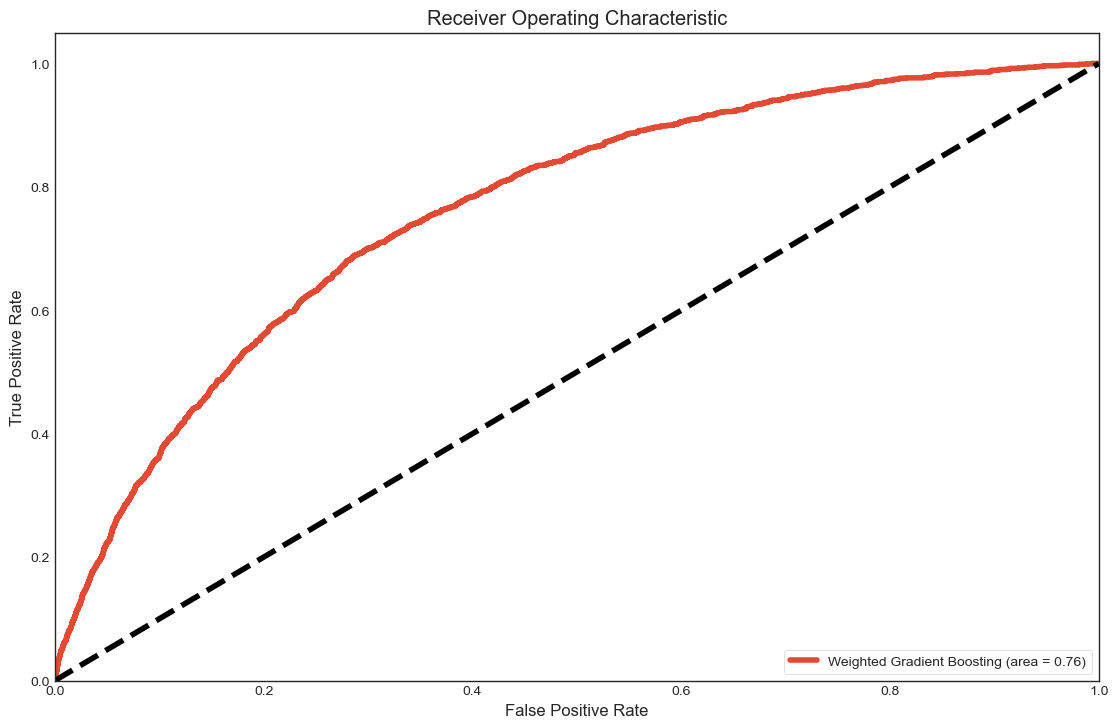

In [119]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
weight = 28
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация параметров модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'scale_pos_weight': weight # установка веса класса
}

# Преобразование данных в формат DMatrix для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Обучение модели
bst = xgb.train(params, dtrain, num_boost_round=100)

# Предсказание на тестовых данных
y_pred_xgb = bst.predict(dtest)

# Преобразование вероятностей в бинарные предсказания
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

# Расчёт метрик качества
print("Weighted Gradient Boosting - Классификационный отчет:\n", classification_report(y_test, y_pred_binary))
print("Weighted Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("Weighted Gradient Boosting - ROC AUC:", roc_auc_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='Weighted Gradient Boosting (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [33]:
columns_more_then_85 = ['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_max_overdue_sum',
       'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530',
       'pre_loans3060', 'pre_loans6090', 'pre_loans90', 'is_zero_loans5',
       'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090',
       'is_zero_loans90', 'pre_util', 'pre_maxover2limit', 'is_zero_util',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_24', 'enc_loans_account_holder_type',
       'enc_loans_credit_status', 'enc_loans_credit_type',
       'enc_loans_account_cur', 'pclose_flag', 'fclose_flag', 'flag']

In [34]:
categorical_features = ['enc_loans_account_cur',
 'enc_loans_account_holder_type',
 'enc_loans_credit_status',
 'enc_loans_credit_type',
 'enc_paym_0',
 'enc_paym_1',
 'enc_paym_2',
 'enc_paym_24',
 'enc_paym_3',
 'pre_fterm',
 'pre_loans3060',
 'pre_loans5',
 'pre_loans530',
 'pre_loans6090',
 'pre_loans90',
 'pre_loans_credit_cost_rate',
 'pre_loans_credit_limit',
 'pre_loans_max_overdue_sum',
 'pre_loans_next_pay_summ',
 'pre_loans_outstanding',
 'pre_maxover2limit',
 'pre_pterm',
 'pre_since_confirmed',
 'pre_since_opened',
 'pre_till_fclose',
 'pre_till_pclose',
 'pre_util']

In [35]:
import os
import pandas as pd
from tqdm import tqdm
import time
import gc



# Путь к папке с файлами
folder_path = 'train_data/'
target_file_path = "train_target.csv"

# Список для хранения загруженных данных
all_data = []

# Получим список файлов для отслеживания прогресса
file_list = [f for f in os.listdir(folder_path) if f.endswith('.pq')]

# Используем цикл для обработки файлов без общего бара прогресса
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    
    # Начало измерения времени обработки файла
    start_time = time.time()
    
    # Создаем бар для обработки текущего файла
    with tqdm(total=100, desc=f"Файл {file_name}", unit="%", colour='green', bar_format='{desc}: {percentage:3.0f}%|{bar:50}{r_bar}') as pbar_file:
        
        # Шаг 1: Чтение файла (обновление бара на 33%)
        merged_data = read_file(file_path)  # Предполагаемая функция read_file для чтения файла
        for _ in range(20):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        
        # Шаг 2: Добавление столбца с таргетом (обновление бара на 33%)
        merged_data_with_target = add_target_column(merged_data, target_file_path)  # Предполагаемая функция add_target_column для добавления столбца с таргетом
        for _ in range(20):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        
        # Шаг 3: Преобразование выбранных столбцов в тип данных int8 (обновление бара на оставшиеся 34%)
        columns_to_convert = merged_data_with_target.columns.drop('id')
        merged_data_with_target[columns_to_convert] = merged_data_with_target[columns_to_convert].astype('int8')
        for _ in range(20):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)


        # Шаг 4: Выбираем признаки с корреляцией меньше 85%
        merged_data_with_target = merged_data_with_target[columns_more_then_85]
        # Применение one-hot encoding к категориальным признакам и удаление исходных столбцов
        merged_data_with_target = pd.get_dummies(merged_data_with_target, columns=categorical_features, drop_first=True)
        for _ in range(20):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        



        
        # Шаг 5: Группировка по id и вычесление среднего (обновление бара на оставшиеся 34%)
        # Среднее
        df_mean = merged_data_with_target.groupby('id').mean().reset_index()
        
        for _ in range(20):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        
        # Добавление обработанных данных в список
        all_data.append(df_mean)
        
        # Очистка промежуточных данных для освобождения ОЗУ
        del merged_data
        del merged_data_with_target
        gc.collect()
        
        # Завершение измерения времени обработки файла
        end_time = time.time()
        
        # Вывод времени выполнения текущего файла
        tqdm.write(f"Файл {file_name} обработан. Время выполнения: {end_time - start_time:.2f} секунд.")

# Объединение всех обработанных данных в один DataFrame
merged_data_all = pd.concat(all_data, ignore_index=True)

# Очистка списка all_data для освобождения ОЗУ
del all_data
gc.collect()

# Создание копии DataFrame для дальнейшей обработки
#merged_data_int8 = merged_data_all.copy()

# Вывод сообщения о завершении обработки
print("Обработка всех файлов завершена.")


Файл train_data_0.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.51%/s]


Файл train_data_0.pq обработан. Время выполнения: 13.34 секунд.


Файл train_data_1.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.46%/s]


Файл train_data_1.pq обработан. Время выполнения: 13.41 секунд.


Файл train_data_10.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.23%/s]


Файл train_data_10.pq обработан. Время выполнения: 13.83 секунд.


Файл train_data_11.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.13%/s]


Файл train_data_11.pq обработан. Время выполнения: 14.03 секунд.


Файл train_data_2.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.68%/s]


Файл train_data_2.pq обработан. Время выполнения: 13.02 секунд.


Файл train_data_3.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.69%/s]


Файл train_data_3.pq обработан. Время выполнения: 13.00 секунд.


Файл train_data_4.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.75%/s]


Файл train_data_4.pq обработан. Время выполнения: 12.90 секунд.


Файл train_data_5.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.61%/s]


Файл train_data_5.pq обработан. Время выполнения: 13.13 секунд.


Файл train_data_6.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.56%/s]


Файл train_data_6.pq обработан. Время выполнения: 13.23 секунд.


Файл train_data_7.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.37%/s]


Файл train_data_7.pq обработан. Время выполнения: 13.57 секунд.


Файл train_data_8.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.23%/s]


Файл train_data_8.pq обработан. Время выполнения: 13.82 секунд.


Файл train_data_9.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.27%/s]


Файл train_data_9.pq обработан. Время выполнения: 13.75 секунд.
Обработка всех файлов завершена.


In [36]:
merged_data_all.shape

(3000000, 282)

In [37]:
get_memory_usage(merged_data_all)

"File 'merged_data_all': memory_usage: 6454.47 Mb"

In [12]:
# 1. Удаление столбцов 'id' и 'rn'
df = merged_data_all.drop(['id', 'rn'], axis=1)

# 2. Разделение данных на признаки и целевую переменную
X = df.drop('flag', axis=1)
y = df['flag']

In [32]:
import pandas as pd
import sys

# Получение всех датафреймов в текущем пространстве имен
dataframes = [obj for obj in globals().values() if isinstance(obj, pd.DataFrame)]

total_memory_usage = 0
for df in dataframes:
    memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Преобразование в мегабайты
    total_memory_usage += memory_usage

print("Общее использование памяти всех датафреймов: {:.2f} MB".format(total_memory_usage))


Общее использование памяти всех датафреймов: 1049.04 MB


In [31]:
# Получение всех датафреймов в текущем пространстве имен
dataframes = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame)}

for name, df in dataframes.items():
    memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Преобразование в мегабайты
    print("Датафрейм '{}' использует {:.2f} MB памяти".format(name, memory_usage))

Датафрейм 'df_mean' использует 524.52 MB памяти


In [40]:
# Найти столбцы, которые содержат пропуски
missing_columns =merged_data_all.columns[merged_data_all.isna().any()].tolist()

print("Столбцы с пропусками:", missing_columns)

Столбцы с пропусками: ['pre_loans530_7', 'pre_loans530_11', 'pre_since_confirmed_15', 'pre_loans3060_2', 'pre_loans5_1', 'pre_loans530_19', 'pre_loans6090_3', 'pre_loans90_8', 'enc_loans_credit_type_6', 'enc_loans_credit_type_7', 'pre_loans3060_6', 'pre_loans5_8', 'pre_loans5_9', 'pre_loans5_11', 'pre_loans530_5', 'pre_loans90_3', 'pre_loans90_10', 'pre_loans530_8', 'pre_loans530_9', 'pre_loans_max_overdue_sum_1', 'pre_loans3060_1', 'pre_loans3060_3', 'pre_loans3060_4', 'pre_loans6090_1', 'pre_loans5_10', 'pre_loans530_17']


In [42]:
# Удалить столбцы с пропусками
df_cleaned = merged_data_all.drop(columns=missing_columns)

In [45]:
# Освобождение памяти, занятой переменными, кроме 'merged_data_int8'
del merged_data_all, _39, df, df_cleaned


In [43]:
# 1. Удаление столбцов 'id' и 'rn'
df = df_cleaned.drop(['id', 'rn'], axis=1)

# 2. Разделение данных на признаки и целевую переменную
X = df.drop('flag', axis=1)
y = df['flag']

In [44]:
# Получение всех датафреймов в текущем пространстве имен
dataframes = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame)}

for name, df in dataframes.items():
    memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Преобразование в мегабайты
    print("Датафрейм '{}' использует {:.2f} MB памяти".format(name, memory_usage))

Датафрейм 'df_mean' использует 524.52 MB памяти
Датафрейм 'df' использует 5813.60 MB памяти
Датафрейм 'merged_data_all' использует 6454.47 MB памяти
Датафрейм '_39' использует 6454.47 MB памяти
Датафрейм 'df_cleaned' использует 5859.38 MB памяти
Датафрейм 'X' использует 5790.71 MB памяти


Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.71      0.82    578646
         1.0       0.08      0.64      0.13     21354

    accuracy                           0.71    600000
   macro avg       0.53      0.67      0.48    600000
weighted avg       0.95      0.71      0.80    600000

Confusion Matrix:
 [[410544 168102]
 [  7704  13650]]
ROC AUC: 0.7390123414134788


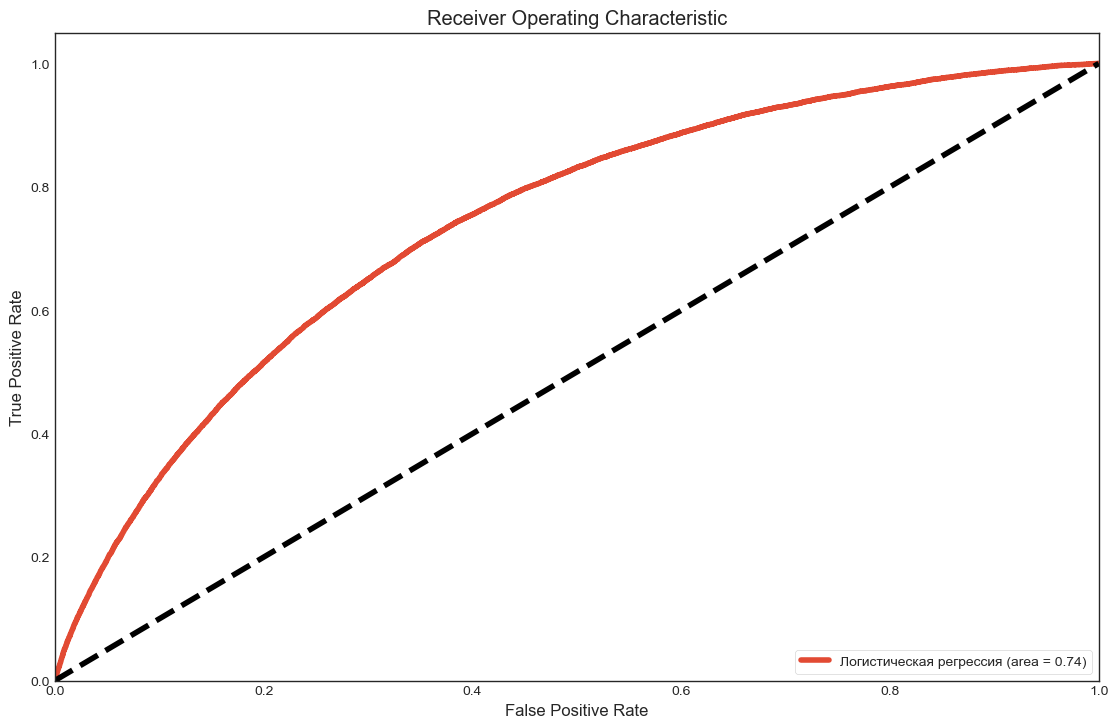

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели логистической регрессии
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# 5. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 6. Расчёт метрик качества
print("Классификационный отчет:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Логистическая регрессия (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Weighted Gradient Boosting - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.98      0.67      0.79    578646
         1.0       0.07      0.70      0.13     21354

    accuracy                           0.67    600000
   macro avg       0.53      0.68      0.46    600000
weighted avg       0.95      0.67      0.77    600000

Weighted Gradient Boosting - Confusion Matrix:
 [[385481 193165]
 [  6407  14947]]
Weighted Gradient Boosting - ROC AUC: 0.7485986875114412


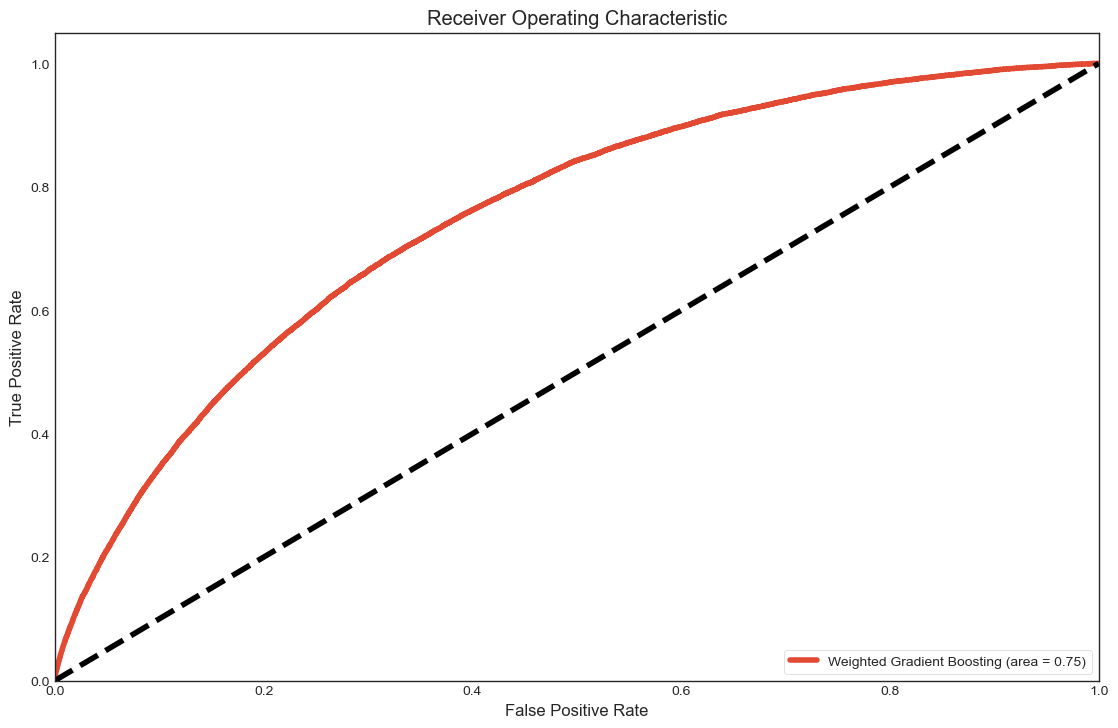

In [47]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
weight = 28
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация параметров модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'scale_pos_weight': weight # установка веса класса
}

# Преобразование данных в формат DMatrix для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Обучение модели
bst = xgb.train(params, dtrain, num_boost_round=100)

# Предсказание на тестовых данных
y_pred_xgb = bst.predict(dtest)

# Преобразование вероятностей в бинарные предсказания
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

# Расчёт метрик качества
print("Weighted Gradient Boosting - Классификационный отчет:\n", classification_report(y_test, y_pred_binary))
print("Weighted Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("Weighted Gradient Boosting - ROC AUC:", roc_auc_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='Weighted Gradient Boosting (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [48]:
print_system_info()

Занято ОЗУ: 13.49 GB
Свободно ОЗУ: 2.29 GB
Нагрузка на процессор: 34.10%


ОЗУ загружено. Освоодим для дальнейшей работы.

In [58]:
# Получение всех датафреймов в текущем пространстве имен
dataframes = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame)}

for name, df in dataframes.items():
    memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Преобразование в мегабайты
    print("Датафрейм '{}' использует {:.2f} MB памяти".format(name, memory_usage))

Датафрейм 'df_mean' использует 524.52 MB памяти
Датафрейм 'X_train' использует 4650.88 MB памяти
Датафрейм 'X_test' использует 1162.72 MB памяти
Датафрейм 'df' использует 1162.72 MB памяти


In [59]:
# Освобождение памяти, занятой переменными
del df 


Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 94s 980us/step - accuracy: 0.9644 - loss: 0.1502 - val_accuracy: 0.9646 - val_loss: 0.1415
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 56s 934us/step - accuracy: 0.9645 - loss: 0.1439 - val_accuracy: 0.9646 - val_loss: 0.1415
Epoch 3/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 57s 950us/step - accuracy: 0.9645 - loss: 0.1437 - val_accuracy: 0.9646 - val_loss: 0.1411
Epoch 4/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 81s 941us/step - accuracy: 0.9646 - loss: 0.1435 - val_accuracy: 0.9646 - val_loss: 0.1431
Epoch 5/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 83s 951us/step - accuracy: 0.9645 - loss: 0.1437 - val_accuracy: 0.9646 - val_loss: 0.1410
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 11s 594us/step - accuracy: 0.9643 - loss: 0.1421
Loss: 0.14175084233283997
Accuracy: 0.9644100069999695
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 12s 639us/step
Нейронная сеть - Классификационный отчет:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    

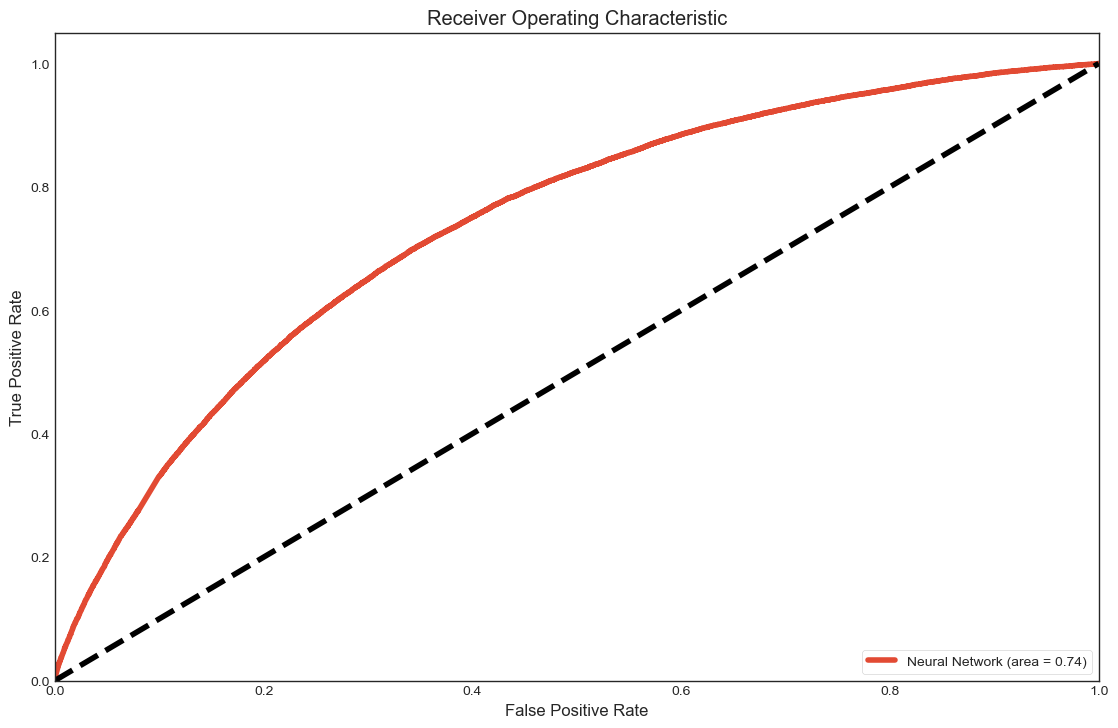

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Определение архитектуры нейронной сети
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Оценка качества модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Предсказание на тестовых данных
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Расчёт метрик качества
print("Нейронная сеть - Классификационный отчет:\n", classification_report(y_test, y_pred_nn))
print("Нейронная сеть - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# ROC AUC
roc_auc_nn = roc_auc_score(y_test, model.predict(X_test))
print("Нейронная сеть - ROC AUC:", roc_auc_nn)

# ROC Curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Нейронная сеть на всем датафреймк из 3 млн показывает значение хуже чем отдельно каждый из 12 датафреймов

<a id="ch0011"></a>
## 11. Сборка окончательного датасета и обучение модели - XGBClassifier

Я остановил свой выбор на модели XGBoost (XGBClassifier).  Мое решение обосновано несколькими ключевыми преимуществами, которые делают её особенно полезной для задач классификации в условиях сложных и высокоразмерных данных:

1. **Высокая производительность**:
   XGBoost часто превосходит другие алгоритмы машинного обучения в соревнованиях и реальных задачах, показывая высокую точность и эффективность. Это достигается благодаря мощным возможностям обработки данных и оптимизации.

2. **Обработка несбалансированных данных**:
   XGBoost поддерживает параметр `scale_pos_weight`, который позволяет корректировать веса классов, что делает его подходящим для задач с несбалансированными классами. Это важно для задач кредитного скоринга, где случаи дефолтов могут быть значительно реже, чем случаи выполнения обязательств.

3. **Контроль над переобучением**:
   XGBoost включает в себя различные регуляризационные параметры (L1 и L2), которые помогают контролировать переобучение. Это особенно полезно в случае работы с высокоразмерными данными и сложными моделями.

4. **Гибкость и настройки**:
   XGBoost предоставляет множество гиперпараметров, которые можно настроить для улучшения производительности модели, включая глубину деревьев, скорость обучения, долю случайных выборок и многие другие.

5. **Обработка пропусков и выбросов**:
   XGBoost эффективно обрабатывает пропущенные значения и выбросы в данных, что упрощает предварительную обработку данных и делает модель более устойчивой к неидеальным данным.

6. **Поддержка параллельных вычислений**:
   XGBoost поддерживает параллельные вычисления, что значительно ускоряет процесс обучения, особенно на больших наборах данных.

7. **Интерпретируемость**:
   XGBoost предоставляет важные функции для оценки значимости признаков, что позволяет лучше понимать, какие признаки оказывают наибольшее влияние на предсказания модели. Это важно для аналитиков, которым необходимо объяснять результаты моделирования.

Эти преимущества делают XGBoost (XGBClassifier) предпочтительным выбором для задач, где требуется высокая точность, устойчивость к несбалансированным классам и возможность детальной настройки и оптимизации модели.

In [61]:
import os
import pandas as pd
from tqdm import tqdm
import time
import gc



# Путь к папке с файлами
folder_path = 'train_data/'
target_file_path = "train_target.csv"

# Список для хранения загруженных данных
all_data = []

# Получим список файлов для отслеживания прогресса
file_list = [f for f in os.listdir(folder_path) if f.endswith('.pq')]

# Используем цикл для обработки файлов без общего бара прогресса
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    
    # Начало измерения времени обработки файла
    start_time = time.time()
    
    # Создаем бар для обработки текущего файла
    with tqdm(total=100, desc=f"Файл {file_name}", unit="%", colour='green', bar_format='{desc}: {percentage:3.0f}%|{bar:50}{r_bar}') as pbar_file:
        
        # Шаг 1: Чтение файла (обновление бара на 33%)
        merged_data = read_file(file_path)  # Предполагаемая функция read_file для чтения файла
        for _ in range(25):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        
        # Шаг 2: Добавление столбца с таргетом (обновление бара на 33%)
        merged_data_with_target = add_target_column(merged_data, target_file_path)  # Предполагаемая функция add_target_column для добавления столбца с таргетом
        for _ in range(25):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        
        # Шаг 3: Преобразование выбранных столбцов в тип данных int8 (обновление бара на оставшиеся 34%)
        columns_to_convert = merged_data_with_target.columns.drop('id')
        merged_data_with_target[columns_to_convert] = merged_data_with_target[columns_to_convert].astype('int8')
        for _ in range(25):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)


        
        # Шаг 4: Группировка по id и вычесление среднего (обновление бара на оставшиеся 34%)
        # Среднее
        df_mean = merged_data_with_target.groupby('id').median().reset_index()
        
        for _ in range(25):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        
        # Добавление обработанных данных в список
        all_data.append(df_mean)
        
        # Очистка промежуточных данных для освобождения ОЗУ
        del merged_data
        del merged_data_with_target
        gc.collect()
        
        # Завершение измерения времени обработки файла
        end_time = time.time()
        
        # Вывод времени выполнения текущего файла
        tqdm.write(f"Файл {file_name} обработан. Время выполнения: {end_time - start_time:.2f} секунд.")

# Объединение всех обработанных данных в один DataFrame
merged_data_int8 = pd.concat(all_data, ignore_index=True)

# Очистка списка all_data для освобождения ОЗУ
del all_data
gc.collect()

# Создание копии DataFrame для дальнейшей обработки
#merged_data_int8 = merged_data_all.copy()

# Вывод сообщения о завершении обработки
print("Обработка всех файлов завершена.")


Файл train_data_0.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.05%/s]


Файл train_data_0.pq обработан. Время выполнения: 9.95 секунд.


Файл train_data_1.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.03%/s]


Файл train_data_1.pq обработан. Время выполнения: 9.97 секунд.


Файл train_data_10.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.68%/s]


Файл train_data_10.pq обработан. Время выполнения: 10.32 секунд.


Файл train_data_11.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.26%/s]


Файл train_data_11.pq обработан. Время выполнения: 10.80 секунд.


Файл train_data_2.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.18%/s]


Файл train_data_2.pq обработан. Время выполнения: 9.82 секунд.


Файл train_data_3.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.94%/s]


Файл train_data_3.pq обработан. Время выполнения: 10.06 секунд.


Файл train_data_4.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.17%/s]


Файл train_data_4.pq обработан. Время выполнения: 9.83 секунд.


Файл train_data_5.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.82%/s]


Файл train_data_5.pq обработан. Время выполнения: 10.19 секунд.


Файл train_data_6.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.93%/s]


Файл train_data_6.pq обработан. Время выполнения: 10.07 секунд.


Файл train_data_7.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.78%/s]


Файл train_data_7.pq обработан. Время выполнения: 10.23 секунд.


Файл train_data_8.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.70%/s]


Файл train_data_8.pq обработан. Время выполнения: 10.30 секунд.


Файл train_data_9.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.47%/s]


Файл train_data_9.pq обработан. Время выполнения: 10.56 секунд.
Обработка всех файлов завершена.


Загрузим из паркета все данные, съагрегируем по id, изменим тип данных на int8 

In [63]:
import os
import pandas as pd
from tqdm import tqdm
import time
import gc

# Путь к папке с файлами
folder_path = 'train_data/'

# Список для хранения загруженных данных
all_data = []

# Получим список файлов для отслеживания прогресса
file_list = [f for f in os.listdir(folder_path) if f.endswith('.pq')]

# Используем цикл для обработки файлов без общего бара прогресса
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    
    # Начало измерения времени обработки файла
    start_time = time.time()
    
    # Создаем бар для обработки текущего файла
    with tqdm(total=100, desc=f"Файл {file_name}", unit="%", colour='green', bar_format='{desc}: {percentage:3.0f}%|{bar:50}{r_bar}') as pbar_file:
        
        # Шаг 1: Чтение файла (обновление бара на 33%)
        merged_data = read_file(file_path)  # Предполагаемая функция read_file для чтения файла
        for _ in range(33):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        
        # Шаг 2: Добавление столбца с таргетом (обновление бара на 33%)
        merged_data_with_target = add_target_column(merged_data, target_file_path)  # Предполагаемая функция add_target_column для добавления столбца с таргетом
        for _ in range(33):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)
        
        # Шаг 3: Преобразование выбранных столбцов в тип данных int8 (обновление бара на оставшиеся 34%)
        columns_to_convert = merged_data_with_target.columns.drop('id')
        merged_data_with_target[columns_to_convert] = merged_data_with_target[columns_to_convert].astype('int8')
        for _ in range(34):
            time.sleep(0.05)  # Искусственная задержка для демонстрации прогресса
            pbar_file.update(1)

       
        
        # Добавление обработанных данных в список
        all_data.append(merged_data_with_target)
        
        # Очистка промежуточных данных для освобождения ОЗУ
        del merged_data
        del merged_data_with_target
        gc.collect()
        
        # Завершение измерения времени обработки файла
        end_time = time.time()
        
        # Вывод времени выполнения текущего файла
        tqdm.write(f"Файл {file_name} обработан. Время выполнения: {end_time - start_time:.2f} секунд.")

# Объединение всех обработанных данных в один DataFrame
merged_data_all = pd.concat(all_data, ignore_index=True)

# Очистка списка all_data для освобождения ОЗУ
del all_data
gc.collect()

# Создание копии DataFrame для дальнейшей обработки
#merged_data_int8 = merged_data_all.copy()

# Вывод сообщения о завершении обработки
print("Обработка всех файлов завершена.")


Файл train_data_0.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.38%/s]


Файл train_data_0.pq обработан. Время выполнения: 6.95 секунд.


Файл train_data_1.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.15%/s]


Файл train_data_1.pq обработан. Время выполнения: 7.07 секунд.


Файл train_data_10.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.76%/s]


Файл train_data_10.pq обработан. Время выполнения: 7.27 секунд.


Файл train_data_11.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.60%/s]


Файл train_data_11.pq обработан. Время выполнения: 7.35 секунд.


Файл train_data_2.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.94%/s]


Файл train_data_2.pq обработан. Время выполнения: 7.17 секунд.


Файл train_data_3.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.21%/s]


Файл train_data_3.pq обработан. Время выполнения: 7.57 секунд.


Файл train_data_4.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.89%/s]


Файл train_data_4.pq обработан. Время выполнения: 7.20 секунд.


Файл train_data_5.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63%/s]


Файл train_data_5.pq обработан. Время выполнения: 8.60 секунд.


Файл train_data_6.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.66%/s]


Файл train_data_6.pq обработан. Время выполнения: 7.38 секунд.


Файл train_data_7.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.68%/s]


Файл train_data_7.pq обработан. Время выполнения: 7.88 секунд.


Файл train_data_8.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.33%/s]


Файл train_data_8.pq обработан. Время выполнения: 7.51 секунд.


Файл train_data_9.pq: 100%|██████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.98%/s]


Файл train_data_9.pq обработан. Время выполнения: 10.01 секунд.
Обработка всех файлов завершена.


In [65]:
# Случайный выбор одной строки для каждого уникального значения id, где flag=1
flag_1_data = merged_data_all[merged_data_all['flag'] == 1]
unique_flag_1_data = flag_1_data.groupby('id').sample(n=1, random_state=42)

In [68]:
# Используем pd.concat для склеивания DataFrame
combined_data = pd.concat([merged_data_int8, unique_flag_1_data], ignore_index=True)

# Перемешиваем строки результирующего DataFrame
shuffled_data = combined_data.sample(frac=1).reset_index(drop=True)

In [70]:
# Отфильтруем строки, где flag == 1
flag_1_data = shuffled_data[shuffled_data['flag'] == 1]

# Удалим дубликаты на основании столбца 'id' случайным образом
flag_1_data = flag_1_data.drop_duplicates(subset=['id'], keep='first')

# Отфильтруем строки, где flag != 1
non_flag_1_data = shuffled_data[shuffled_data['flag'] != 1]

# Объединим обратно
cleaned_data = pd.concat([flag_1_data, non_flag_1_data], ignore_index=True)

In [71]:
cleaned_data.flag.value_counts()

flag
0.0    2893558
1.0     106442
Name: count, dtype: int64

In [72]:
# 1. Удаление столбцов 'id' и 'rn'
df = cleaned_data.drop(['id', 'rn'], axis=1)

# 2. Разделение данных на признаки и целевую переменную
X = df.drop('flag', axis=1)
y = df['flag']

In [73]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Классификационный отчет для XGBoost:
               precision    recall  f1-score   support

         0.0       0.98      0.88      0.93    579018
         1.0       0.16      0.59      0.25     20982

    accuracy                           0.87    600000
   macro avg       0.57      0.74      0.59    600000
weighted avg       0.95      0.87      0.91    600000

Confusion Matrix для XGBoost:
 [[511700  67318]
 [  8563  12419]]
ROC AUC для XGBoost: 0.8099159346212763


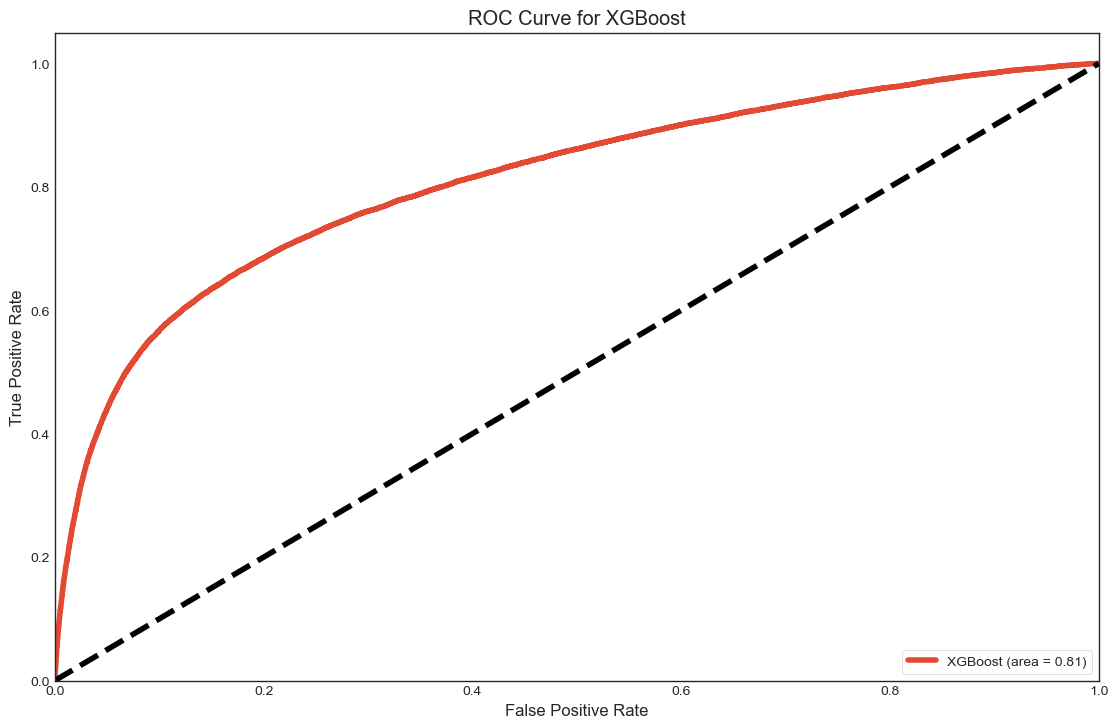

In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


positive_class_weight = 18

# Создание экземпляра модели XGBClassifier с установленным весом положительного класса
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=positive_class_weight)

# Обучение модели
xgb_model.fit(X_train, y_train)


# Предсказания на тестовом наборе
y_pred_xgb = xgb_model.predict(X_test)

# Вероятности для расчета ROC AUC
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Классификационный отчет
print("Классификационный отчет для XGBoost:\n", classification_report(y_test, y_pred_xgb))

# Матрица ошибок
print("Confusion Matrix для XGBoost:\n", confusion_matrix(y_test, y_pred_xgb))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print("ROC AUC для XGBoost:", roc_auc_xgb)

# Построение ROC-кривой
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # диагональная линия для сравнения
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

<a id="ch0012"></a>
## 12. Комбинирование признаков для улучшения метрик

In [77]:
# Бинаризированные признаки:

binary_columns = [col for col in merged_data_all.columns if merged_data_all[col].nunique() == 2]
# Удаляем столбец 'flag' из списка binary_columns
binary_columns.remove('flag')
binary_columns

['pre_loans_total_overdue',
 'is_zero_loans5',
 'is_zero_loans530',
 'is_zero_loans3060',
 'is_zero_loans6090',
 'is_zero_loans90',
 'is_zero_util',
 'is_zero_over2limit',
 'is_zero_maxover2limit',
 'pclose_flag',
 'fclose_flag']

In [78]:
len(binary_columns)

11

In [79]:
# Создаем список столбцов, которые нужно исключить
columns_to_exclude = ['flag', 'id', 'rn'] + binary_columns

# Получаем список столбцов, которые остаются после исключения
categorical_features = merged_data_all.columns.difference(columns_to_exclude).tolist()
len(categorical_features)

48

In [80]:
categorical_features

['enc_loans_account_cur',
 'enc_loans_account_holder_type',
 'enc_loans_credit_status',
 'enc_loans_credit_type',
 'enc_paym_0',
 'enc_paym_1',
 'enc_paym_10',
 'enc_paym_11',
 'enc_paym_12',
 'enc_paym_13',
 'enc_paym_14',
 'enc_paym_15',
 'enc_paym_16',
 'enc_paym_17',
 'enc_paym_18',
 'enc_paym_19',
 'enc_paym_2',
 'enc_paym_20',
 'enc_paym_21',
 'enc_paym_22',
 'enc_paym_23',
 'enc_paym_24',
 'enc_paym_3',
 'enc_paym_4',
 'enc_paym_5',
 'enc_paym_6',
 'enc_paym_7',
 'enc_paym_8',
 'enc_paym_9',
 'pre_fterm',
 'pre_loans3060',
 'pre_loans5',
 'pre_loans530',
 'pre_loans6090',
 'pre_loans90',
 'pre_loans_credit_cost_rate',
 'pre_loans_credit_limit',
 'pre_loans_max_overdue_sum',
 'pre_loans_next_pay_summ',
 'pre_loans_outstanding',
 'pre_maxover2limit',
 'pre_over2limit',
 'pre_pterm',
 'pre_since_confirmed',
 'pre_since_opened',
 'pre_till_fclose',
 'pre_till_pclose',
 'pre_util']

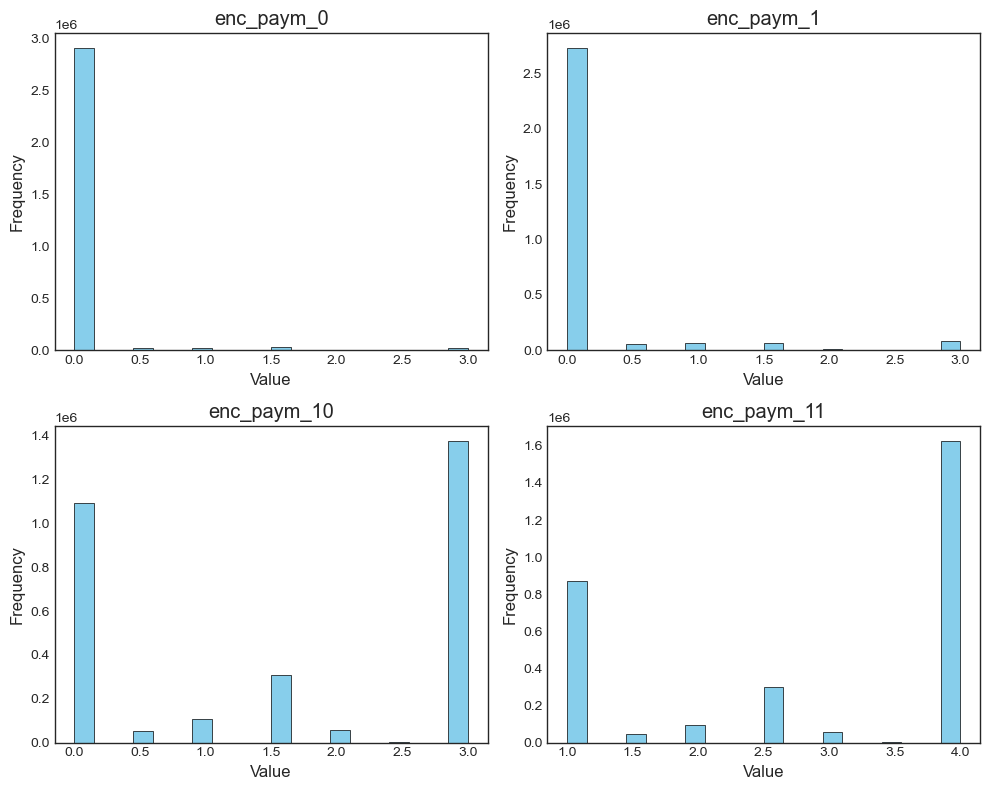

In [81]:
import matplotlib.pyplot as plt

# Список столбцов для построения графиков
enc_paym_columns = ['enc_paym_0', 'enc_paym_1', 'enc_paym_10', 'enc_paym_11']

# Создаем подграфики
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Построение гистограмм для каждого столбца
for i, column in enumerate(enc_paym_columns):
    ax = axes[i // 2, i % 2]  # Выбор подграфика
    ax.hist(merged_data_int8[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Размещение подписей осей и заголовка
plt.tight_layout()

# Показываем графики
plt.show()



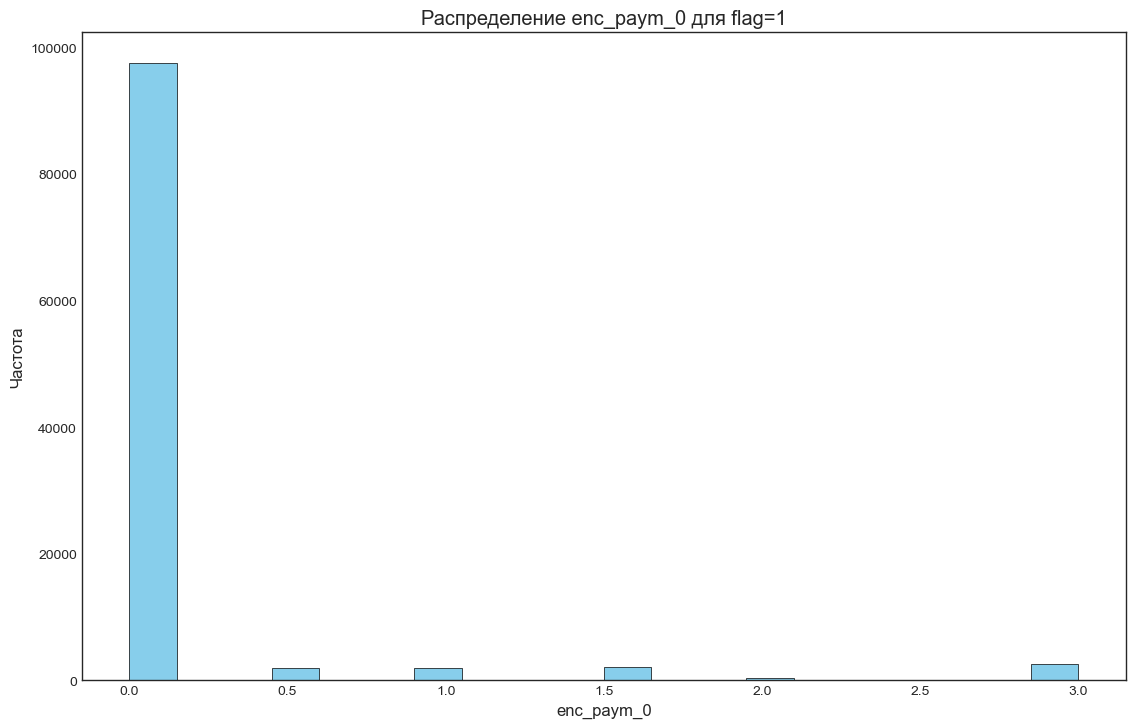

In [82]:
import matplotlib.pyplot as plt

# Фильтрация строк, где flag равен 1
flag_1_data = merged_data_int8[merged_data_int8['flag'] == 1]

# Построение гистограммы для столбца enc_paym_0
plt.hist(flag_1_data['enc_paym_0'], bins=20, color='skyblue', edgecolor='black')

# Добавление заголовка и подписей осей
plt.title('Распределение enc_paym_0 для flag=1')
plt.xlabel('enc_paym_0')
plt.ylabel('Частота')

# Показать график
plt.show()


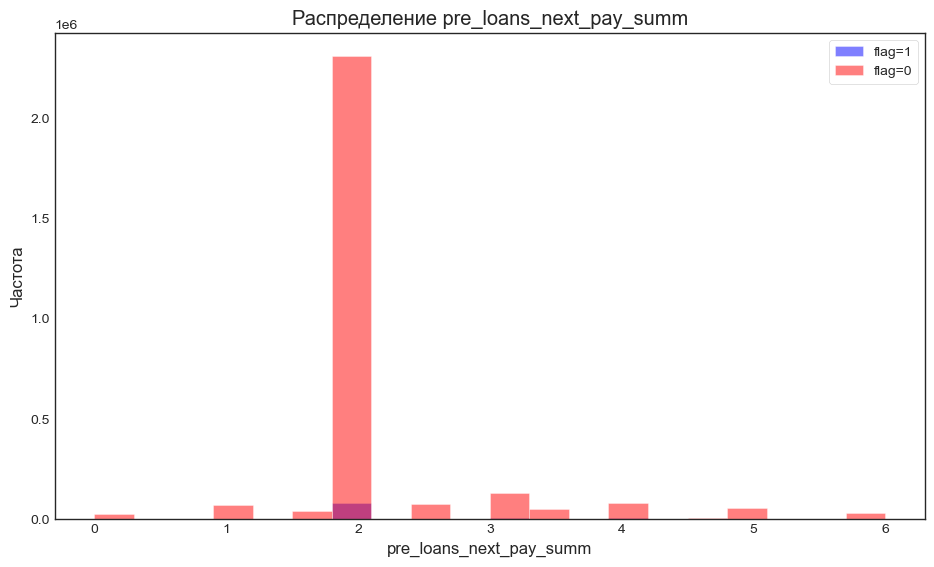

In [83]:
plot_distribution(merged_data_int8, 'pre_loans_next_pay_summ')

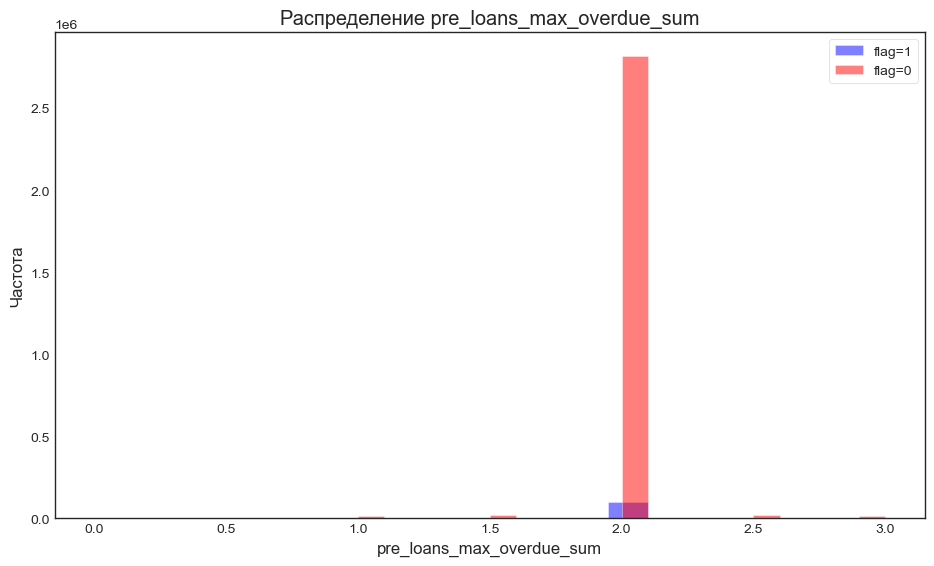

In [84]:
plot_distribution(merged_data_int8, 'pre_loans_max_overdue_sum')

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка важности признаков
feature_importance = model.coef_[0]

# Вывод важности признаков
for i, feature in enumerate(X.columns):
    print(f'{feature}: {feature_importance[i]}')

# Отбор важных признаков
selector = SelectFromModel(model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Обучение модели на отобранных признаках
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# Оценка качества модели на отобранных признаках
accuracy_selected = model_selected.score(X_test_selected, y_test)
print(f'Accuracy on selected features: {accuracy_selected}')


pre_since_opened: -0.000888462451556511
pre_since_confirmed: -0.0069354618543051895
pre_pterm: 0.01988214613770561
pre_fterm: -0.02835732666108693
pre_till_pclose: 0.03545345149412478
pre_till_fclose: -0.05974574381669695
pre_loans_credit_limit: 0.007605708483233216
pre_loans_next_pay_summ: 0.03865281647155223
pre_loans_outstanding: 0.034338933356322675
pre_loans_total_overdue: 0.000393161048838503
pre_loans_max_overdue_sum: 0.018732568140103566
pre_loans_credit_cost_rate: 0.04455509954631261
pre_loans5: -0.0816489667095693
pre_loans530: -0.06533041592215309
pre_loans3060: 0.06827430297972398
pre_loans6090: 0.04862558758380164
pre_loans90: 0.07634504016210364
is_zero_loans5: -0.8064459152749275
is_zero_loans530: -0.9850128598506934
is_zero_loans3060: -0.36543324353490947
is_zero_loans6090: -0.15398263079418784
is_zero_loans90: -0.09122547938389738
pre_util: -0.04249096726930144
pre_over2limit: 0.036548849012386954
pre_maxover2limit: -0.02122411211233783
is_zero_util: -0.177517091233141

In [86]:
from sklearn.metrics import roc_auc_score

# Получение вероятностей принадлежности классу 1 (flag=1)
y_pred_proba = model_selected.predict_proba(X_test_selected)[:, 1]

# Вычисление AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')


AUC-ROC: 0.6924893243803452


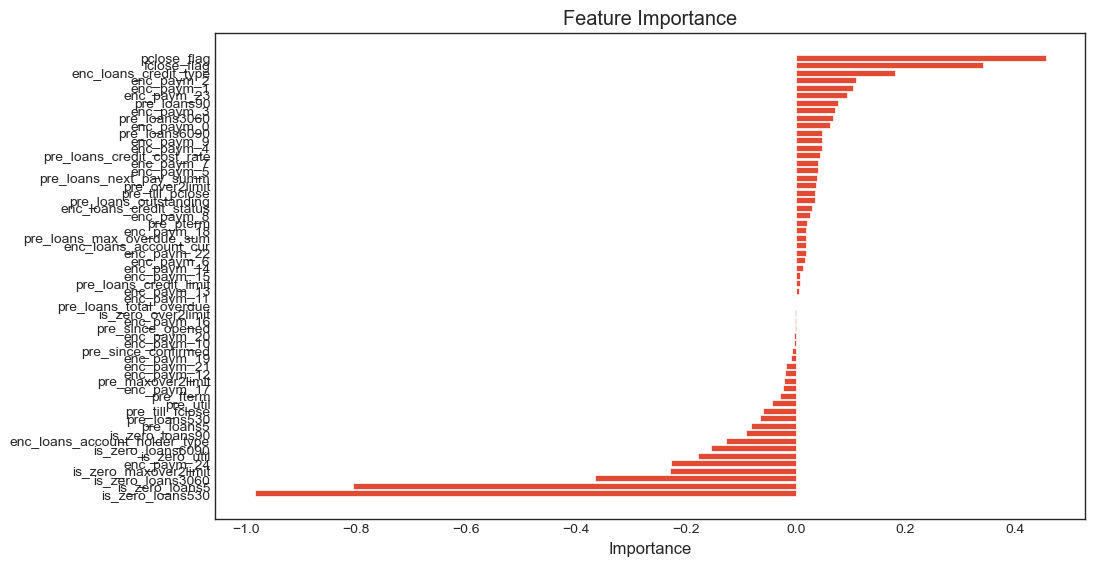

In [87]:
import matplotlib.pyplot as plt

# Сортировка признаков по их важности
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importance, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Инвертируем ось y для отображения признаков в порядке убывания важности
plt.show()


In [88]:
from sklearn.feature_selection import SelectKBest, f_classif

# Выбор 10 лучших признаков на основе анализа дисперсии (ANOVA)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Получение индексов выбранных признаков
selected_features_idx = selector.get_support(indices=True)

# Получение списка выбранных признаков
selected_features = X.columns[selected_features_idx]

# Обучение модели на выбранных признаках
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# Оценка качества модели на выбранных признаках
accuracy_selected = model_selected.score(X_test_selected, y_test)
print(f'Accuracy on selected features: {accuracy_selected}')

# Вывод списка выбранных признаков
print("Selected features:")
for feature in selected_features:
    print(feature)


Accuracy on selected features: 0.9649016666666667
Selected features:
is_zero_loans3060
pre_maxover2limit
is_zero_maxover2limit
enc_paym_0
enc_paym_1
enc_paym_2
enc_paym_3
enc_paym_4
enc_paym_5
enc_paym_6


In [89]:
from sklearn.metrics import roc_auc_score

# Получение вероятностей принадлежности классу 1 (flag=1)
y_pred_proba = model_selected.predict_proba(X_test_selected)[:, 1]

# Вычисление AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')


AUC-ROC: 0.6600884314149013


In [90]:
from sklearn.feature_selection import SelectKBest, f_classif

# Выбор 10 лучших признаков на основе анализа дисперсии (ANOVA)
selector = SelectKBest(score_func=f_classif, k=11)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Получение индексов выбранных признаков
selected_features_idx = selector.get_support(indices=True)

# Получение списка выбранных признаков
selected_features = X.columns[selected_features_idx]

# Обучение модели на выбранных признаках
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# Оценка качества модели на выбранных признаках
accuracy_selected = model_selected.score(X_test_selected, y_test)
print(f'Accuracy on selected features: {accuracy_selected}')

# Вывод списка выбранных признаков
print("Selected features:")
for feature in selected_features:
    print(feature)


Accuracy on selected features: 0.9649783333333334
Selected features:
is_zero_loans530
is_zero_loans3060
pre_maxover2limit
is_zero_maxover2limit
enc_paym_0
enc_paym_1
enc_paym_2
enc_paym_3
enc_paym_4
enc_paym_5
enc_paym_6


In [91]:
from sklearn.metrics import roc_auc_score

# Получение вероятностей принадлежности классу 1 (flag=1)
y_pred_proba = model_selected.predict_proba(X_test_selected)[:, 1]

# Вычисление AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')


AUC-ROC: 0.6693451545028091


In [92]:
sorted_features

Index(['pclose_flag', 'fclose_flag', 'enc_loans_credit_type', 'enc_paym_2',
       'enc_paym_1', 'enc_paym_23', 'pre_loans90', 'enc_paym_3',
       'pre_loans3060', 'enc_paym_0', 'pre_loans6090', 'enc_paym_9',
       'enc_paym_4', 'pre_loans_credit_cost_rate', 'enc_paym_7', 'enc_paym_5',
       'pre_loans_next_pay_summ', 'pre_over2limit', 'pre_till_pclose',
       'pre_loans_outstanding', 'enc_loans_credit_status', 'enc_paym_8',
       'pre_pterm', 'enc_paym_18', 'pre_loans_max_overdue_sum',
       'enc_loans_account_cur', 'enc_paym_22', 'enc_paym_6', 'enc_paym_14',
       'enc_paym_15', 'pre_loans_credit_limit', 'enc_paym_13', 'enc_paym_11',
       'pre_loans_total_overdue', 'is_zero_over2limit', 'enc_paym_16',
       'pre_since_opened', 'enc_paym_20', 'enc_paym_10', 'pre_since_confirmed',
       'enc_paym_19', 'enc_paym_21', 'enc_paym_12', 'pre_maxover2limit',
       'enc_paym_17', 'pre_fterm', 'pre_util', 'pre_till_fclose',
       'pre_loans530', 'pre_loans5', 'is_zero_loans90',
   

In [93]:
# Выводим наименование признака и его значение в порядке убывания важности
for feature, importance in zip(sorted_features, sorted_importance):
    print(f'{feature}: {importance}')


pclose_flag: 0.4549154143608686
fclose_flag: 0.34094418670449267
enc_loans_credit_type: 0.18125459771544164
enc_paym_2: 0.10898015289464676
enc_paym_1: 0.10371639448323418
enc_paym_23: 0.09321912137514976
pre_loans90: 0.07634504016210364
enc_paym_3: 0.07125343975151785
pre_loans3060: 0.06827430297972398
enc_paym_0: 0.06328430440759326
pre_loans6090: 0.04862558758380164
enc_paym_9: 0.04793088388595514
enc_paym_4: 0.04749844845711048
pre_loans_credit_cost_rate: 0.04455509954631261
enc_paym_7: 0.04128165812923947
enc_paym_5: 0.040229002378171175
pre_loans_next_pay_summ: 0.03865281647155223
pre_over2limit: 0.036548849012386954
pre_till_pclose: 0.03545345149412478
pre_loans_outstanding: 0.034338933356322675
enc_loans_credit_status: 0.03009767889533476
enc_paym_8: 0.025295800517347547
pre_pterm: 0.01988214613770561
enc_paym_18: 0.01881813275296495
pre_loans_max_overdue_sum: 0.018732568140103566
enc_loans_account_cur: 0.01828658391030579
enc_paym_22: 0.017938963488379544
enc_paym_6: 0.0171007

In [94]:
# Выбор признака для обучения модели
X_one_feature = X[['pre_loans530', 'pre_util', 'pre_maxover2limit', 'pre_loans_credit_limit']]

# Разделение данных на обучающий и тестовый наборы
X_train_one_feature, X_test_one_feature, y_train, y_test = train_test_split(X_one_feature, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели логистической регрессии на одном признаке
model_one_feature = LogisticRegression()
model_one_feature.fit(X_train_one_feature, y_train)

# Оценка качества модели
accuracy_one_feature = model_one_feature.score(X_test_one_feature, y_test)
print(f'Accuracy on one feature (pre_loans530): {accuracy_one_feature}')

# Вывод коэффициентов модели
print(f'Coefficient for pre_loans530: {model_one_feature.coef_[0][0]}')


Accuracy on one feature (pre_loans530): 0.96499
Coefficient for pre_loans530: -0.13811166502735397


In [95]:
from sklearn.metrics import roc_auc_score

# Вычисление ROC AUC
y_pred_proba_one_feature = model_one_feature.predict_proba(X_test_one_feature)[:, 1]
roc_auc_one_feature = roc_auc_score(y_test, y_pred_proba_one_feature)
print(f'ROC AUC on one feature (pre_loans530): {roc_auc_one_feature}')


ROC AUC on one feature (pre_loans530): 0.5882730783699008


In [96]:
from sklearn.metrics import roc_auc_score

# Список для хранения значений ROC AUC для каждого признака
roc_auc_list = []

# Перебор признаков и вычисление ROC AUC для каждого
for feature in sorted_features:
    X_train_one_feature = X_train[[feature]]
    X_test_one_feature = X_test[[feature]]
    
    # Обучение модели логистической регрессии на одном признаке
    model_one_feature = LogisticRegression()
    model_one_feature.fit(X_train_one_feature, y_train)
    
    # Предсказание вероятности положительного класса для тестового набора данных
    y_pred_proba_one_feature = model_one_feature.predict_proba(X_test_one_feature)[:, 1]
    
    # Вычисление ROC AUC для данного признака и добавление в список
    roc_auc = roc_auc_score(y_test, y_pred_proba_one_feature)
    roc_auc_list.append((feature, roc_auc))

# Сортировка списка по ROC AUC в порядке убывания
roc_auc_list_sorted = sorted(roc_auc_list, key=lambda x: x[1], reverse=True)

# Вывод списка признаков и их ROC AUC в порядке убывания
for feature, roc_auc in roc_auc_list_sorted:
    print(f'{feature}: ROC AUC = {roc_auc}')


enc_paym_5: ROC AUC = 0.6026837517783039
enc_paym_3: ROC AUC = 0.6016499548137787
enc_paym_4: ROC AUC = 0.6014457927799258
enc_paym_6: ROC AUC = 0.5967113027518136
enc_paym_2: ROC AUC = 0.5918809959694844
enc_paym_7: ROC AUC = 0.5879668401137724
enc_paym_8: ROC AUC = 0.5779810679012967
enc_paym_1: ROC AUC = 0.5769371585037957
is_zero_util: ROC AUC = 0.5745097578871108
enc_paym_9: ROC AUC = 0.5674442416164759
pre_util: ROC AUC = 0.5591915783692089
enc_loans_credit_status: ROC AUC = 0.5568900069217768
is_zero_loans530: ROC AUC = 0.5538723016574121
enc_paym_10: ROC AUC = 0.5533978638823704
fclose_flag: ROC AUC = 0.5435823605847848
is_zero_maxover2limit: ROC AUC = 0.5416288875346786
enc_paym_11: ROC AUC = 0.5401602520835471
enc_paym_0: ROC AUC = 0.5394373197810323
pre_maxover2limit: ROC AUC = 0.5315598463954755
pclose_flag: ROC AUC = 0.53091600545897
is_zero_loans3060: ROC AUC = 0.5274282373635026
enc_paym_12: ROC AUC = 0.5262218493914933
is_zero_loans5: ROC AUC = 0.5242378586977405
pre_lo

In [97]:
sorted_features

Index(['pclose_flag', 'fclose_flag', 'enc_loans_credit_type', 'enc_paym_2',
       'enc_paym_1', 'enc_paym_23', 'pre_loans90', 'enc_paym_3',
       'pre_loans3060', 'enc_paym_0', 'pre_loans6090', 'enc_paym_9',
       'enc_paym_4', 'pre_loans_credit_cost_rate', 'enc_paym_7', 'enc_paym_5',
       'pre_loans_next_pay_summ', 'pre_over2limit', 'pre_till_pclose',
       'pre_loans_outstanding', 'enc_loans_credit_status', 'enc_paym_8',
       'pre_pterm', 'enc_paym_18', 'pre_loans_max_overdue_sum',
       'enc_loans_account_cur', 'enc_paym_22', 'enc_paym_6', 'enc_paym_14',
       'enc_paym_15', 'pre_loans_credit_limit', 'enc_paym_13', 'enc_paym_11',
       'pre_loans_total_overdue', 'is_zero_over2limit', 'enc_paym_16',
       'pre_since_opened', 'enc_paym_20', 'enc_paym_10', 'pre_since_confirmed',
       'enc_paym_19', 'enc_paym_21', 'enc_paym_12', 'pre_maxover2limit',
       'enc_paym_17', 'pre_fterm', 'pre_util', 'pre_till_fclose',
       'pre_loans530', 'pre_loans5', 'is_zero_loans90',
   

In [99]:
from sklearn.metrics import roc_auc_score

# Вычисление ROC AUC
y_pred_proba_one_feature = model_one_feature.predict_proba(X_test_one_feature)[:, 1]
roc_auc_one_feature = roc_auc_score(y_test, y_pred_proba_one_feature)
print(f'ROC AUC on one feature (pre_loans530): {roc_auc_one_feature}')


ROC AUC on one feature (pre_loans530): 0.5538723016574121


Попробую различные комбинации признаков для улучшения модели

In [100]:
from itertools import combinations

# Получение первых 10 признаков
top_10_features = [feature for feature, _ in roc_auc_list_sorted[:7]]

# Перебор всех возможных комбинаций из первых 10 признаков
best_auc = 0
best_combination = None

for r in range(1, len(top_10_features) + 1):
    for combination in combinations(top_10_features, r):
        # Используем только выбранные признаки для обучения модели
        X_train_combination = X_train[list(combination)]
        X_test_combination = X_test[list(combination)]
        
        # Обучение модели логистической регрессии на выбранной комбинации признаков
        model_combination = LogisticRegression()
        model_combination.fit(X_train_combination, y_train)
        
        # Предсказание вероятности положительного класса для тестового набора данных
        y_pred_proba_combination = model_combination.predict_proba(X_test_combination)[:, 1]
        
        # Вычисление ROC AUC для данной комбинации признаков
        roc_auc_combination = roc_auc_score(y_test, y_pred_proba_combination)
        
        # Обновление лучшей комбинации, если полученный ROC AUC лучше предыдущего
        if roc_auc_combination > best_auc:
            best_auc = roc_auc_combination
            best_combination = combination

# Вывод лучшей комбинации и ее ROC AUC
print(f'Best combination: {best_combination}')
print(f'ROC AUC for best combination: {best_auc}')


Best combination: ('enc_paym_5', 'enc_paym_3', 'enc_paym_4', 'enc_paym_6', 'enc_paym_2', 'enc_paym_7', 'enc_paym_8')
ROC AUC for best combination: 0.632078152377317


In [102]:
# Выбор признака для обучения модели
X_one_feature = X

# Разделение данных на обучающий и тестовый наборы
X_train_one_feature, X_test_one_feature, y_train, y_test = train_test_split(X_one_feature, y, test_size=0.2, random_state=42)


import xgboost as xgb

# Инициализация и обучение модели градиентного бустинга
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_one_feature, y_train)

# Оценка качества модели
accuracy_xgb = model_xgb.score(X_test_one_feature, y_test)
print(f'Accuracy with XGBoost: {accuracy_xgb}')

# Предсказание вероятностей и вычисление ROC AUC
y_pred_proba_xgb = model_xgb.predict_proba(X_test_one_feature)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'ROC AUC with XGBoost: {roc_auc_xgb}')


Accuracy with XGBoost: 0.9651516666666666
ROC AUC with XGBoost: 0.8080882024612301


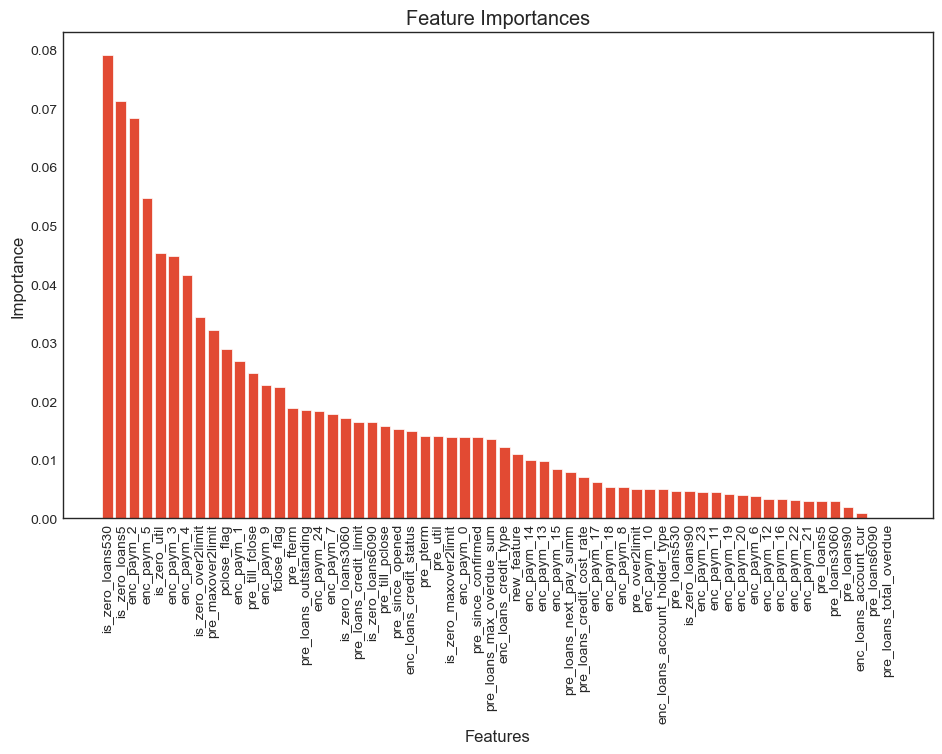

In [103]:
import matplotlib.pyplot as plt

# Получение значимостей признаков
feature_importances = model_xgb.feature_importances_

# Получение индексов признаков в порядке убывания значимости
sorted_indices = feature_importances.argsort()[::-1]

# Получение названий признаков в порядке убывания значимости
sorted_features = X.columns[sorted_indices]

# Получение значимостей признаков в порядке убывания
sorted_importances = feature_importances[sorted_indices]

# Построение графика значимостей признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


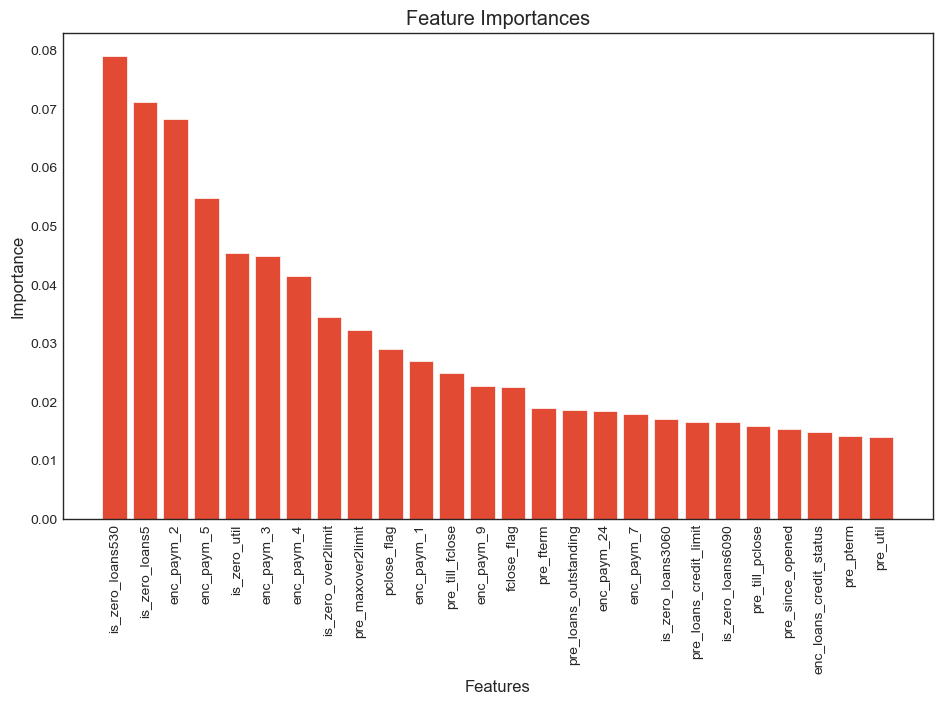

In [104]:
import matplotlib.pyplot as plt

# Установка порога значимости
threshold = 0.014

# Получение значимостей признаков
feature_importances = model_xgb.feature_importances_

# Создание DataFrame для удобства сортировки
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Фильтрация признаков с важностью больше порога
significant_features = importance_df[importance_df['Importance'] > threshold]

# Сортировка по убыванию значимости
significant_features = significant_features.sort_values(by='Importance', ascending=False)

# Построение графика значимостей признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(significant_features)), significant_features['Importance'], align='center')
plt.xticks(range(len(significant_features)), significant_features['Feature'], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [105]:
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1
)


In [106]:
significant_features

Feature  Importance
18         is_zero_loans530    0.079037
17           is_zero_loans5    0.071183
30               enc_paym_2    0.068333
33               enc_paym_5    0.054712
25             is_zero_util    0.045303
31               enc_paym_3    0.044782
32               enc_paym_4    0.041480
26       is_zero_over2limit    0.034423
24        pre_maxover2limit    0.032204
57              pclose_flag    0.028927
29               enc_paym_1    0.026934
5           pre_till_fclose    0.024846
37               enc_paym_9    0.022709
58              fclose_flag    0.022433
3                 pre_fterm    0.018854
8     pre_loans_outstanding    0.018570
52              enc_paym_24    0.018395
35               enc_paym_7    0.017862
19        is_zero_loans3060    0.017103
6    pre_loans_credit_limit    0.016518
20        is_zero_loans6090    0.016433
4           pre_till_pclose    0.015766
0          pre_since_opened    0.015282
54  enc_loans_credit_status    0.014885
2                 pre_pterm    0.014097
22                 pre_util    0.014010

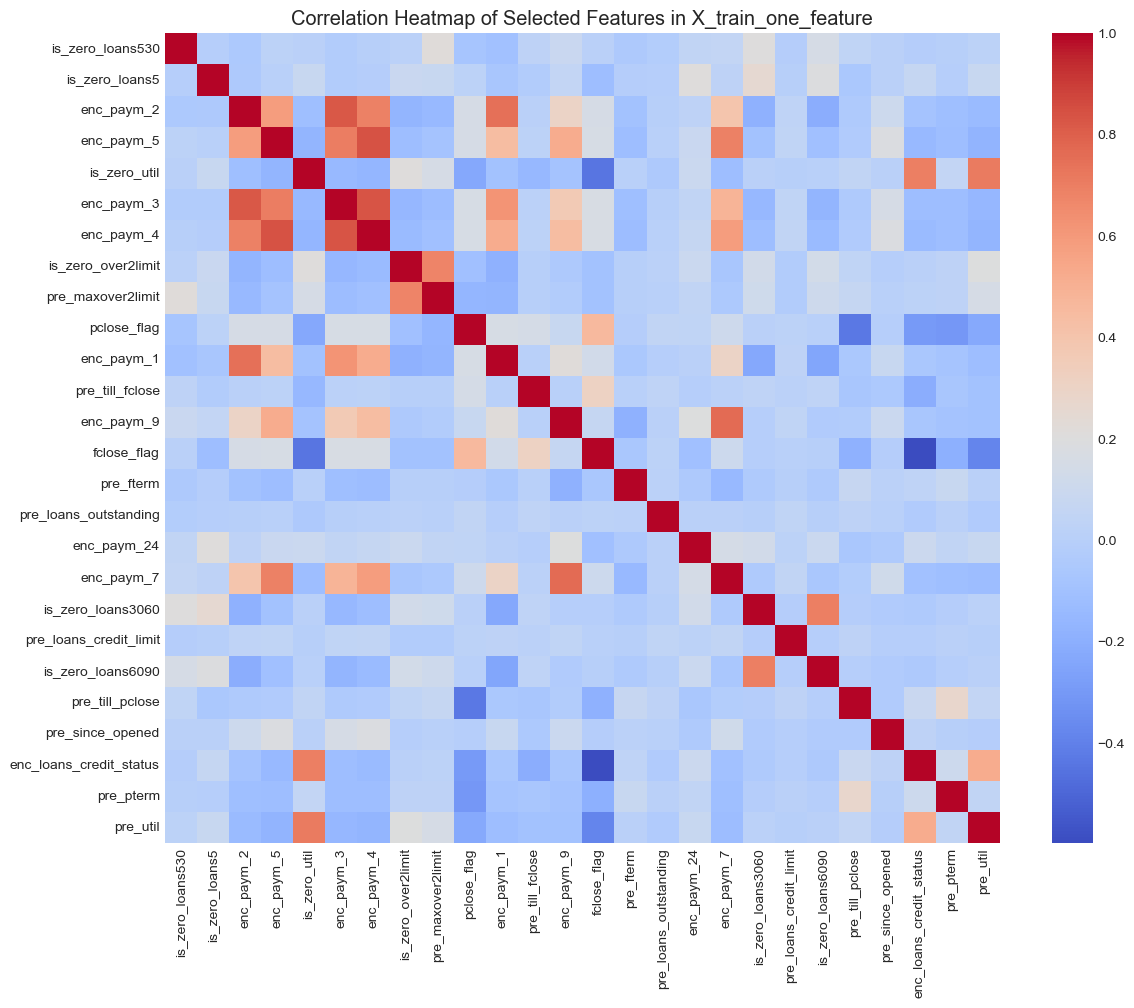

In [108]:
# Получение только признаков из significant_features
selected_features = significant_features['Feature']

# Вычисление корреляционной матрицы только для выбранных признаков
correlation_matrix = X_train_one_feature[selected_features].corr()

# Создание тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features in X_train_one_feature')
plt.show()


In [114]:
from sklearn.preprocessing import StandardScaler

# Создание объекта StandardScaler
scaler = StandardScaler()

# Преобразование данных обучающего набора
X_train_scaled = scaler.fit_transform(X_train_one_feature)

# Применение той же самой трансформации к тестовым данным
X_test_scaled = scaler.transform(X_test_one_feature)


In [115]:
import xgboost as xgb

# Инициализация и обучение модели градиентного бустинга
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)

# Оценка качества модели
accuracy_xgb = model_xgb.score(X_test_scaled, y_test)
print(f'Accuracy with XGBoost: {accuracy_xgb}')

# Предсказание вероятностей и вычисление ROC AUC
y_pred_proba_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'ROC AUC with XGBoost: {roc_auc_xgb}')


Accuracy with XGBoost: 0.9651516666666666
ROC AUC with XGBoost: 0.8080882024612301


<a id="ch0013"></a>
## 13. Проверка модели на переобучение

Классификационный отчет для XGBoost на тестовом наборе:
               precision    recall  f1-score   support

         0.0       0.98      0.88      0.93    579018
         1.0       0.16      0.59      0.25     20982

    accuracy                           0.87    600000
   macro avg       0.57      0.74      0.59    600000
weighted avg       0.95      0.87      0.91    600000

Confusion Matrix для XGBoost на тестовом наборе:
 [[511700  67318]
 [  8563  12419]]
ROC AUC для XGBoost на тестовом наборе: 0.8099159346212763


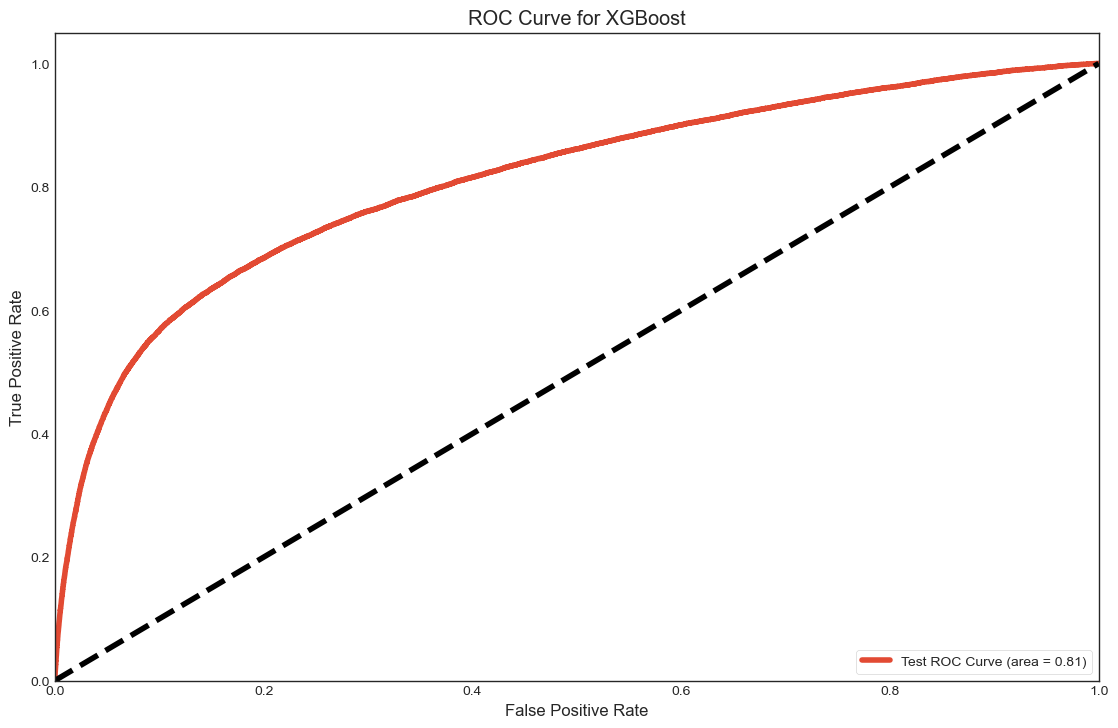

Классификационный отчет для XGBoost на обучающем наборе:
               precision    recall  f1-score   support

         0.0       0.98      0.89      0.93   2314540
         1.0       0.16      0.61      0.26     85460

    accuracy                           0.88   2400000
   macro avg       0.57      0.75      0.60   2400000
weighted avg       0.95      0.88      0.91   2400000

Confusion Matrix для XGBoost на обучающем наборе:
 [[2048595  265945]
 [  33319   52141]]
ROC AUC для XGBoost на обучающем наборе: 0.8224501034042425


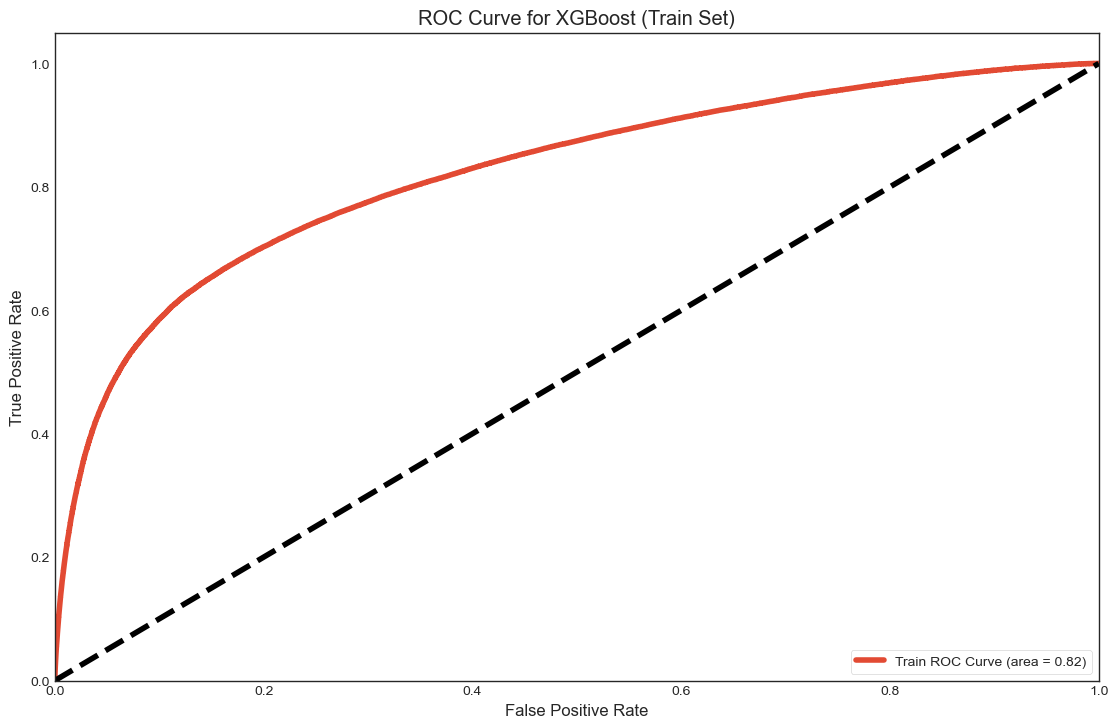

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


positive_class_weight = 18

# Создание экземпляра модели XGBClassifier с установленным весом положительного класса
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=positive_class_weight)

# Обучение модели
xgb_model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred_xgb = xgb_model.predict(X_test)

# Вероятности для расчета ROC AUC
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Классификационный отчет
print("Классификационный отчет для XGBoost на тестовом наборе:\n", classification_report(y_test, y_pred_xgb))

# Матрица ошибок
print("Confusion Matrix для XGBoost на тестовом наборе:\n", confusion_matrix(y_test, y_pred_xgb))

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print("ROC AUC для XGBoost на тестовом наборе:", roc_auc_xgb)

# Построение ROC-кривой
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'Test ROC Curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # диагональная линия для сравнения
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Предсказания на обучающем наборе
y_pred_train_xgb = xgb_model.predict(X_train)

# Вероятности для расчета ROC AUC на обучающем наборе
y_pred_proba_train_xgb = xgb_model.predict_proba(X_train)[:, 1]

# Классификационный отчет для обучающего набора
print("Классификационный отчет для XGBoost на обучающем наборе:\n", classification_report(y_train, y_pred_train_xgb))

# Матрица ошибок для обучающего набора
print("Confusion Matrix для XGBoost на обучающем наборе:\n", confusion_matrix(y_train, y_pred_train_xgb))

# ROC AUC для обучающего набора
roc_auc_train_xgb = roc_auc_score(y_train, y_pred_proba_train_xgb)
print("ROC AUC для XGBoost на обучающем наборе:", roc_auc_train_xgb)

# Построение ROC-кривой для обучающего набора
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train, y_pred_proba_train_xgb)
plt.figure()
plt.plot(fpr_train_xgb, tpr_train_xgb, label=f'Train ROC Curve (area = {roc_auc_train_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # диагональная линия для сравнения
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost (Train Set)')
plt.legend(loc="lower right")
plt.show()


Чтобы проверить модель XGBoost на переобучение применим кросс-вылидацию. Если модель показывает значительно лучшую производительность на обучающем наборе по сравнению с тестовым, это признак переобучения. Значительное различие в производительности на различных фолдах также может указывать на переобучение. 

In [127]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация параметров модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.6,
    'scale_pos_weight': weight  # установка веса класса
}

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_scores = []
val_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    model = xgb.XGBClassifier(**params, use_label_encoder=False, verbosity=1)
    model.fit(X_train_kf, y_train_kf, early_stopping_rounds=50, eval_set=[(X_train_kf, y_train_kf), (X_val_kf, y_val_kf)], verbose=False)

    train_pred = model.predict_proba(X_train_kf)[:, 1]
    val_pred = model.predict_proba(X_val_kf)[:, 1]

    train_scores.append(roc_auc_score(y_train_kf, train_pred))
    val_scores.append(roc_auc_score(y_val_kf, val_pred))

print("Кросс-валидация: Средний ROC AUC на обучающей выборке:", np.mean(train_scores))
print("Кросс-валидация: Средний ROC AUC на валидационной выборке:", np.mean(val_scores))


Кросс-валидация: Средний ROC AUC на обучающей выборке: 0.7985291614153389
Кросс-валидация: Средний ROC AUC на валидационной выборке: 0.795690503793074


Построим кривые обучения и валидации для оценки лосса на каждом этапе обучения. Если лосс на обучающем наборе продолжает снижаться, тогда как лосс на валидационном наборе начинает увеличиваться, это явный признак переобучения.

[0]	validation_0-logloss:0.69412	validation_1-logloss:0.69415
[1]	validation_0-logloss:0.68199	validation_1-logloss:0.68206
[2]	validation_0-logloss:0.67022	validation_1-logloss:0.67032
[3]	validation_0-logloss:0.65940	validation_1-logloss:0.65957
[4]	validation_0-logloss:0.65084	validation_1-logloss:0.65101
[5]	validation_0-logloss:0.64209	validation_1-logloss:0.64230
[6]	validation_0-logloss:0.63499	validation_1-logloss:0.63521
[7]	validation_0-logloss:0.62911	validation_1-logloss:0.62937
[8]	validation_0-logloss:0.62358	validation_1-logloss:0.62389
[9]	validation_0-logloss:0.61783	validation_1-logloss:0.61817
[10]	validation_0-logloss:0.61282	validation_1-logloss:0.61318
[11]	validation_0-logloss:0.60836	validation_1-logloss:0.60876
[12]	validation_0-logloss:0.60443	validation_1-logloss:0.60485
[13]	validation_0-logloss:0.60045	validation_1-logloss:0.60089
[14]	validation_0-logloss:0.59664	validation_1-logloss:0.59709
[15]	validation_0-logloss:0.59340	validation_1-logloss:0.59385
[1

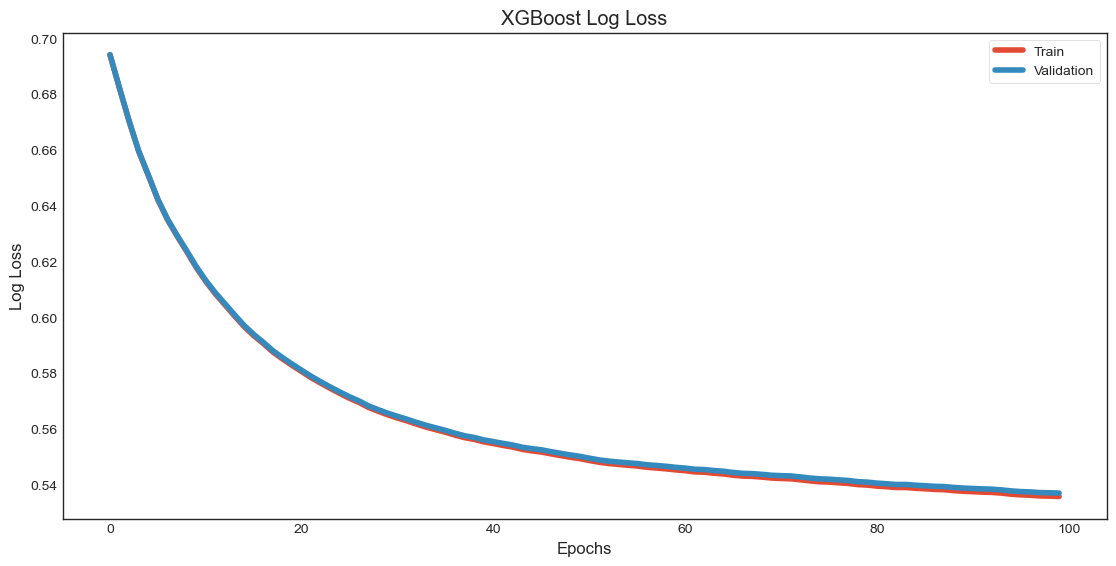

In [129]:
import matplotlib.pyplot as plt

# Инициализация и обучение модели с ранним прекращением
model = xgb.XGBClassifier(**params, use_label_encoder=False, verbosity=1)
model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

# Получение результатов обучения
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# Построение кривых
plt.figure(figsize=(12, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()
plt.show()


<a id="ch0014"></a>
## 14. Выводы по результатам кросс-валидации и результатам логлосса на обучающей и валидационной выборках

#### Средние значения ROC AUC:
- **Обучающая выборка**: 0.7985
- **Валидационная выборка**: 0.7957

#### Анализ:

1. **Схожие значения на обучающей и валидационной выборках**:
   
   - Средние значения ROC AUC на обучающей и валидационной выборках очень близки друг к другу. Это хороший знак, указывающий на то, что модель не переобучена.
   - Величина разницы (около 0.0028) между значениями ROC AUC на обучающей и валидационной выборках указывает на стабильность модели.
     

3. **Высокий уровень ROC AUC**:
   - Значения ROC AUC около 0.8 свидетельствуют о хорошей способности модели различать классы. В контексте задач классификации, значения ROC AUC в диапазоне 0.75-0.85 считаются хорошими.

4. **Переобучение**:
   - Поскольку значения ROC AUC на обучающей и валидационной выборках практически идентичны, можно сделать вывод, что модель не переобучена.
   - Переобучение проявляется, когда модель значительно лучше работает на обучающих данных по сравнению с валидационными данными, что здесь не наблюдается.

В целом, результаты кросс-валидации показывают, что модель XGBoost хорошо обучена и демонстрирует высокую способность различать классы, что делает её подходящей для использования в реальных задачах классификации.


#### Динамика логлосса:
- **validation_0-logloss** (Обучающая выборка):
  - Логлосс стабильно снижается с каждой итерацией, начина0.694123697 и уменьшаясь до 0.53577 на последней итерации.
- **validation_1-logloss** (Валидационная выборка):
  - Логлосс также снижается, начи0.69415.53815 и уменьшаясь до 0.53699 на последней итерации.

#### Анализ:

1. **Снижение логлосса на обеих выборках**:
   - Параллельное снижение логлосса на обучающей и валидационной выборках свидетельствует о том, что модель успешно обучается и улучшает свои предсказания с каждой итерацией.

2. **Отсутствие явного переобучения**:
   - Логлосс на валидационной выборке снижается вместе с логлоссом на обучающей выборке, что указывает на отсутствие переобучения. Переобучение обычно проявляется в ситуации, когда логлосс на обучающей выборке продолжает снижаться, а на валидационной выборке начинает расти.
   - Значения логлосса на обучающей и валидационной выборках находятся близко друг к другу, что также указывает на хорошую обобщающую способность модели.

3. **Умеренное снижение логлосса**:
   - Снижение логлосса, особенно на последних итерациях, становится менее выраженным. Это может свидетельствовать о том, что модель приближается к своей оптимальной точке, и дальнейшее улучшение может потребовать более тонкой настройки гиперпараметров или использованиядтверждения текущих результатов.

#### Заключение:
Текущие результаты показывают, что модель XGBoost хорошо обучена и демонстрирует стабильное снижение логлосса на обеих выборках. Отсутствие явного переобучения и близкие значения логлосса указывают на хорошую обобщающую способность модели, что делает её подходящей для использования в реальных задачах классификации.

Обучим модель на всем датафрейме

Классификационный отчет для XGBoost на всем наборе данных:
               precision    recall  f1-score   support

         0.0       0.98      0.89      0.93   2893558
         1.0       0.16      0.61      0.26    106442

    accuracy                           0.88   3000000
   macro avg       0.57      0.75      0.59   3000000
weighted avg       0.95      0.88      0.91   3000000

Confusion Matrix для XGBoost на всем наборе данных:
 [[2561442  332116]
 [  41866   64576]]
ROC AUC для XGBoost на всем наборе данных: 0.8205075609355351


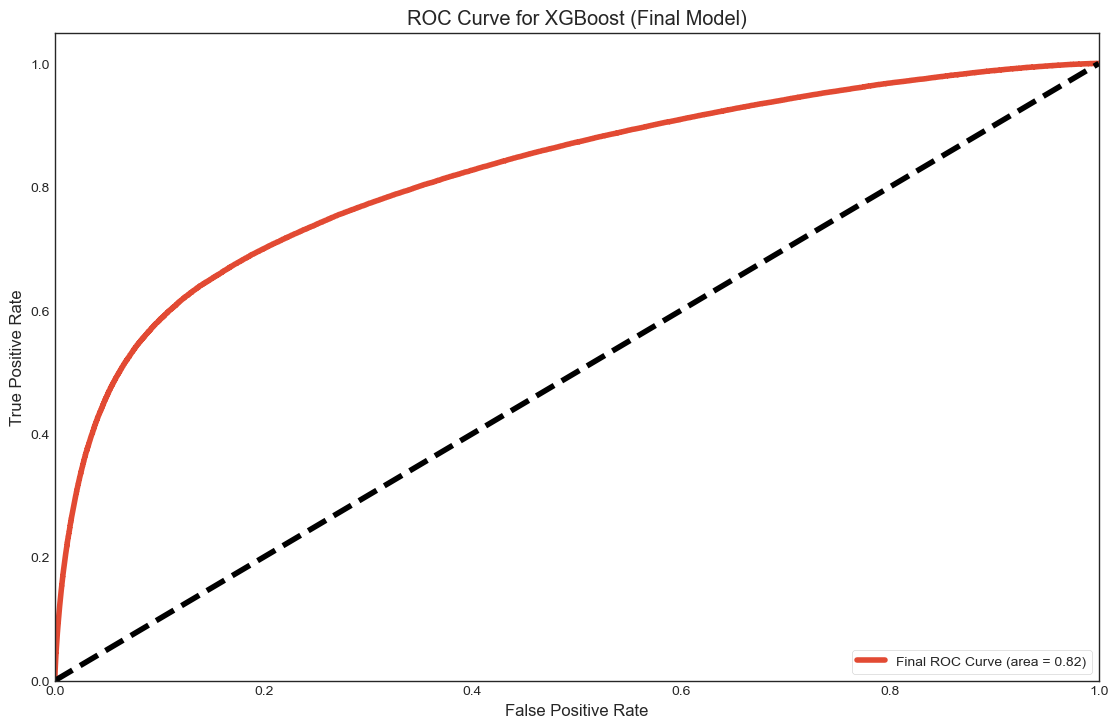

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Создание экземпляра модели XGBClassifier с установленным весом положительного класса
xgb_model_final = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=positive_class_weight)

# Обучение модели на всем наборе данных
xgb_model_final.fit(X, y)

# Предсказания на всем наборе данных
y_pred_final = xgb_model_final.predict(X)

# Вероятности для расчета ROC AUC на всем наборе данных
y_pred_proba_final = xgb_model_final.predict_proba(X)[:, 1]

# Классификационный отчет
print("Классификационный отчет для XGBoost на всем наборе данных:\n", classification_report(y, y_pred_final))

# Матрица ошибок
print("Confusion Matrix для XGBoost на всем наборе данных:\n", confusion_matrix(y, y_pred_final))

# ROC AUC
roc_auc_final = roc_auc_score(y, y_pred_proba_final)
print("ROC AUC для XGBoost на всем наборе данных:", roc_auc_final)

# Построение ROC-кривой
fpr_final, tpr_final, _ = roc_curve(y, y_pred_proba_final)
plt.figure()
plt.plot(fpr_final, tpr_final, label=f'Final ROC Curve (area = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # диагональная линия для сравнения
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost (Final Model)')
plt.legend(loc="lower right")
plt.show()


ROC AUC для XGBoost на всем наборе данных: 0.82, что удовлетворяет требованиям настоящего проекта.